# PROJET : Estimation du prix des voitures 

# Importer les bibliotheques

In [191]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


# ✓ Analyser et explorer les données (EDA)

## Chargement du dataset

In [2]:
data = pd.read_csv("CarPrice.csv")
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

### la signification de chaque caractéristique dans le fichier CarPrice.csv :
 
curbweight : Poids à vide de la voiture (sans passagers ni chargement, en livres).

enginetype : Type de moteur (ex. : arbre à cames en tête "ohc", soupapes en tête "ohv", double arbre à cames en tête "dohc").

cylindernumber : Nombre de cylindres du moteur (ex. : quatre, six, huit, douze).

enginesize : Volume total de tous les cylindres du moteur (en centimètres cubes).

fuelsystem : Système d'alimentation en carburant (ex. : injection multipoint "mpfi", carburateur à double corps "2bbl").

boreratio : Rapport entre le diamètre du cylindre et la course du piston.

stroke : Longueur de la course du piston (en pouces ou centimètres).

compressionratio : Rapport entre le volume maximal et minimal dans le cylindre du moteur.

horsepower : Puissance du moteur (en chevaux).

peakrpm : Vitesse maximale du moteur (tours par minute).

citympg : Consommation de carburant en ville (miles par gallon).

highwaympg : Consommation de carburant sur autoroute (miles par gallon).

price : Prix de vente conseillé par le constructeur (en dollars).

## Inspection des données 

La cellule de code suivante offre un aperçu concis du jeu de données, incluant le nombre de lignes et de colonnes, le type de données de chaque colonne, ainsi que le nombre de valeurs manquantes. Cette inspection initiale est essentielle pour comprendre la structure du jeu de données et identifier d’éventuels problèmes de qualité des données qui devront être traités lors de la phase de prétraitement.

In [3]:
dimension = data.shape
print("Nombre d'observation est :",dimension[0])
print("Nombre de caracteristique est :",dimension[1])
dimension

Nombre d'observation est : 205
Nombre de caracteristique est : 26


(205, 26)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Le jeu de données se compose de 205 lignes et 26 colonnes, comme le confirme la dimension du DataFrame.
- Le résultat de data.info() montre qu’il n’y a aucune valeur manquante dans les colonnes, puisque le "Non-Null Count" est de 205 pour chacune d’elles.
#### Les types de données sont variés :
#### => 8 colonnes sont de type entier (int64),
#### => 8 colonnes sont de type flottant (float64),
#### => 10 colonnes sont de type Catégorielle (object).

Cela indique que le jeu de données est propre, sans valeurs manquantes, et que les types de données de chaque variable sont bien définis.

- Puisqu’il n’y a aucune valeur manquante, il n’est pas nécessaire d’utiliser une heatmap pour visualiser leur répartition.

## Statistiques Descriptives
Cela désigne les mesures de base comme la moyenne, l’écart type, le minimum, le maximum, la médiane, etc., qui résument les caractéristiques d’un jeu de données.

In [6]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

- La méthode df.describe() fournit des statistiques descriptives pour les colonnes numériques du jeu de données.
- Cela inclut le nombre de valeurs (count), la moyenne (mean), l’écart type (standard deviation), la valeur minimale, les 1er, 2e et 3e quartiles (25e, 50e (médiane) et 75e percentiles), ainsi que la valeur maximale pour chaque variable numérique.

## Analyser les types de données

### Les Variables Catégorielles

In [7]:
col_categorielle =data.select_dtypes(include=['object']).drop(columns=["CarName"])
liste_col_categorielle = col_categorielle.columns.tolist()
print("la liste des colonnes Catégorielles est : \n",liste_col_categorielle)

la liste des colonnes Catégorielles est : 
 ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


Pour chaque colonne :
- Affiche le nombre d’occurrences de chaque valeur pour determiner les variables ordinales et les variables nominales .

In [8]:
for col in col_categorielle :
    print(col_categorielle[col].value_counts())
    print("\n")

fueltype
gas       185
diesel     20
Name: count, dtype: int64


aspiration
std      168
turbo     37
Name: count, dtype: int64


doornumber
four    115
two      90
Name: count, dtype: int64


carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


enginelocation
front    202
rear       3
Name: count, dtype: int64


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64




#### Les Variables Ordinales
les catégories peuvent être ordonnées logiquement

In [9]:
ordinales = col_categorielle[["doornumber","cylindernumber"]]
print("la liste de variables ordinales : \n",ordinales.columns.tolist())

la liste de variables ordinales : 
 ['doornumber', 'cylindernumber']


#### Les Variables Nominales
pas d’ordre naturel entre les catégories

In [10]:
nominales = col_categorielle.drop(columns=["doornumber","cylindernumber"])
print("la liste de variables nominales : \n",nominales.columns.tolist())

la liste de variables nominales : 
 ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']


### Les variables Numériques

In [11]:
Numériques_columns =data.select_dtypes(include=['int','float']).drop(columns=["car_ID"])
liste_Numériques_columns = Numériques_columns.columns.tolist()
print("la liste des colonnes Numériques est : \n",liste_Numériques_columns)

la liste des colonnes Numériques est : 
 ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


Pour chaque colonne :
- Affiche le nombre d’occurrences de chaque valeur pour determiner les variables continues et les variables discretes :

## **Analyse Univariee**

### La distribution des variables numeriques et Détection des valeurs aberrantes (outliers)

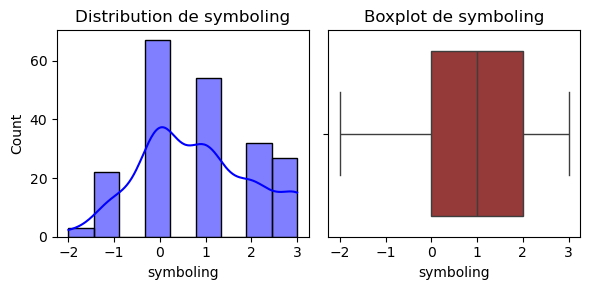

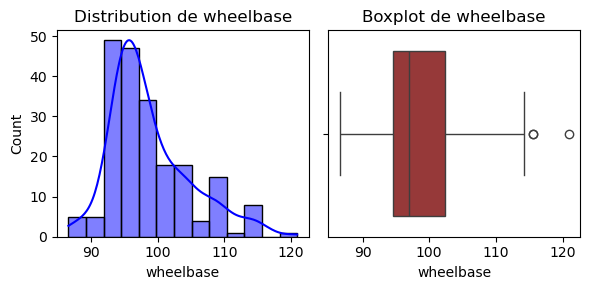

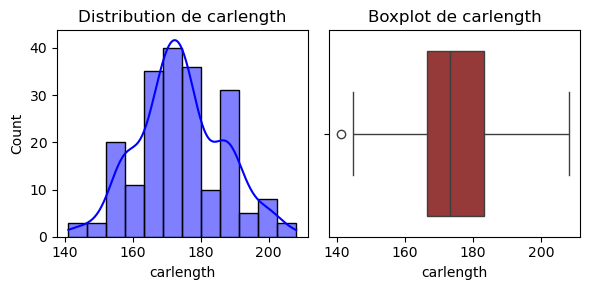

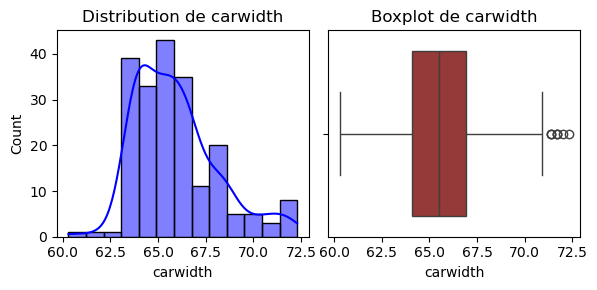

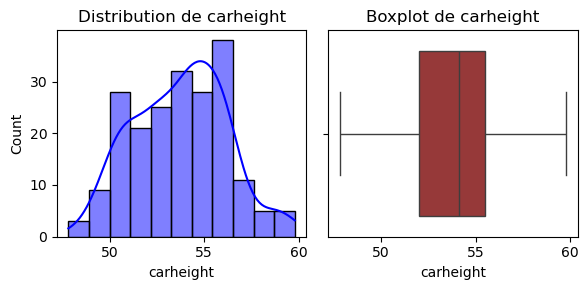

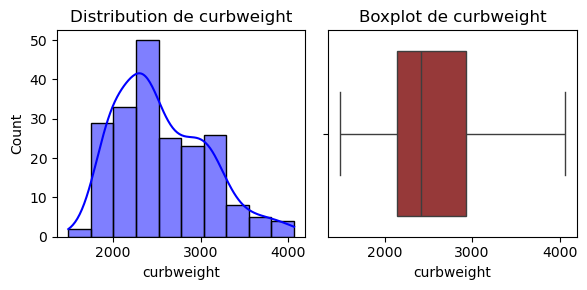

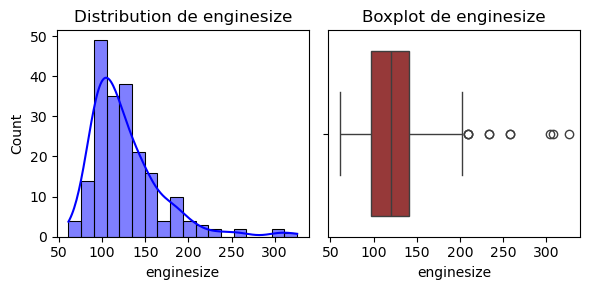

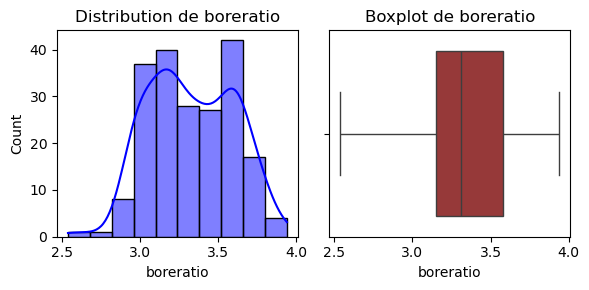

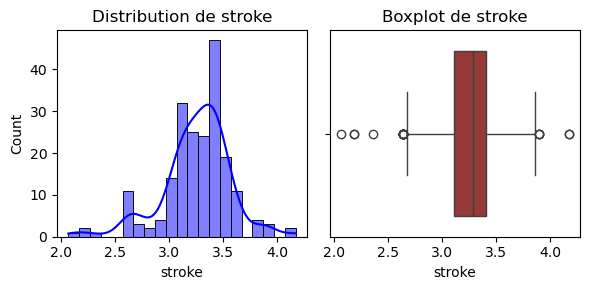

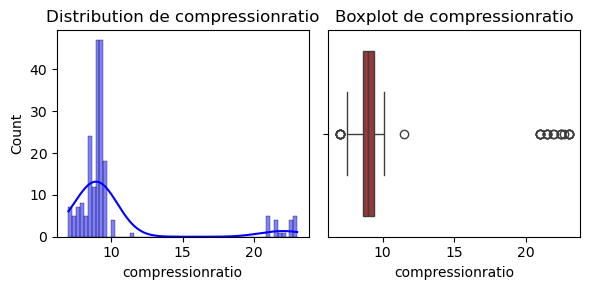

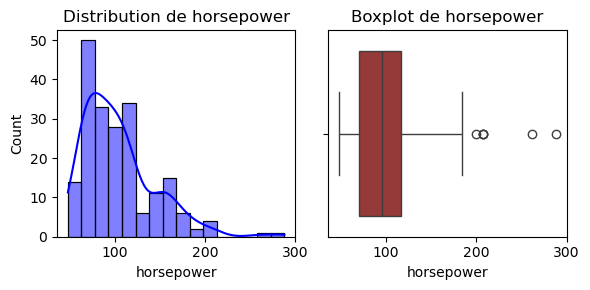

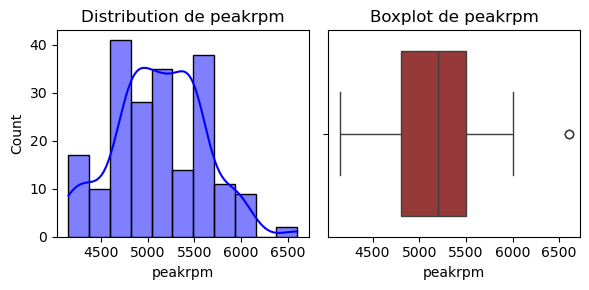

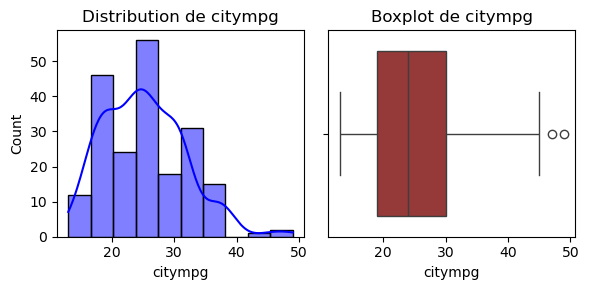

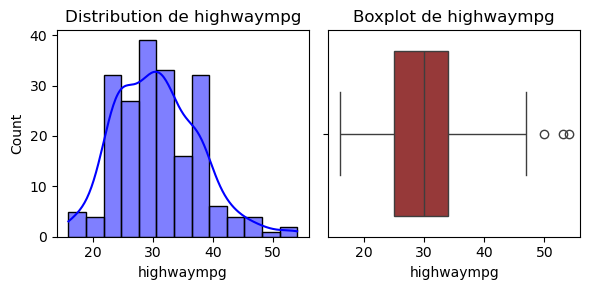

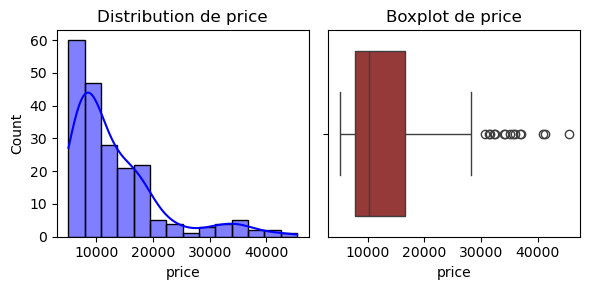

In [12]:
for col in liste_Numériques_columns:
    fig = plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    sns.histplot(data[col],kde=True,color='blue')
    plt.title(f"Distribution de {col}")
    print("\n")
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col],color='brown')
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

### Colonnes présentant des valeurs aberrantes
- L’analyse exploratoire à l’aide de boxplots a permis d’identifier plusieurs colonnes contenant des valeurs aberrantes (outliers). Ces valeurs extrêmes peuvent avoir un impact significatif sur l’analyse statistique et la performance des modèles prédictifs. Il est donc important de les prendre en compte lors de la préparation des données.

Les variables concernées sont :

wheelbase (empattement)

carlength (longueur du véhicule)

carwidth (largeur du véhicule)

enginesize (cylindrée du moteur)

stroke (course du piston)

compressionratio (taux de compression)

horsepower (puissance du moteur)

peakrpm (régime maximal)

citympg (consommation en ville)

highwaympg (consommation sur autoroute)

price (prix du véhicule)

In [13]:
cols_outliers = ['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

## Analyse Bivariee 

### les caracteristiques categoreilles VS variable cible (price)

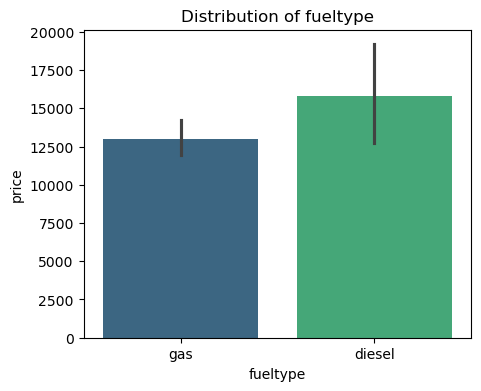

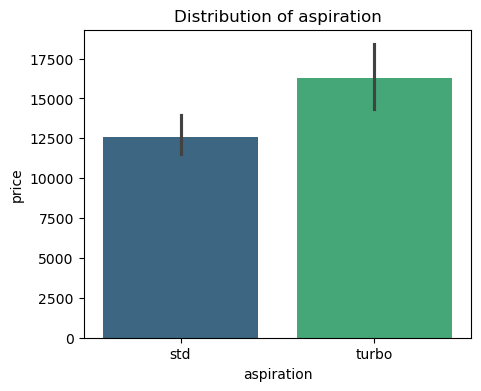

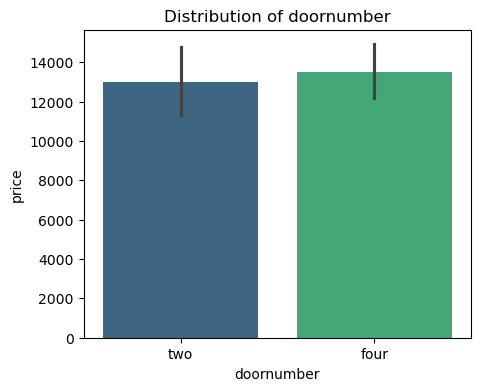

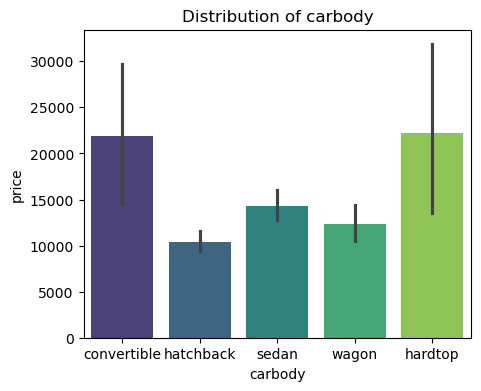

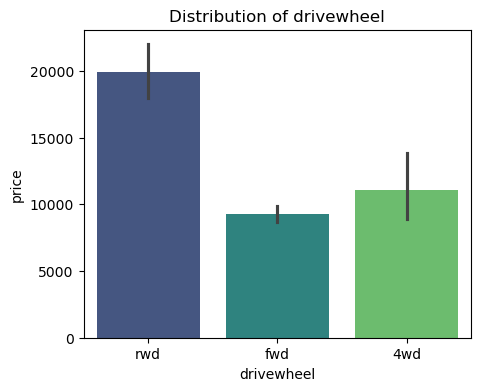

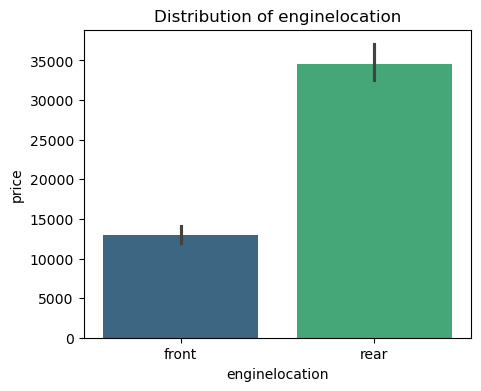

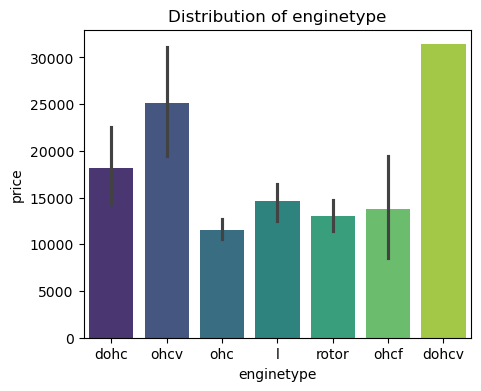

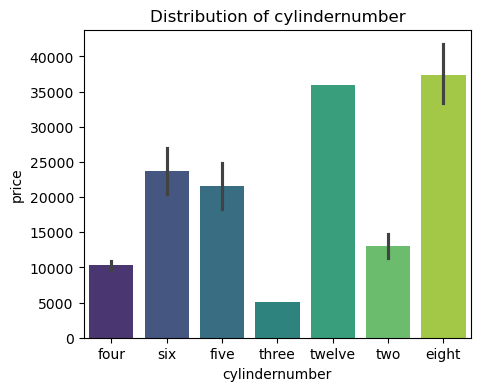

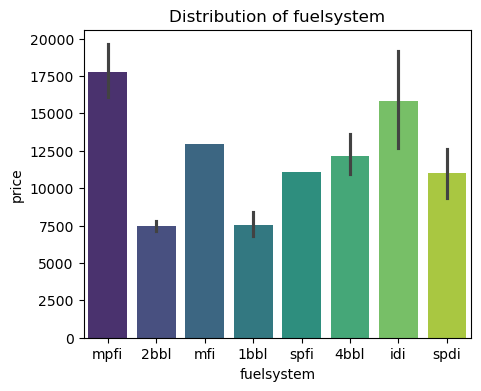

In [14]:
for col in liste_col_categorielle:
    fig = plt.figure(figsize=(5, 4))
    sns.barplot(x=col, y='price', data=data, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.show()

### les caracteristiques numeriques VS variable cible (price)

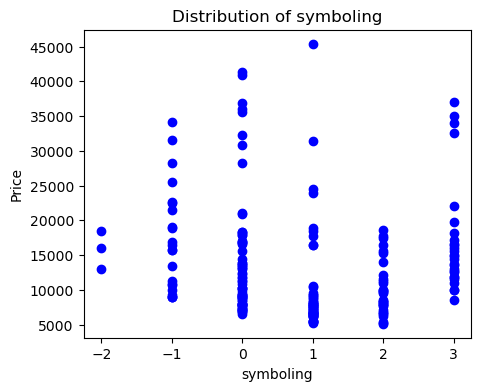

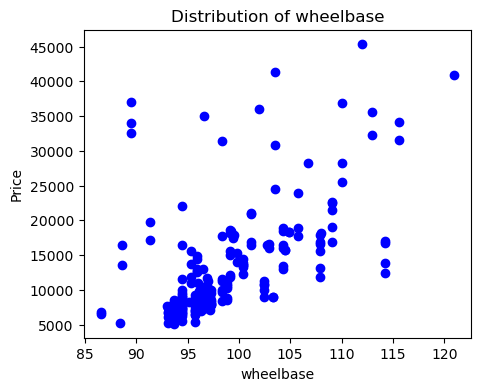

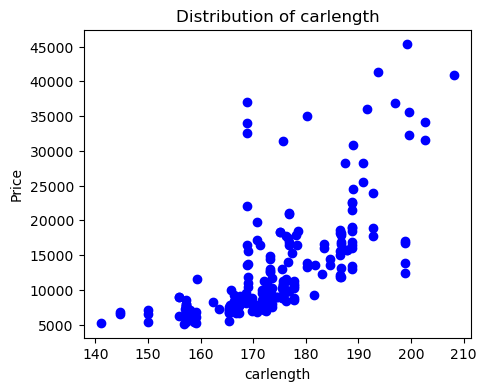

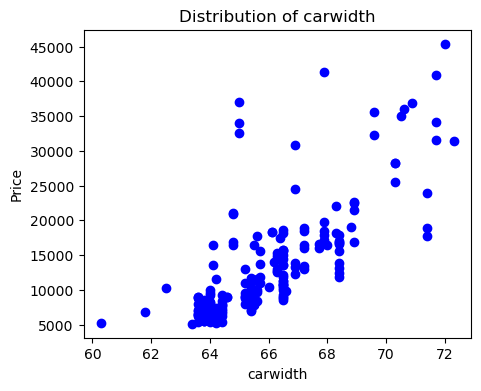

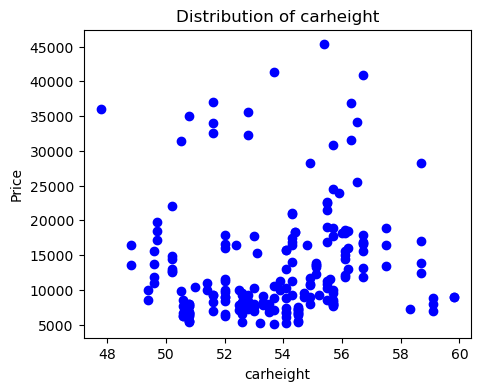

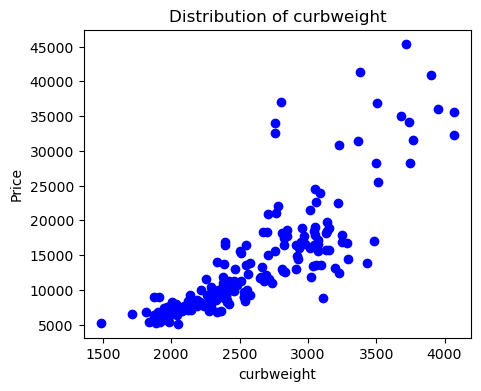

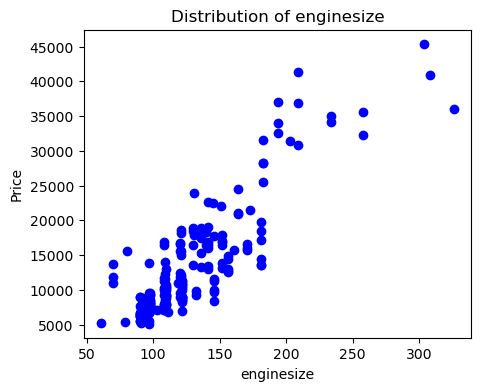

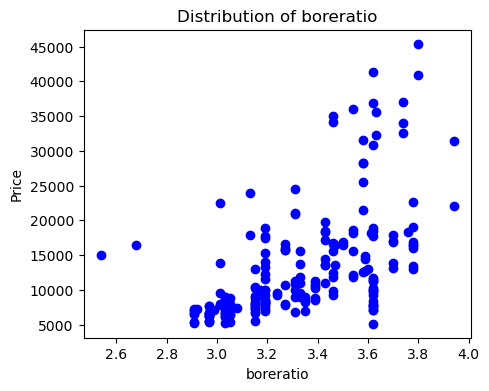

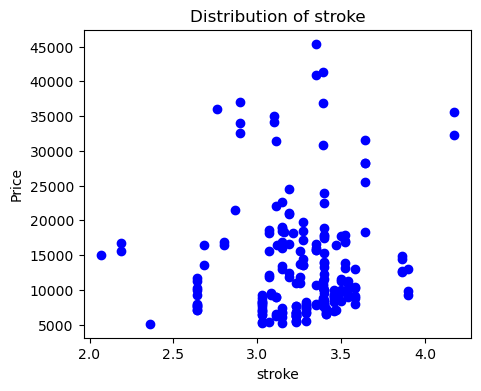

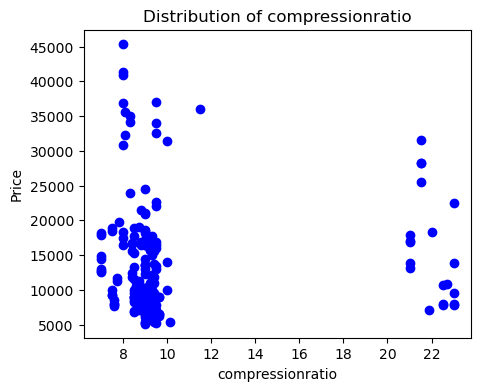

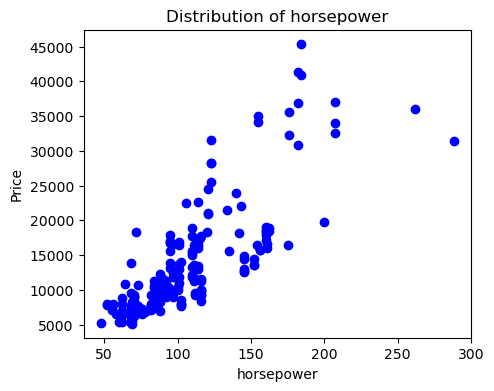

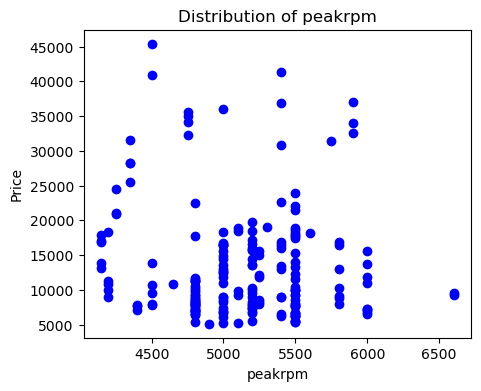

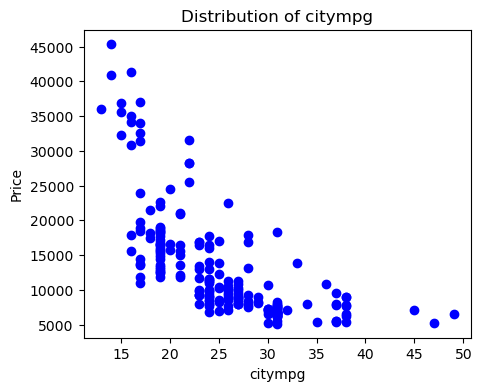

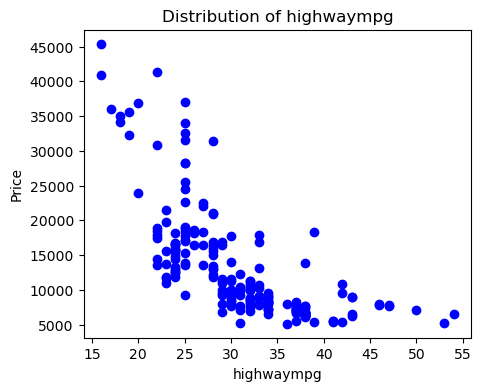

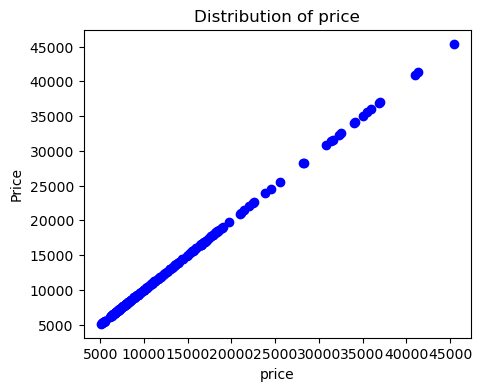

In [15]:
for col in liste_Numériques_columns:
    fig = plt.figure(figsize=(5, 4))
    plt.scatter(x=data[col], y=data['price'], color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

### Correlation entre les variables numeriques et variable cible (price):

In [16]:
correlation_numerique = Numériques_columns.corr()['price'].drop('price').to_frame()

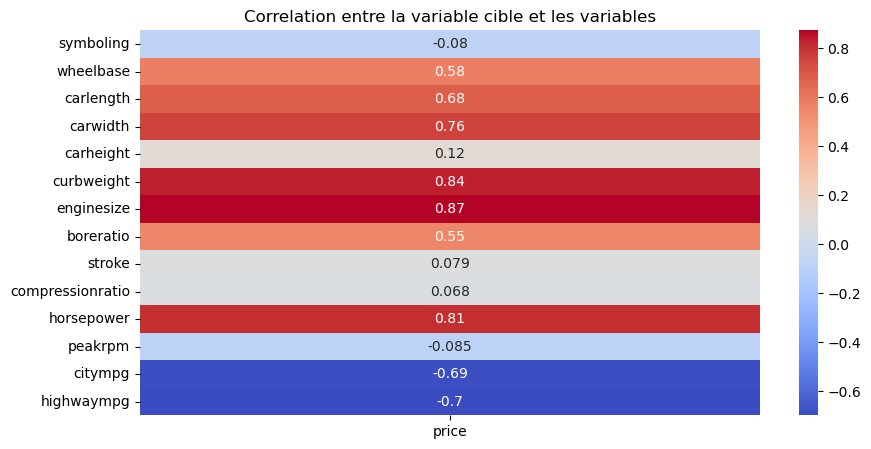

In [17]:
plt.figure(figsize=(10, 5))  # Adjust width if you have many variables
sns.heatmap(correlation_numerique, annot=True, cmap='coolwarm', cbar=True)
plt.title("Correlation entre la variable cible et les variables")
plt.show()

## Analyse Multivariee :

### Correlation (Heatmap)

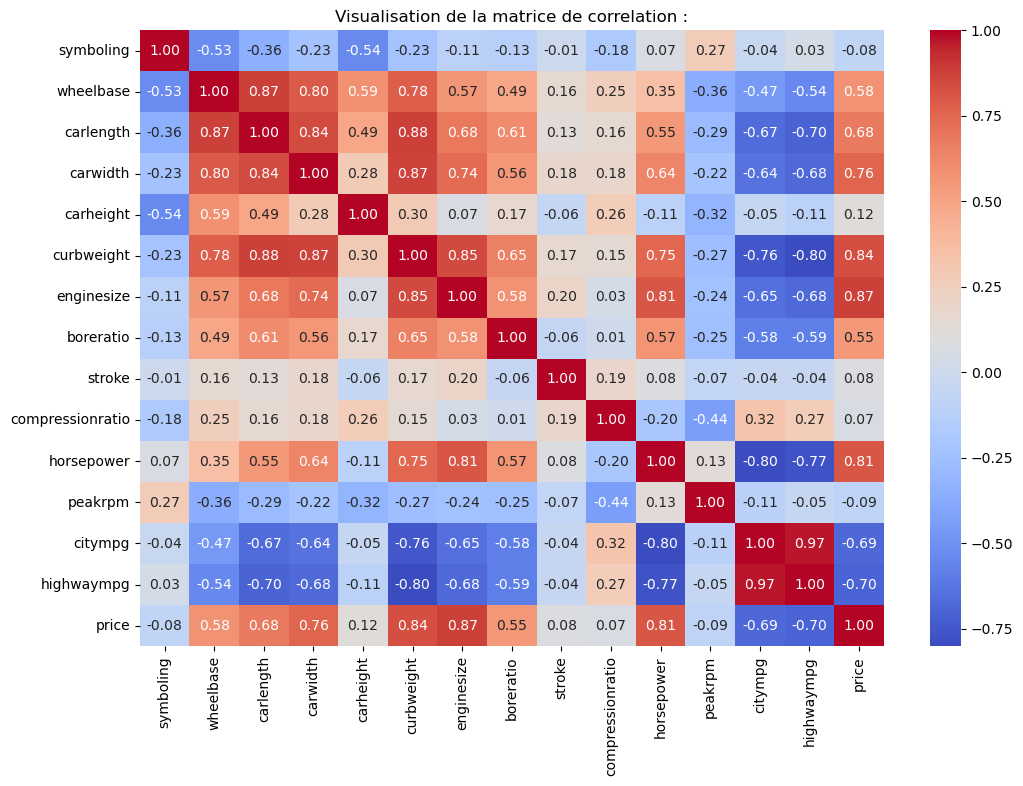

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(Numériques_columns.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Visualisation de la matrice de correlation :')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


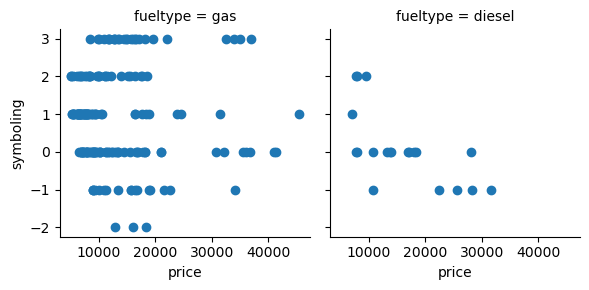

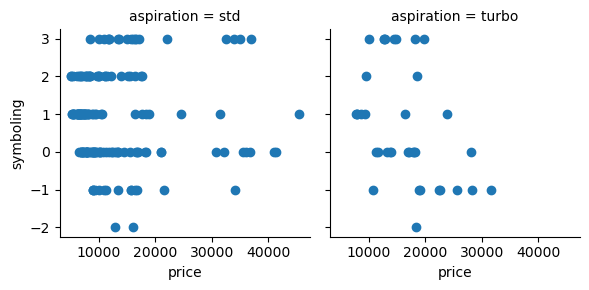

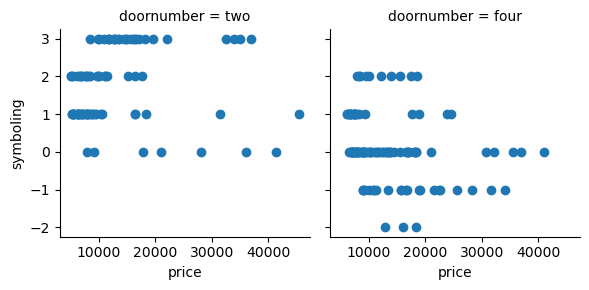

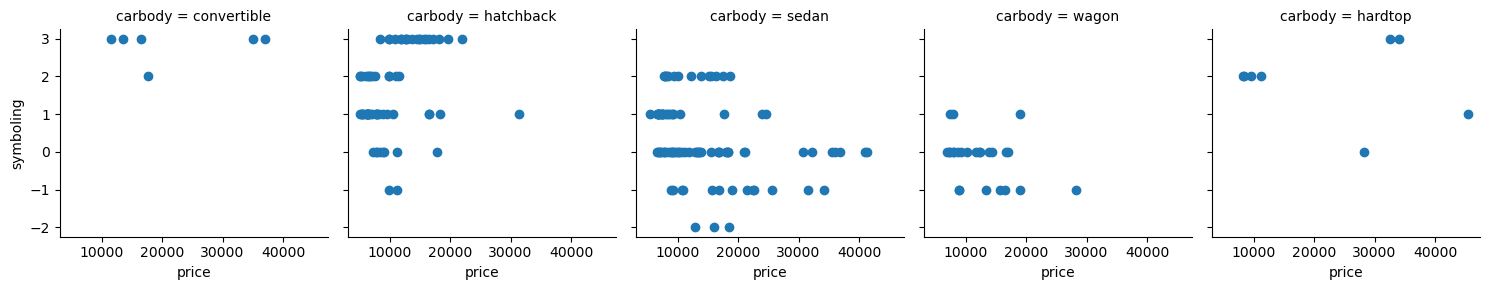

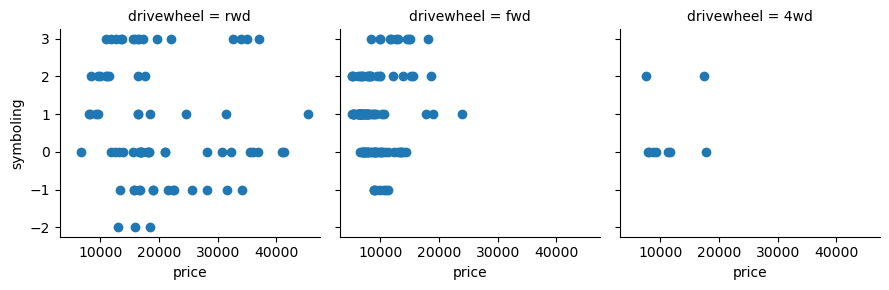

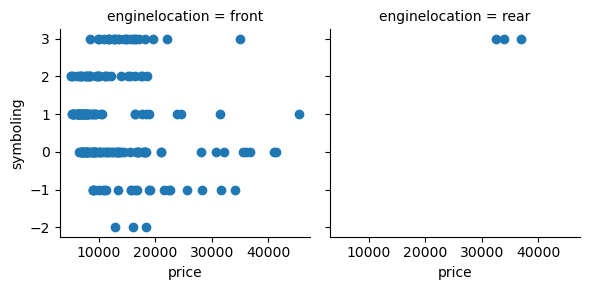

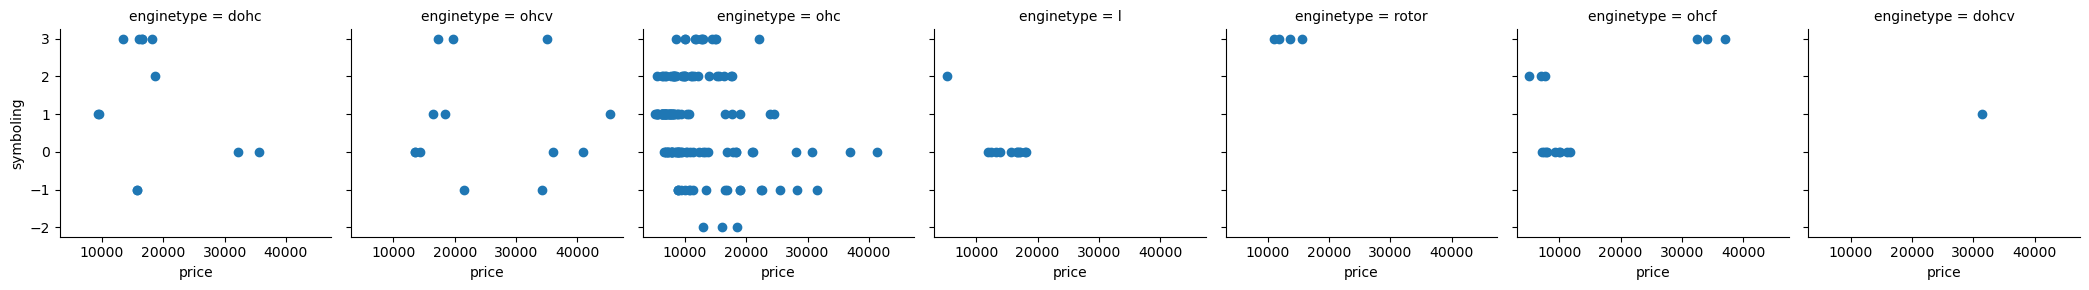

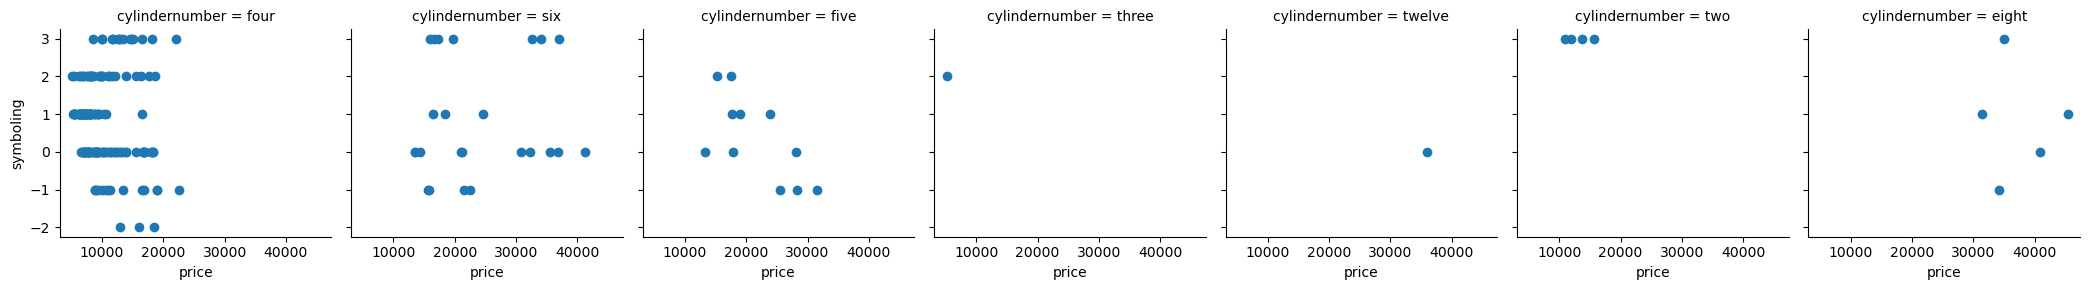

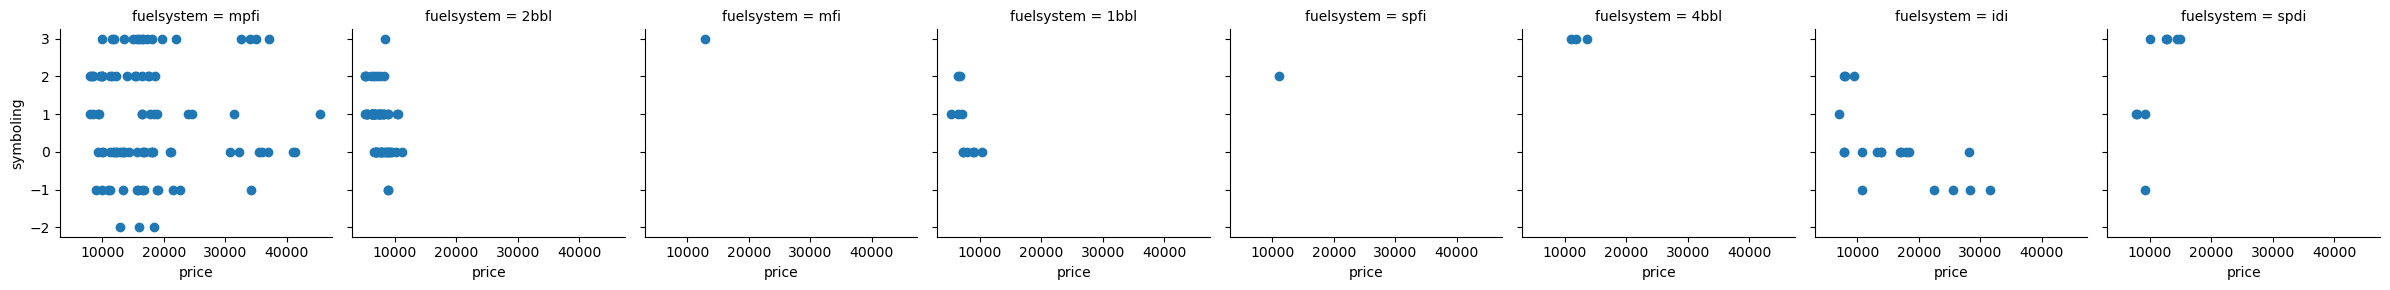

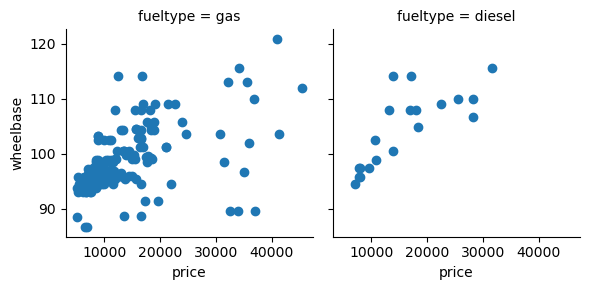

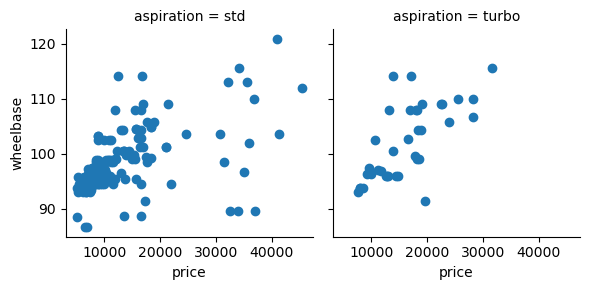

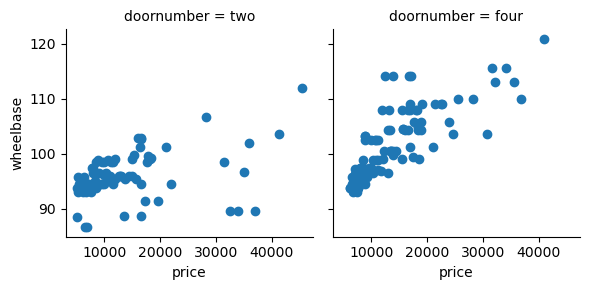

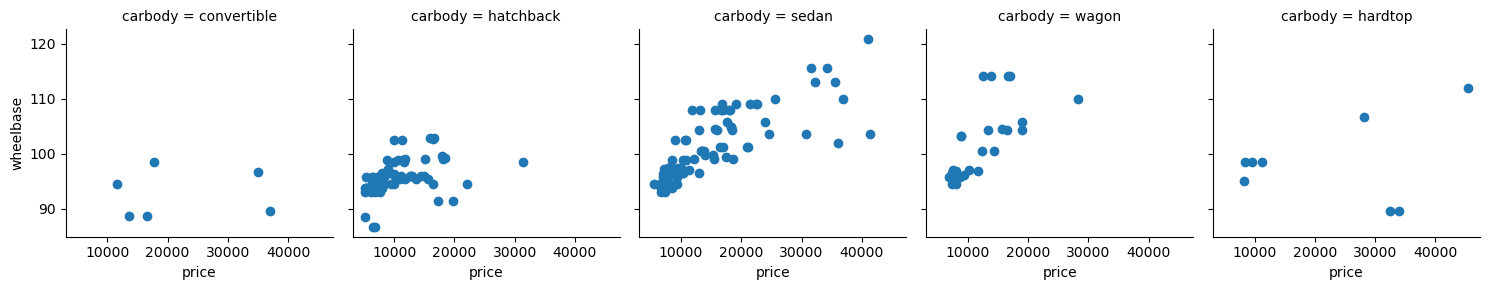

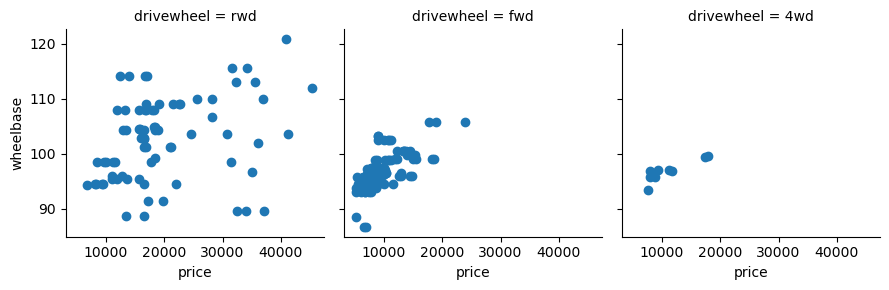

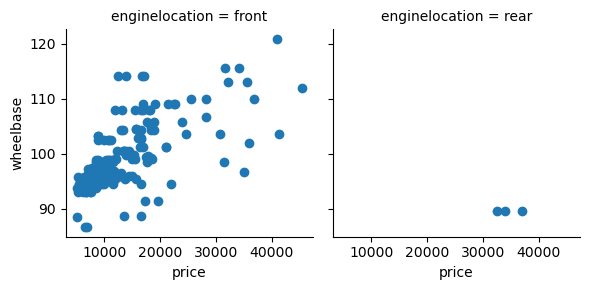

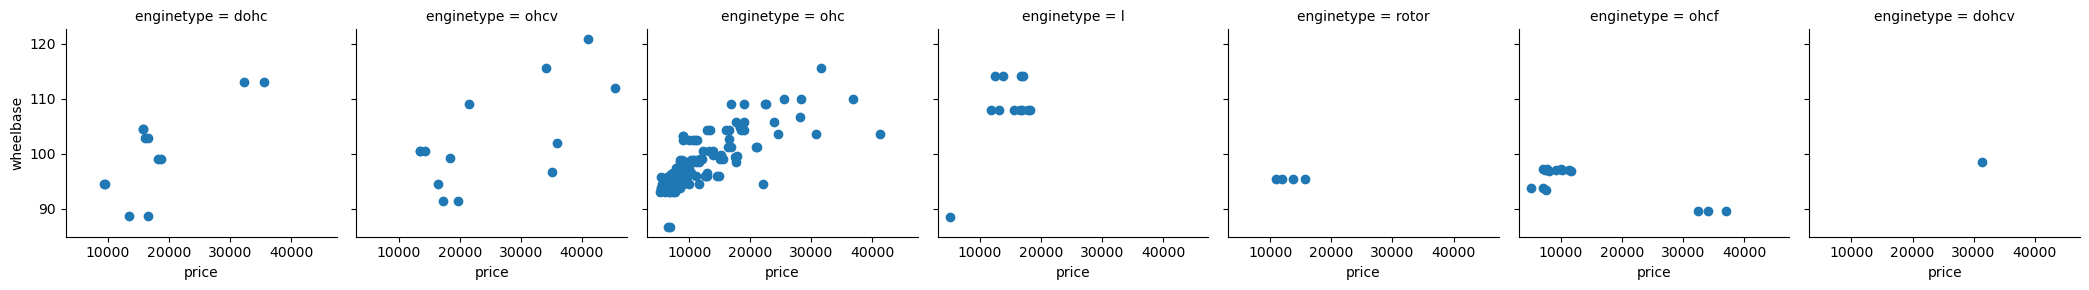

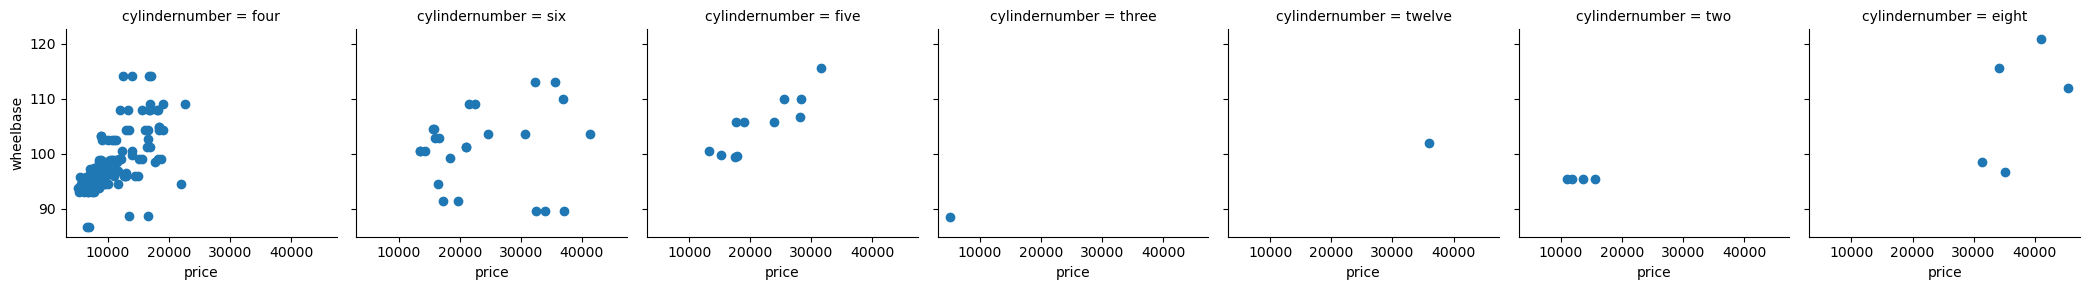

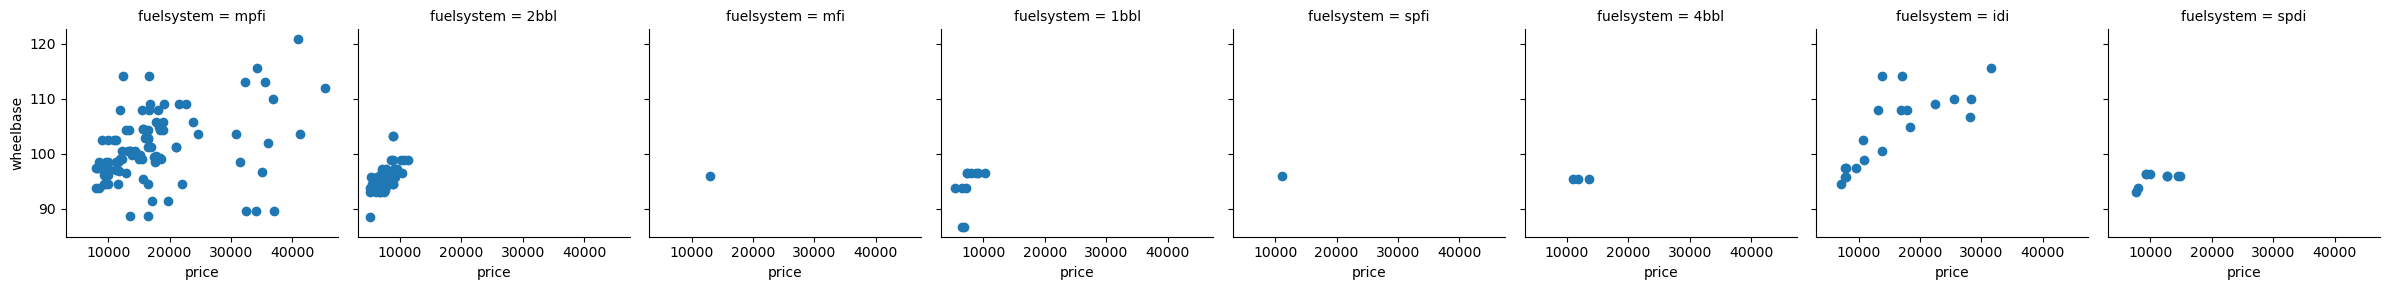

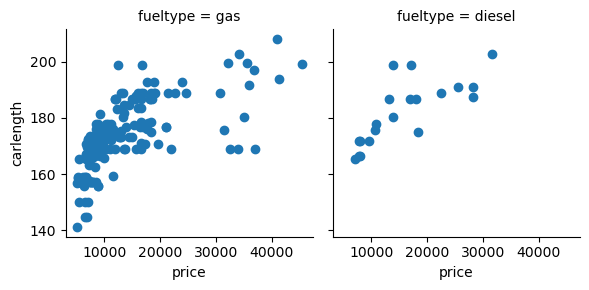

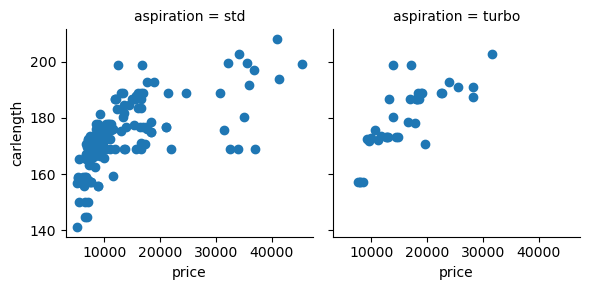

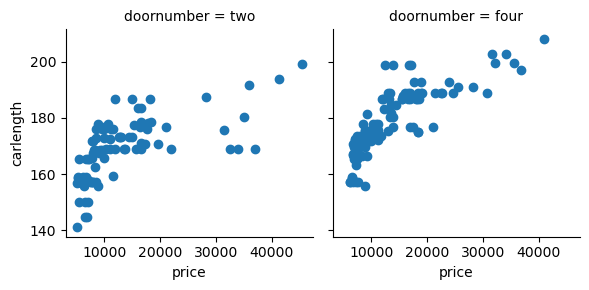

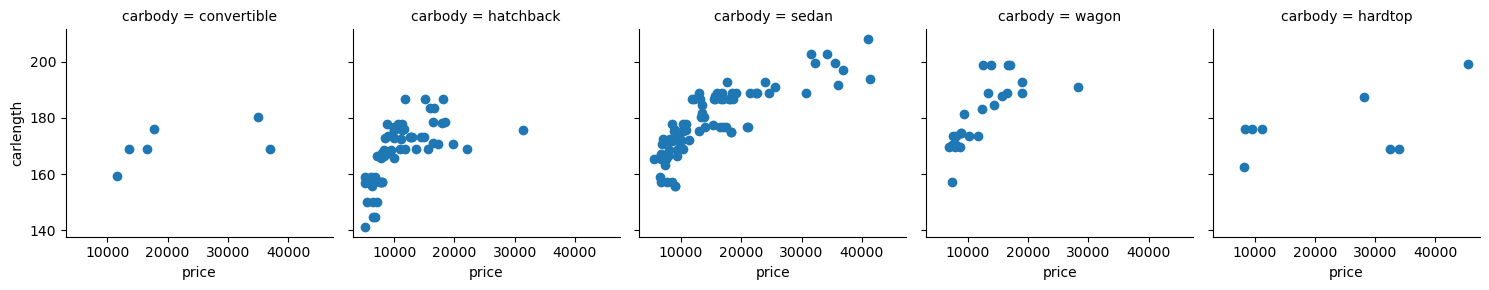

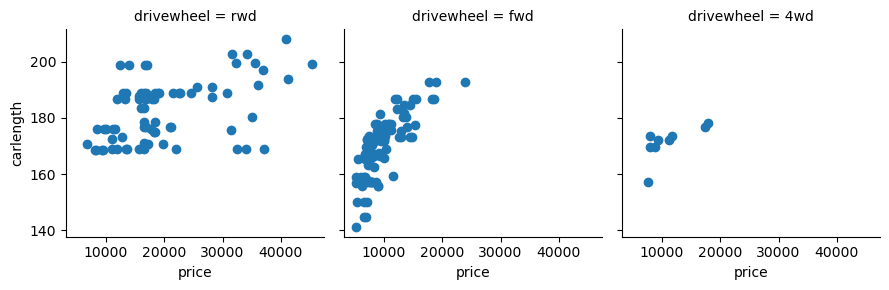

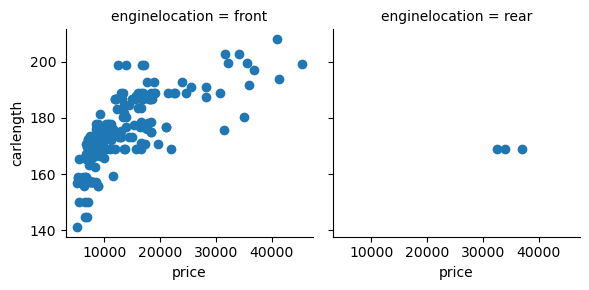

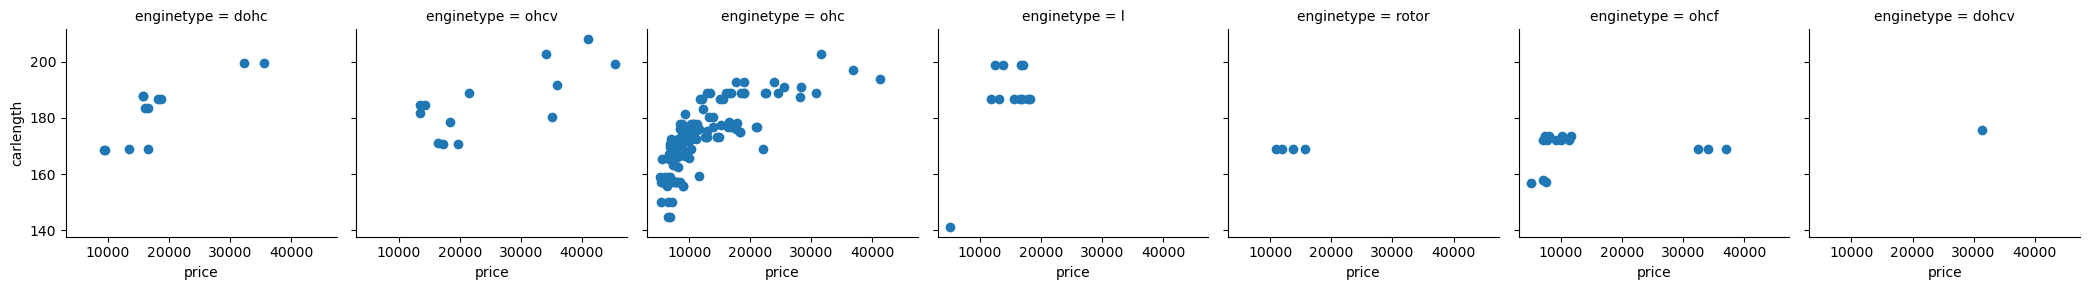

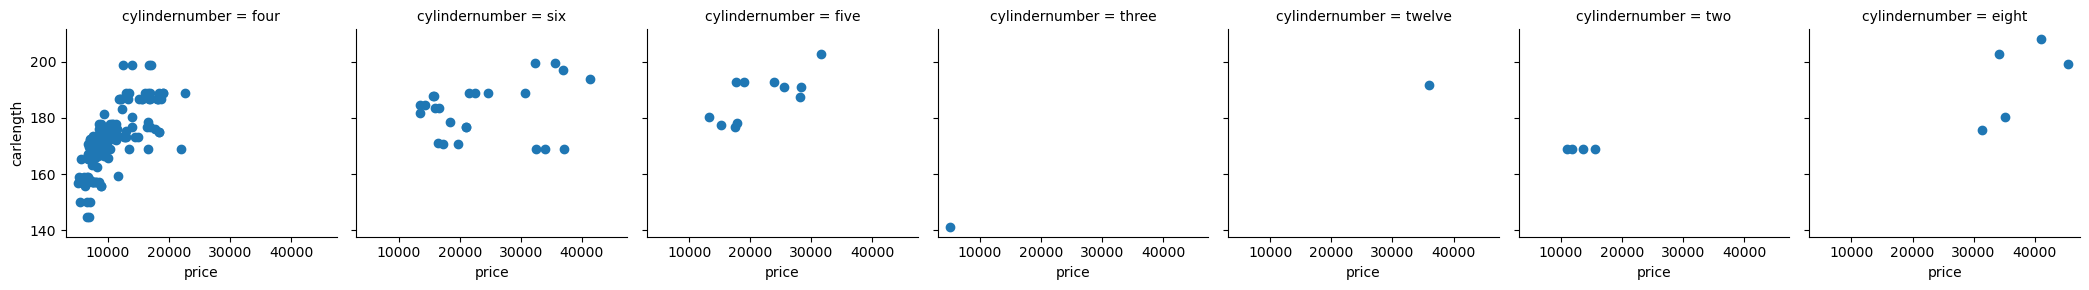

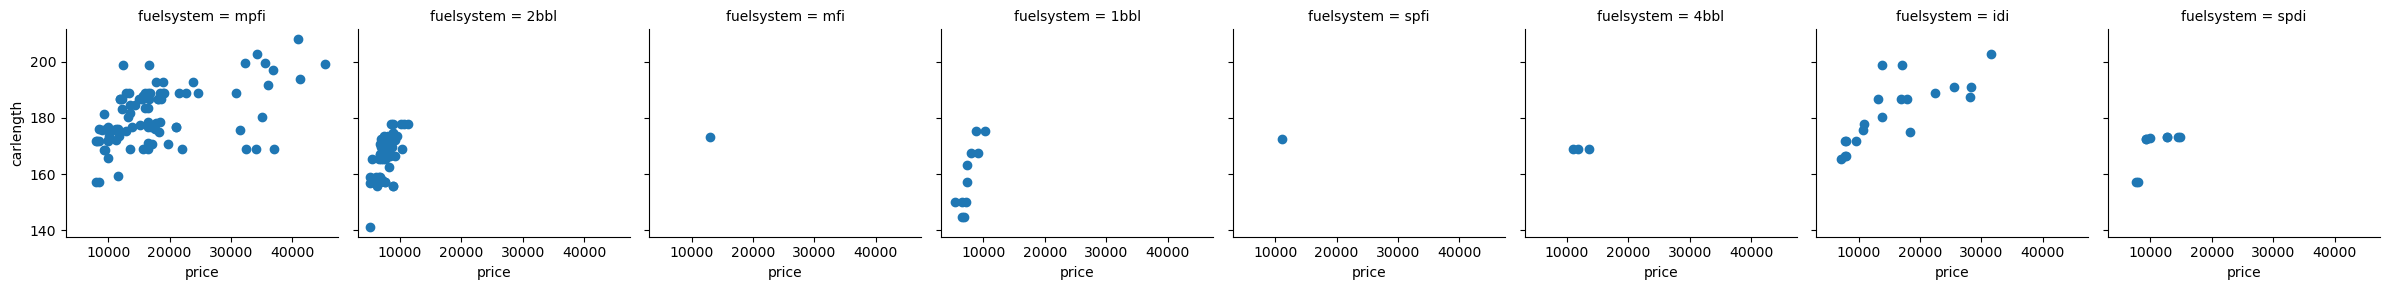

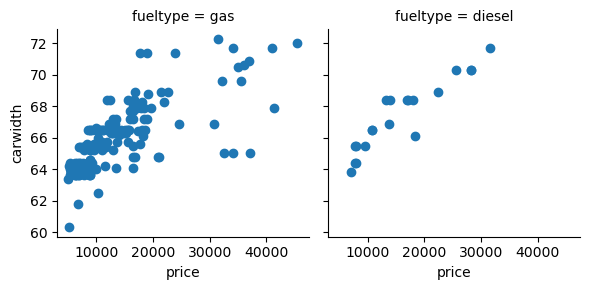

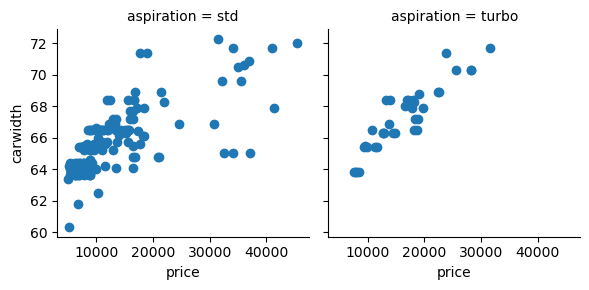

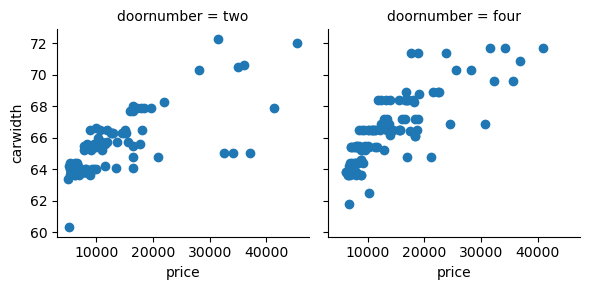

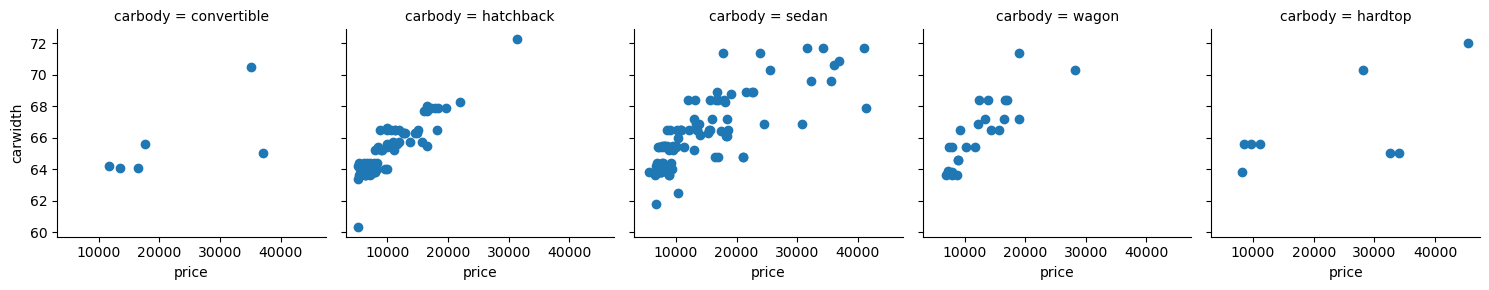

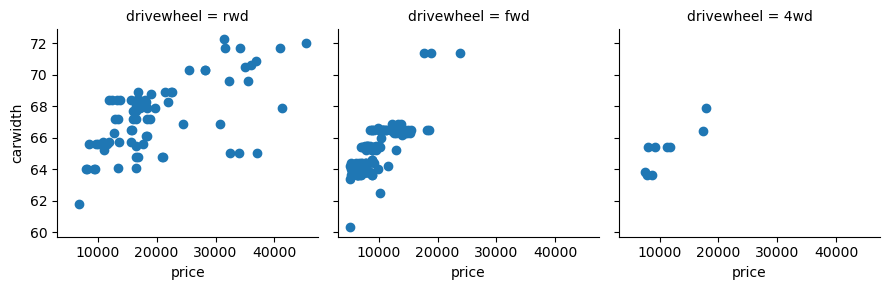

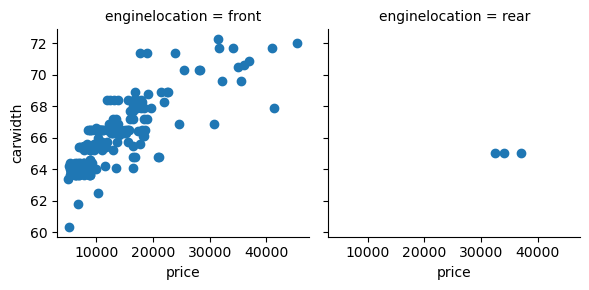

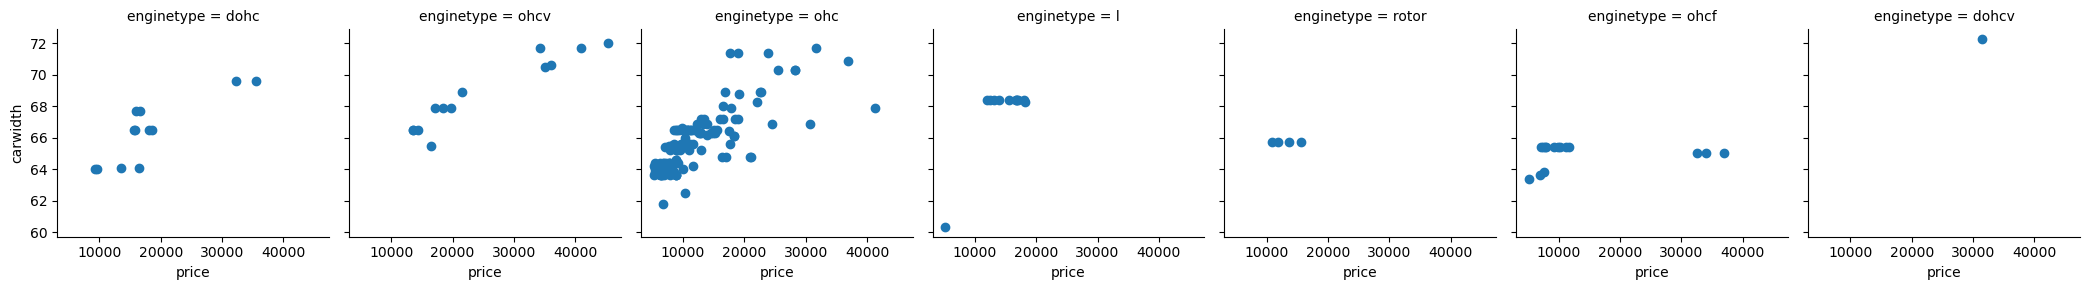

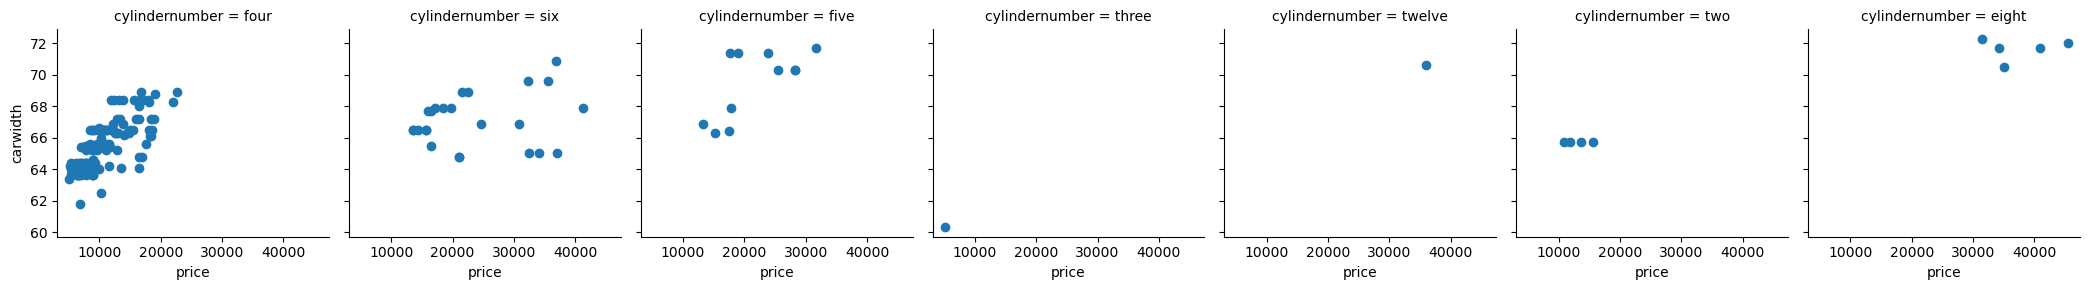

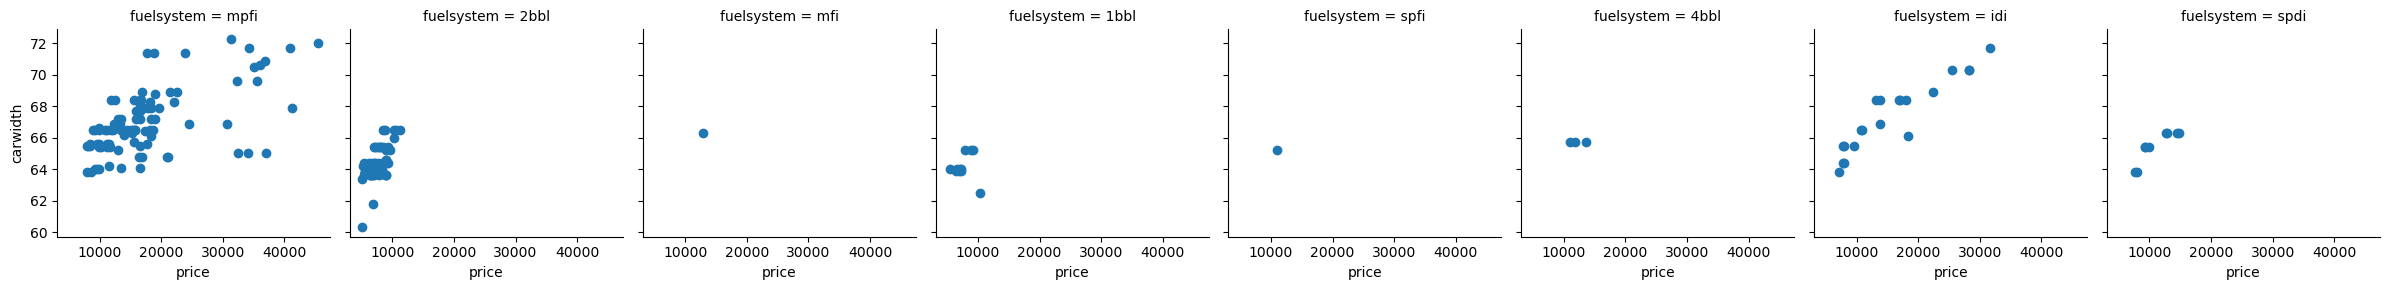

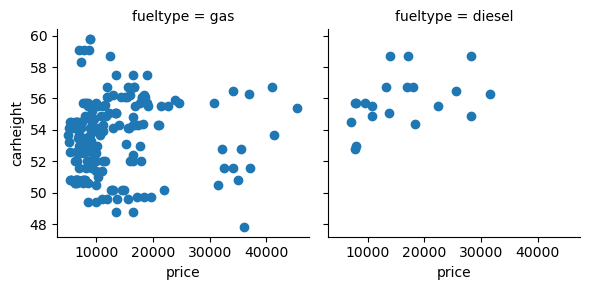

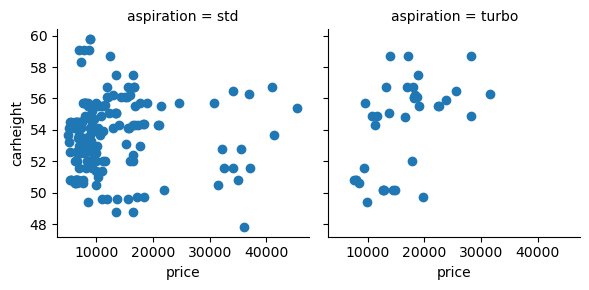

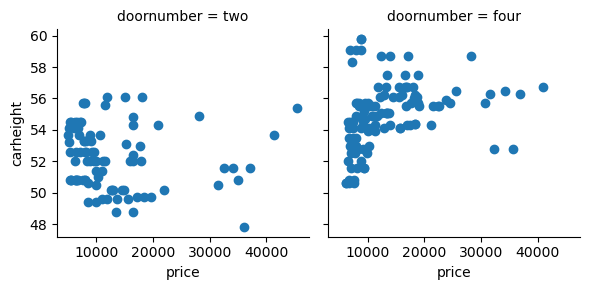

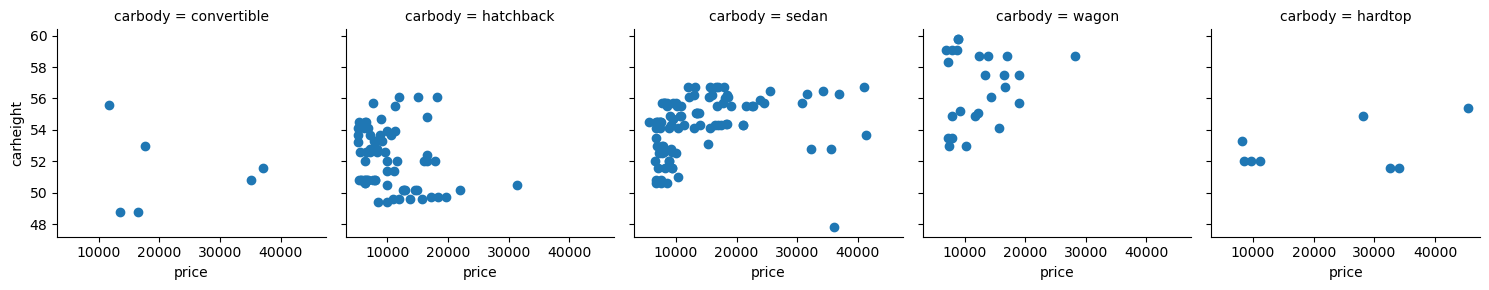

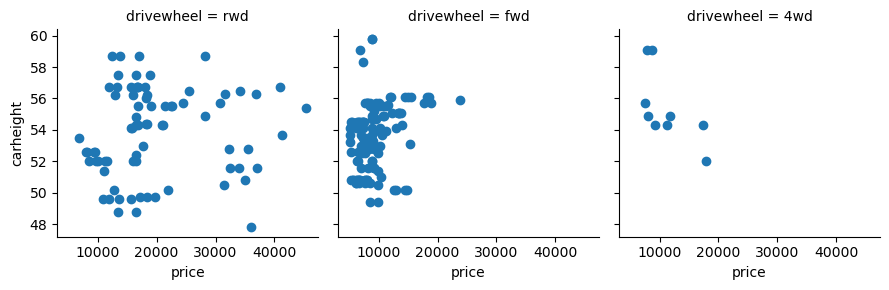

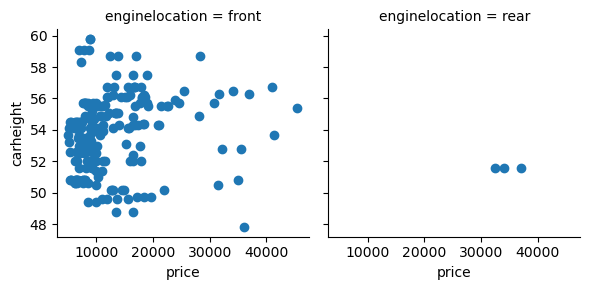

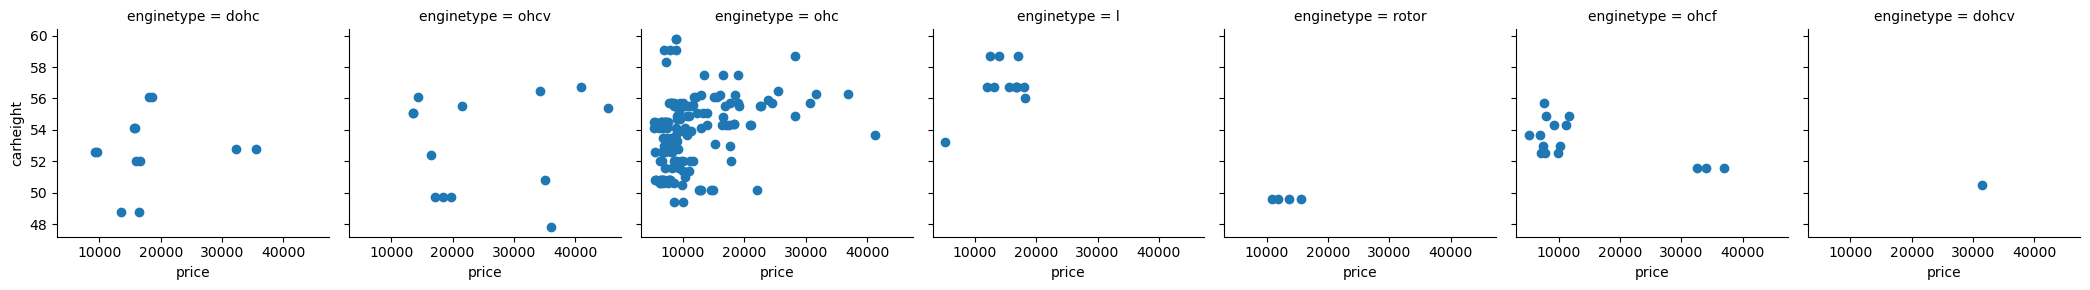

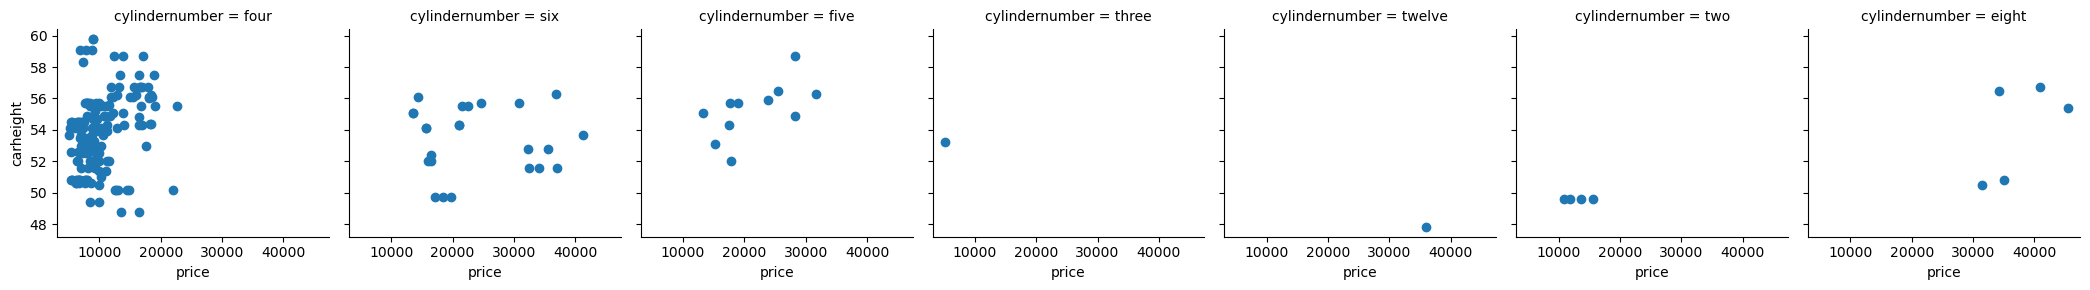

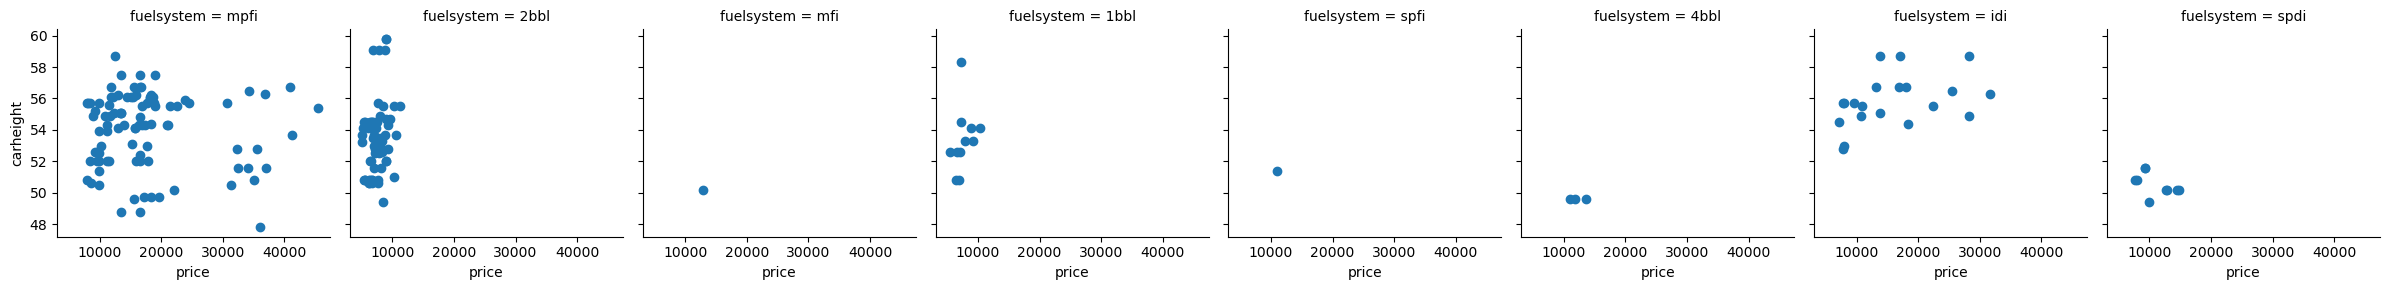

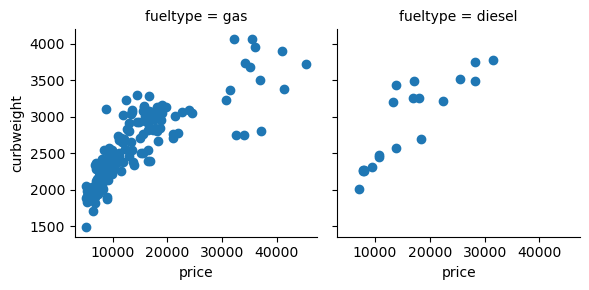

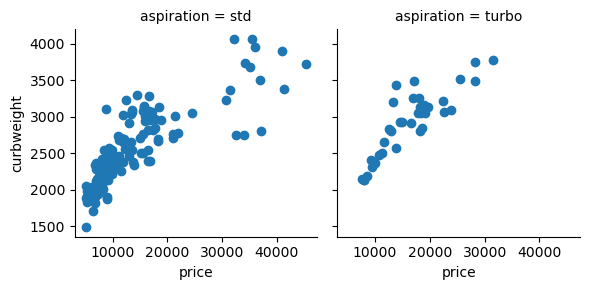

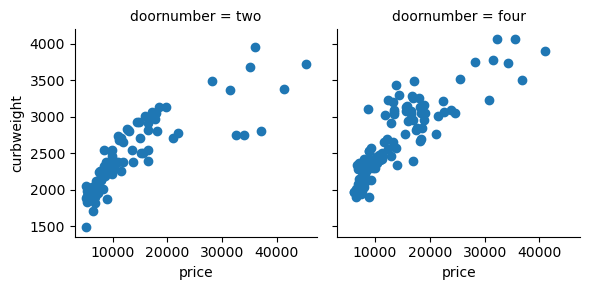

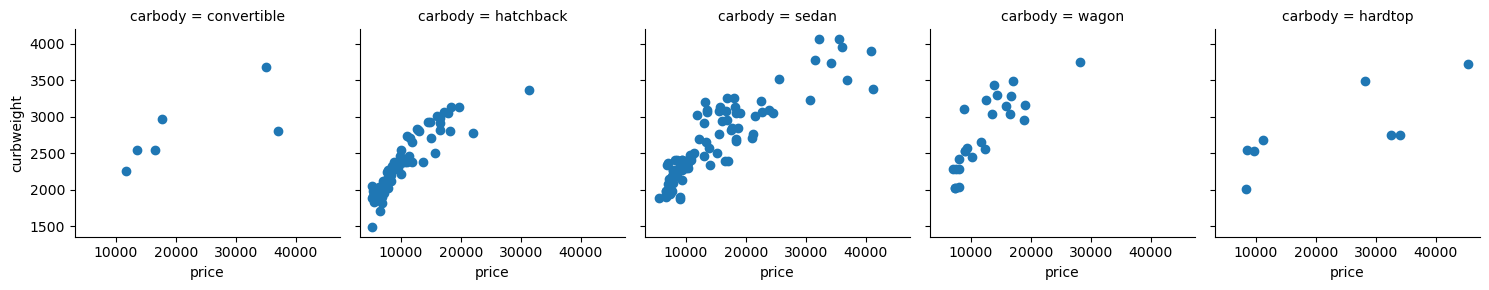

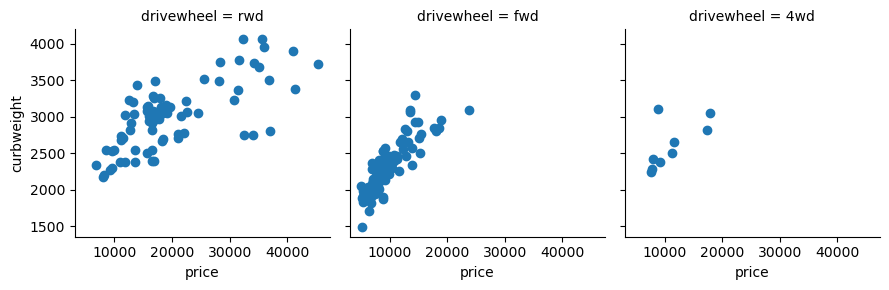

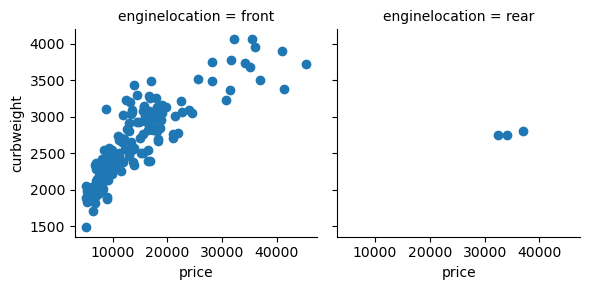

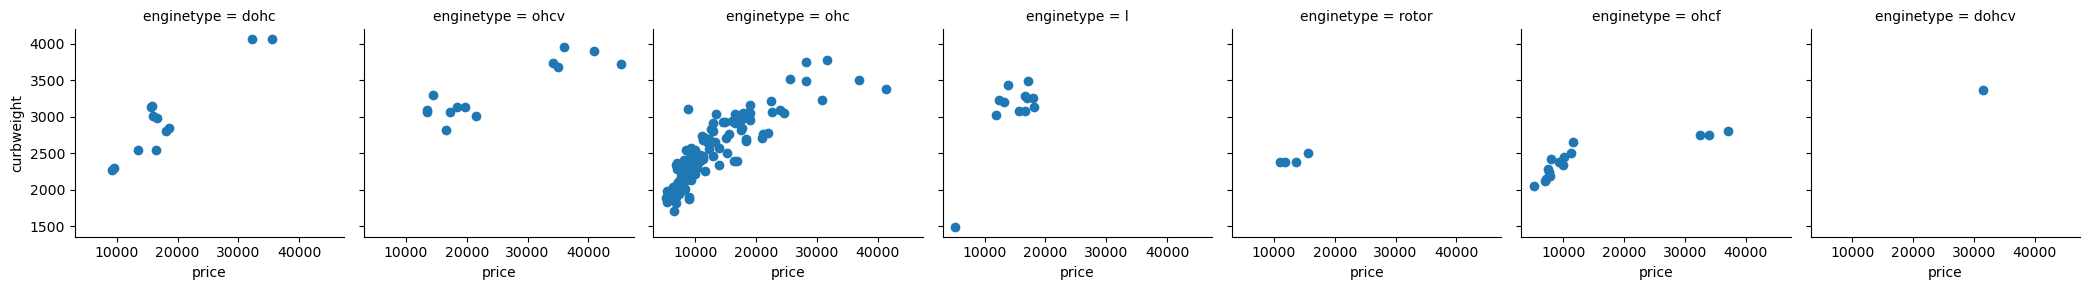

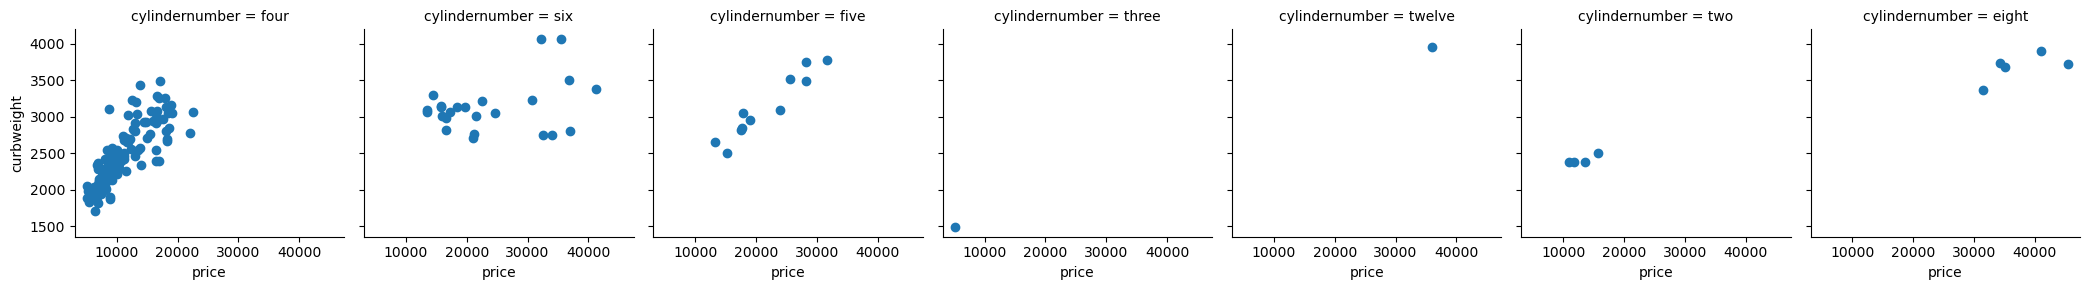

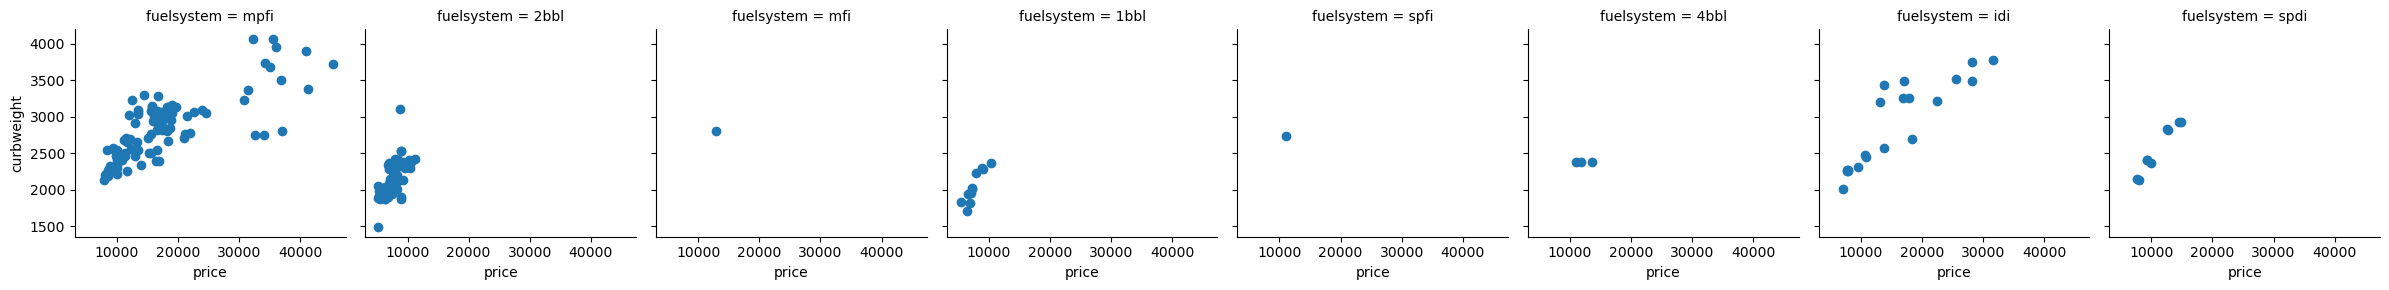

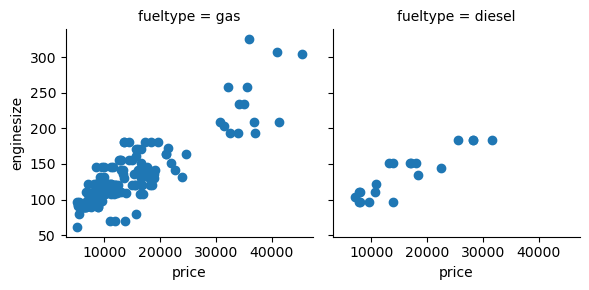

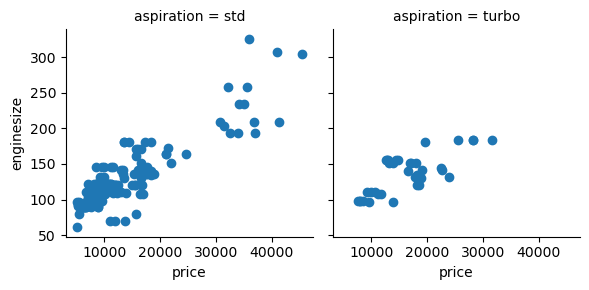

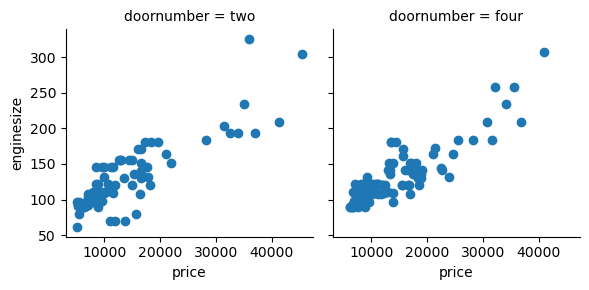

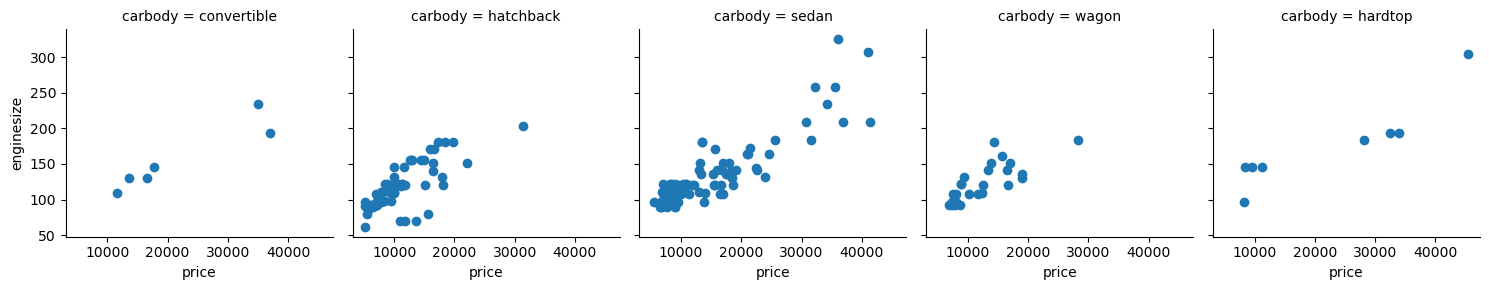

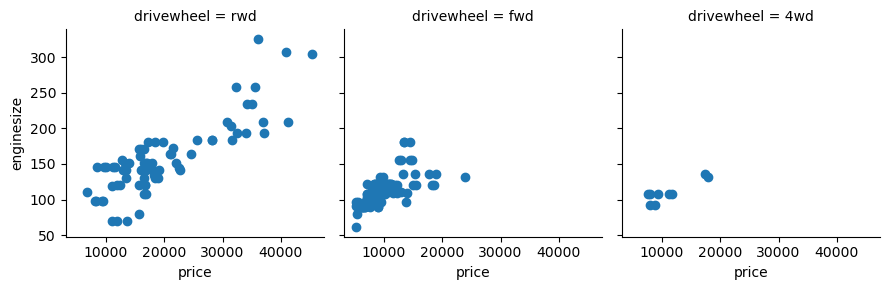

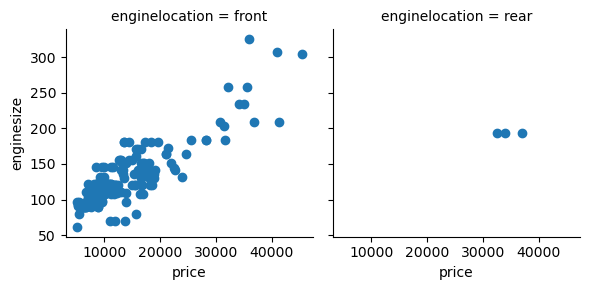

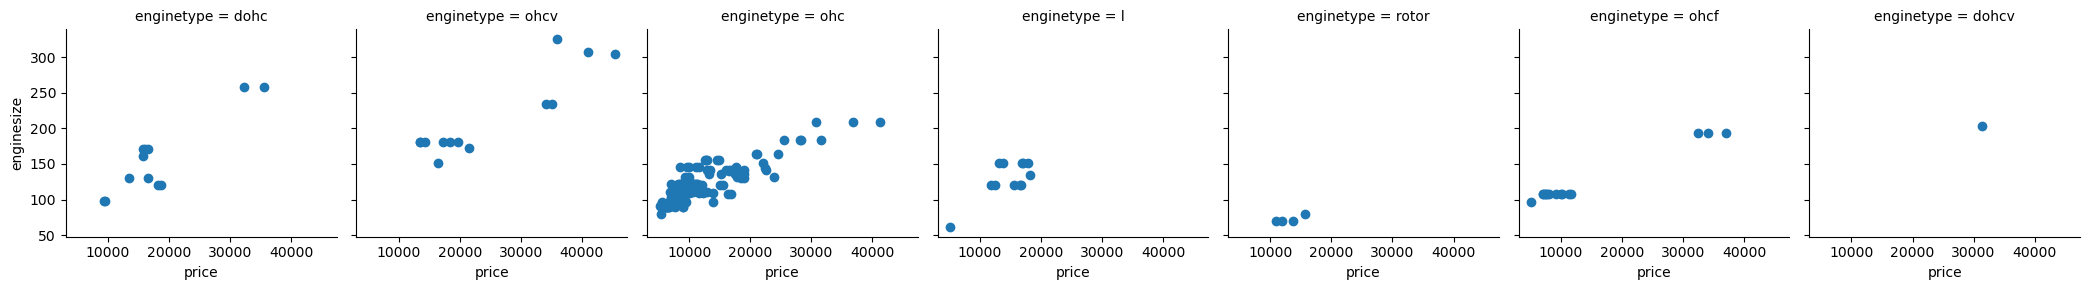

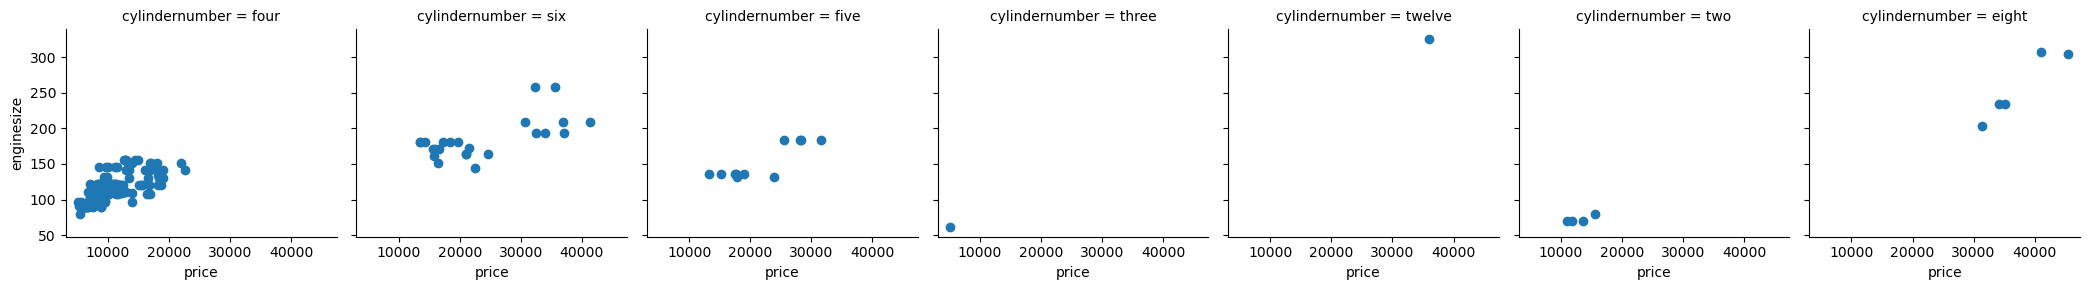

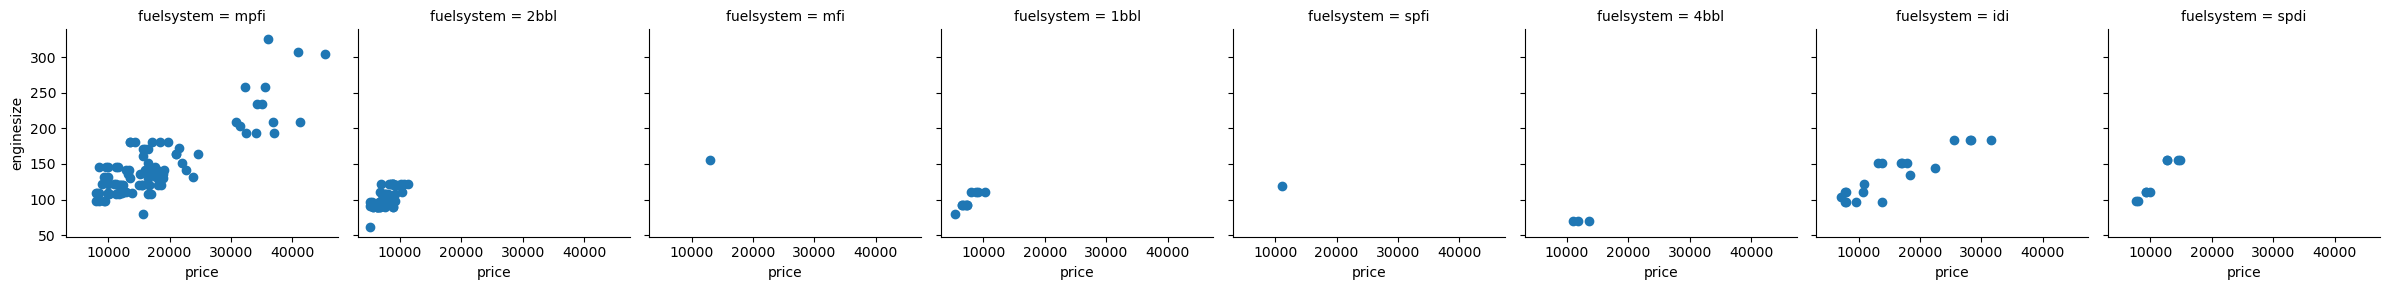

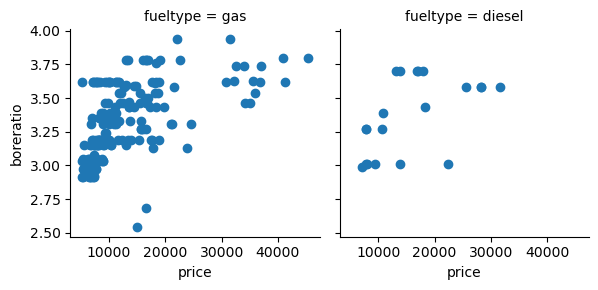

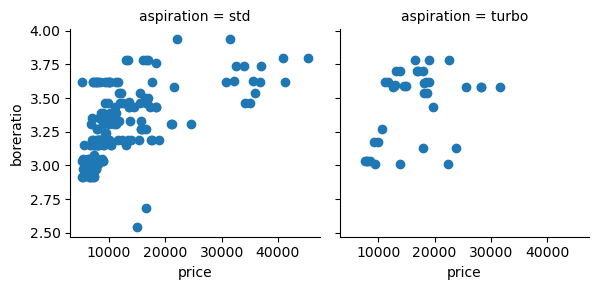

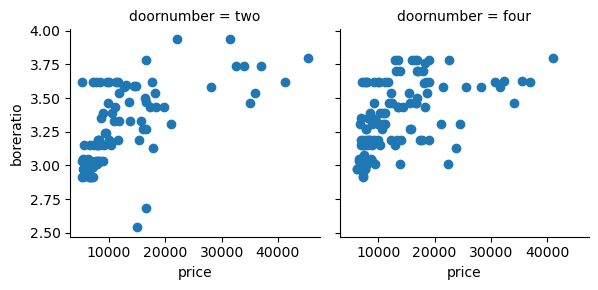

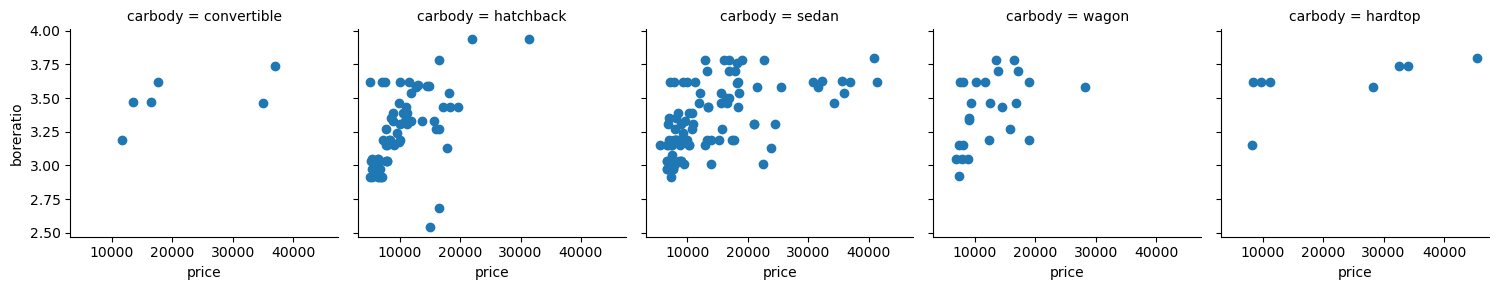

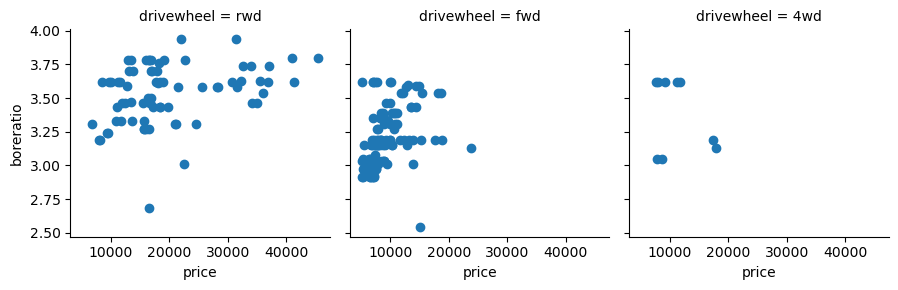

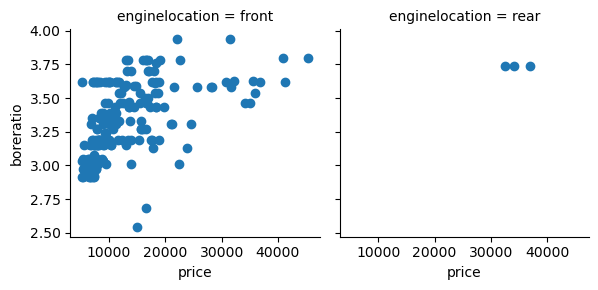

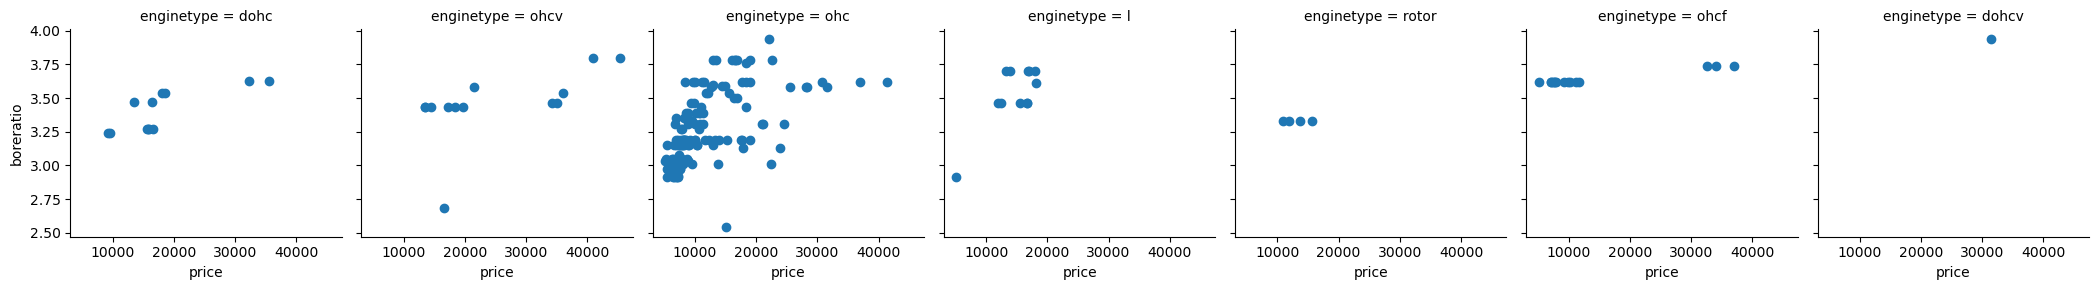

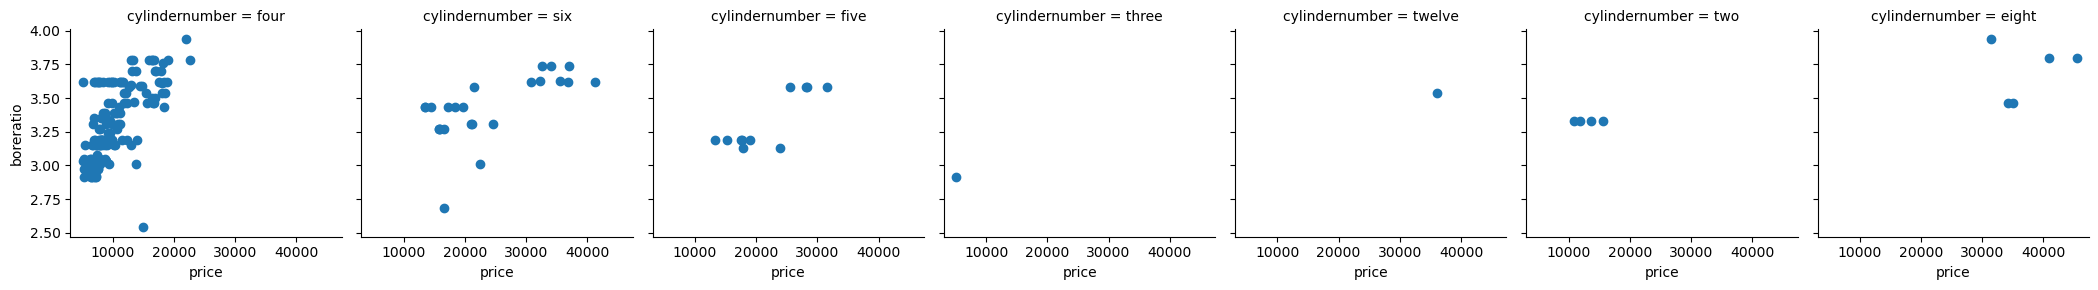

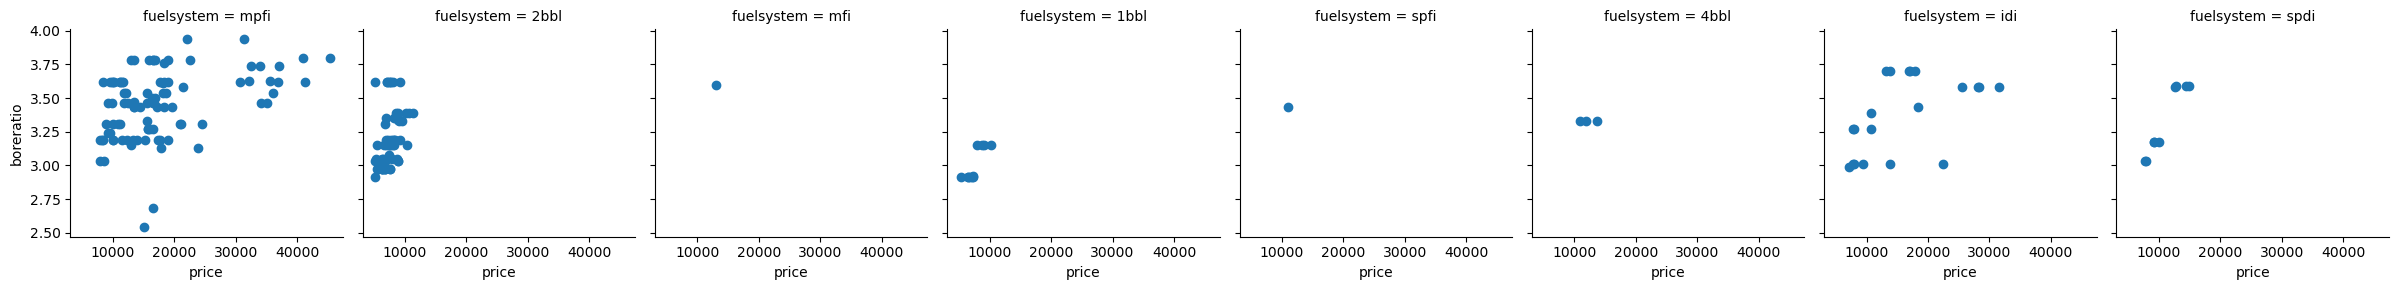

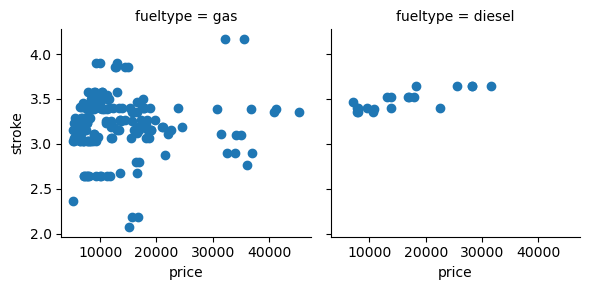

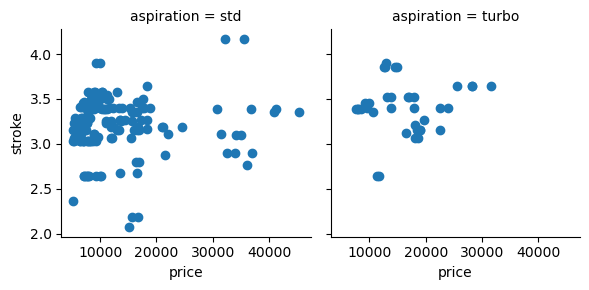

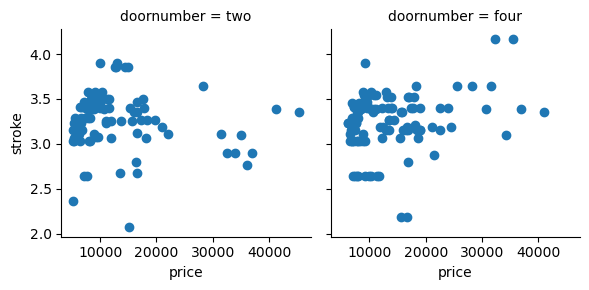

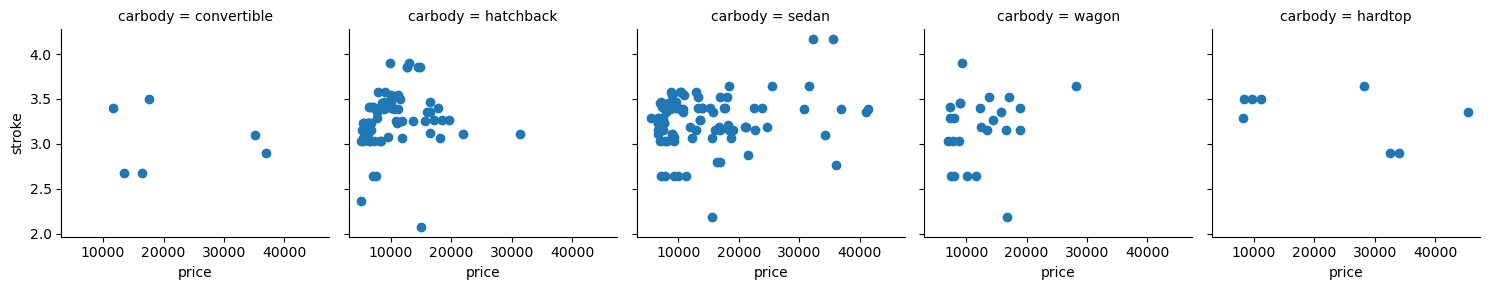

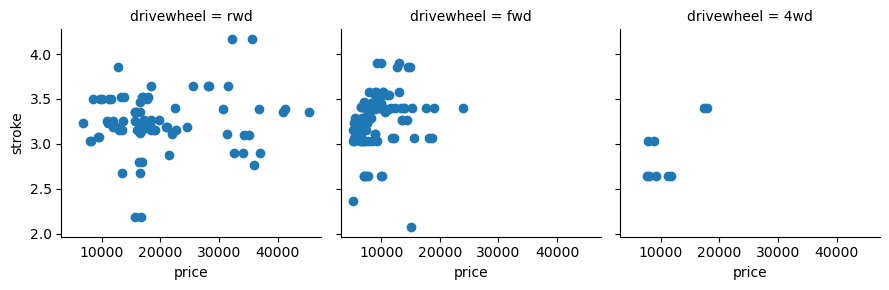

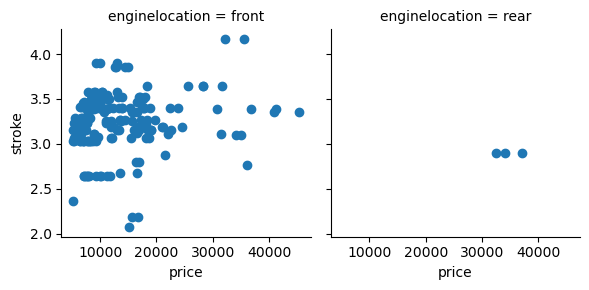

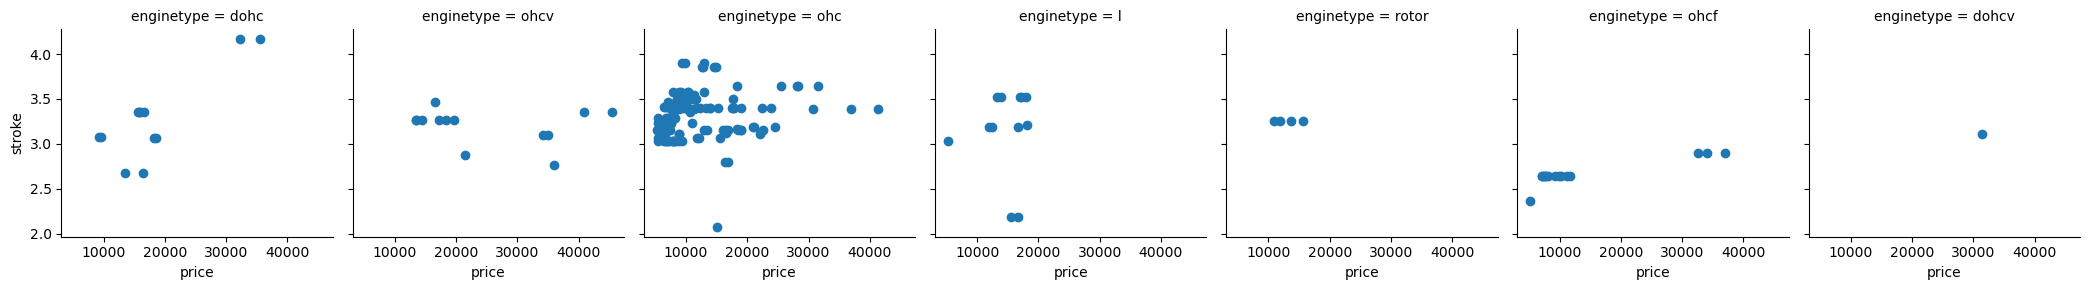

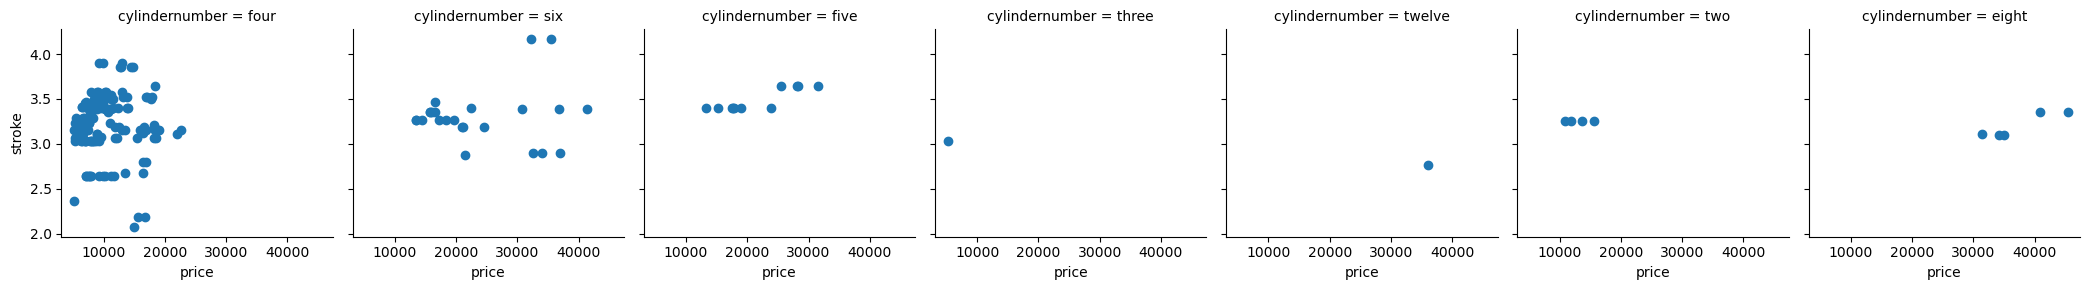

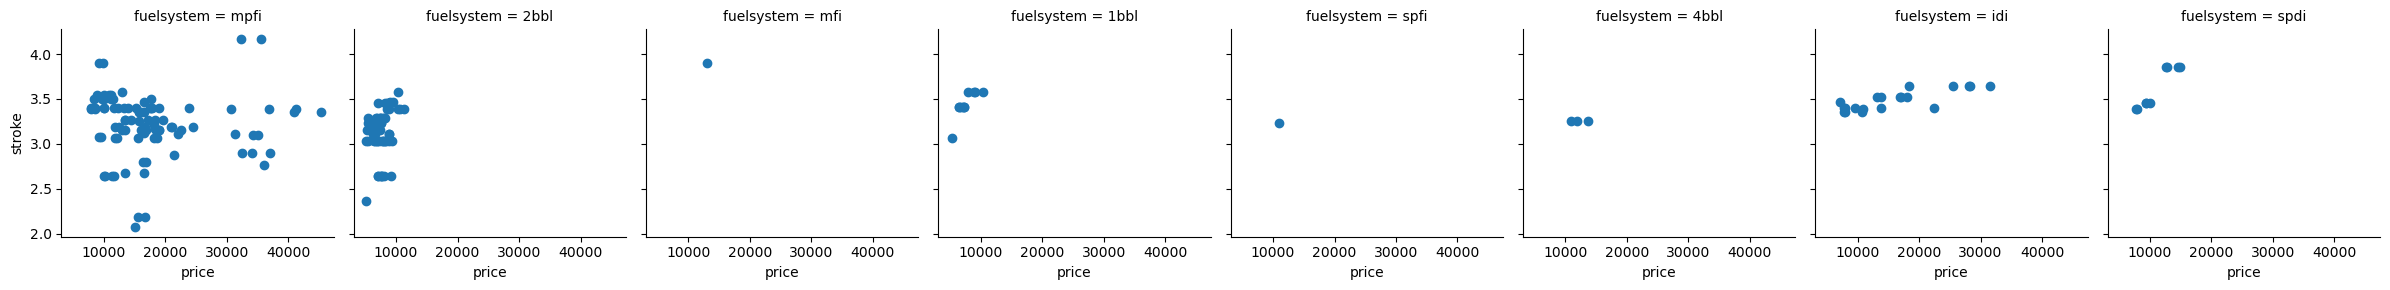

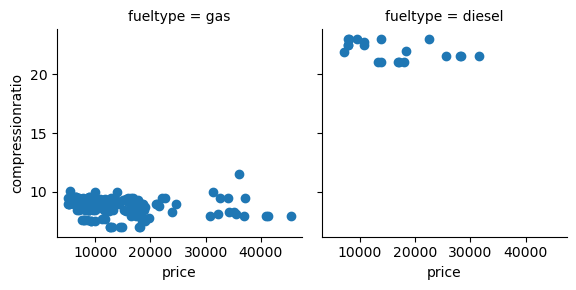

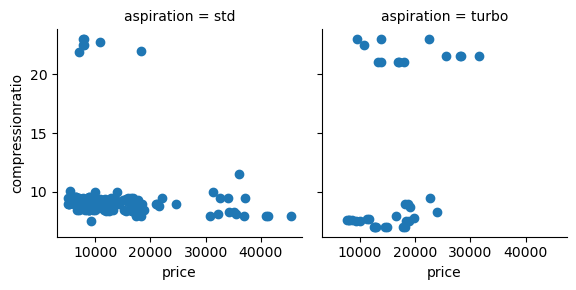

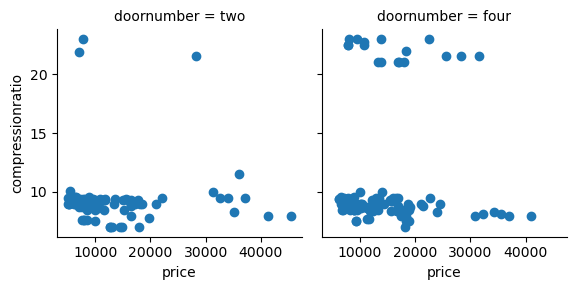

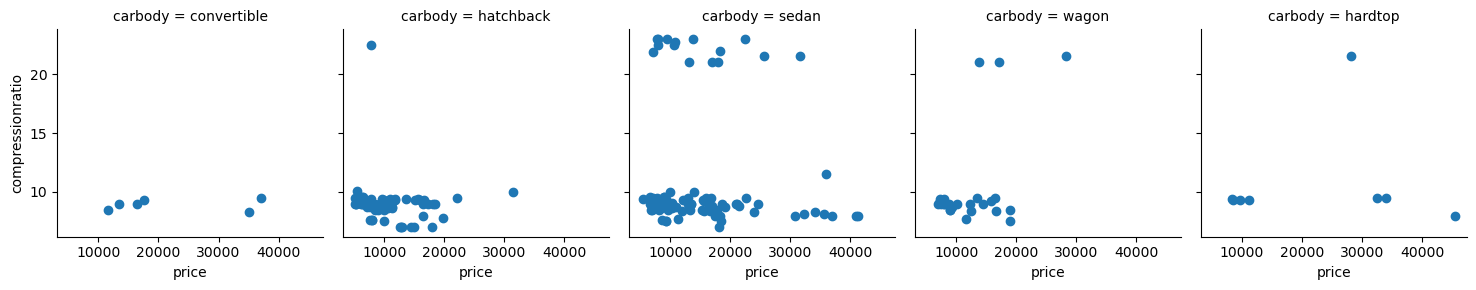

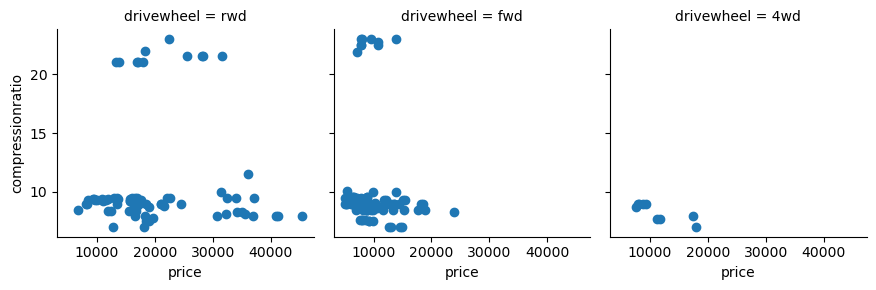

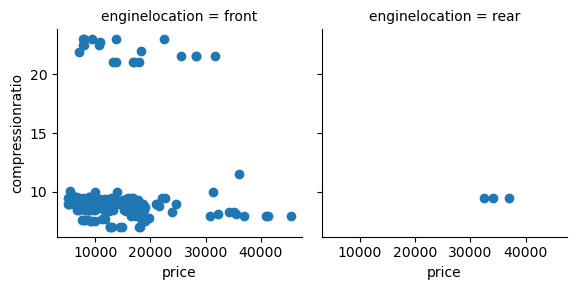

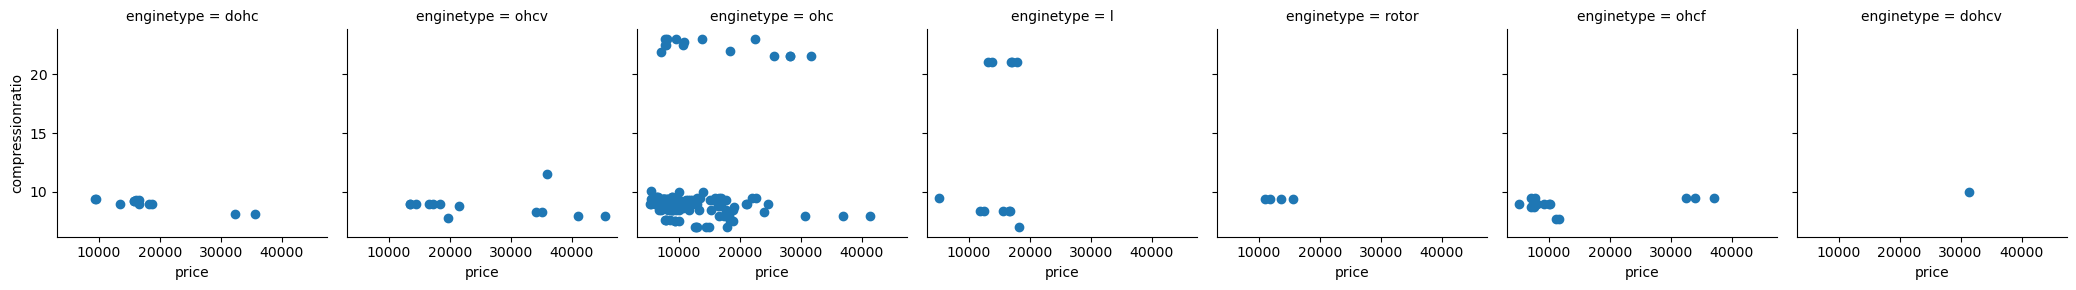

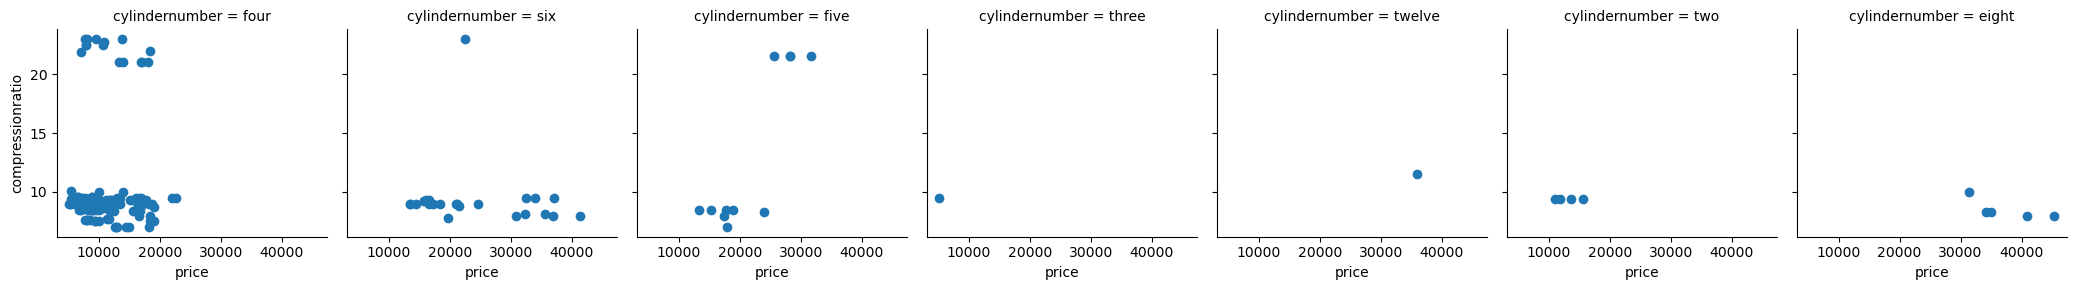

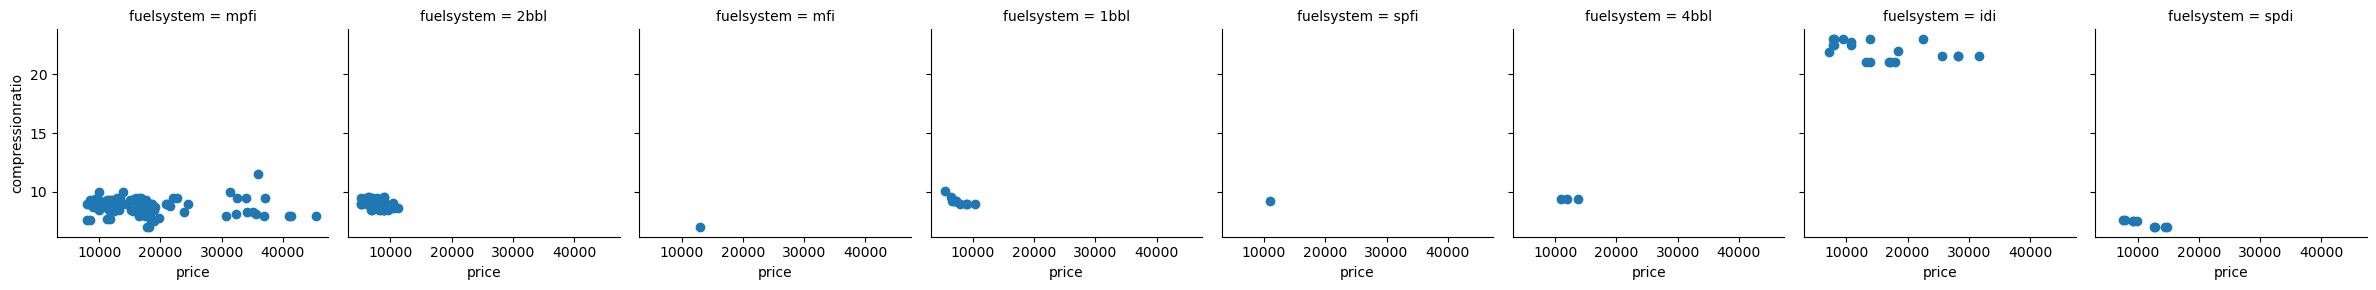

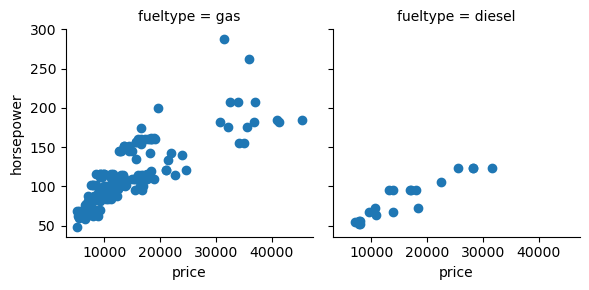

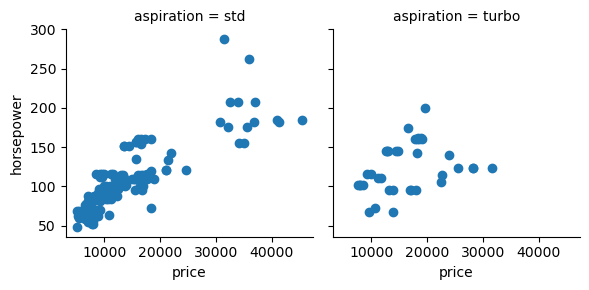

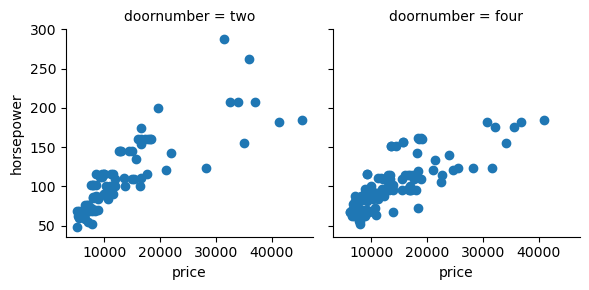

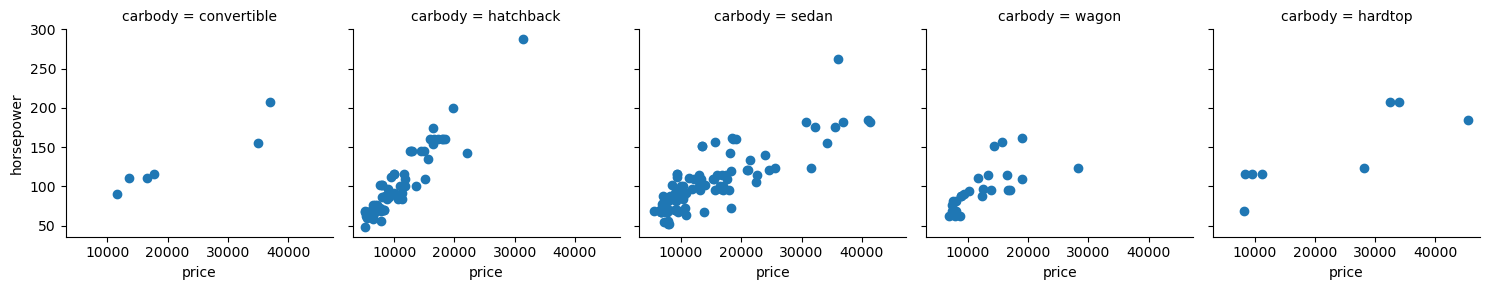

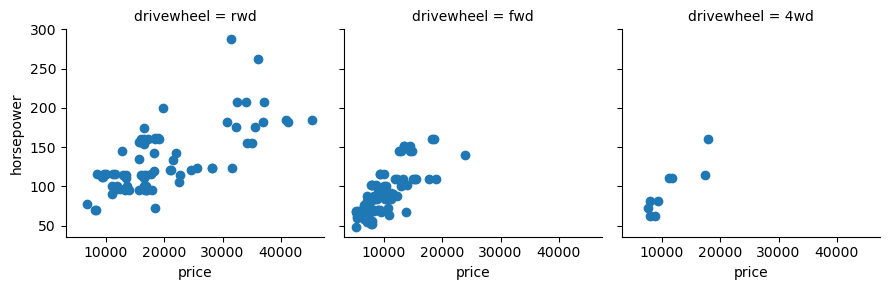

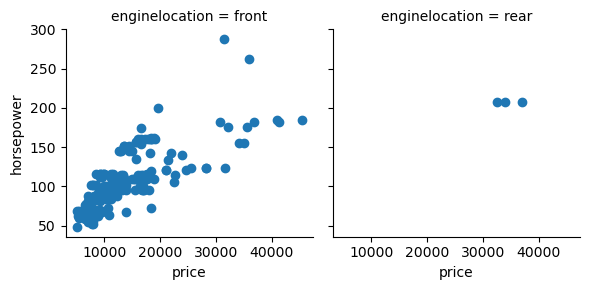

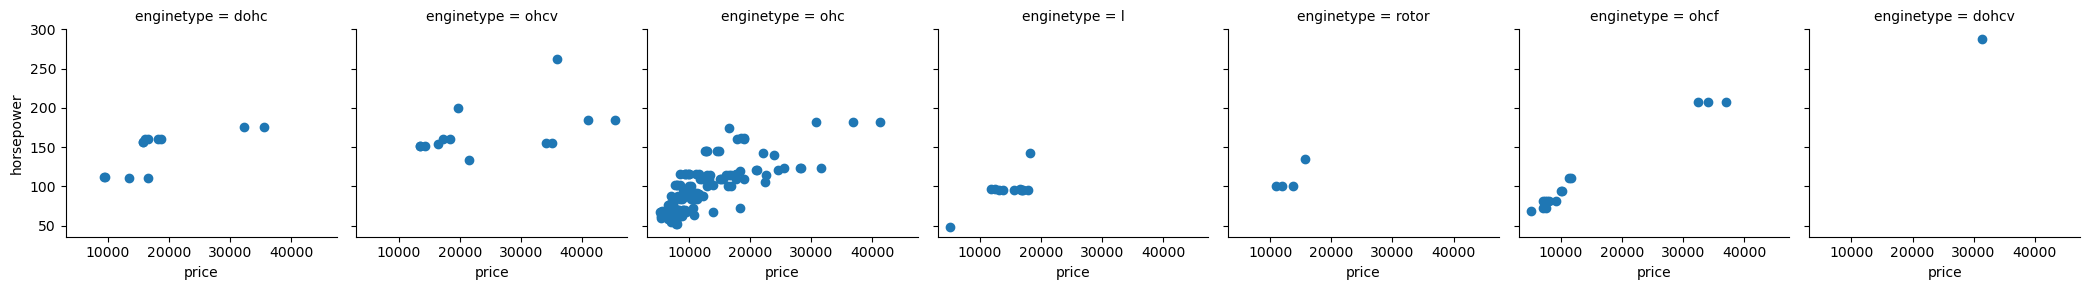

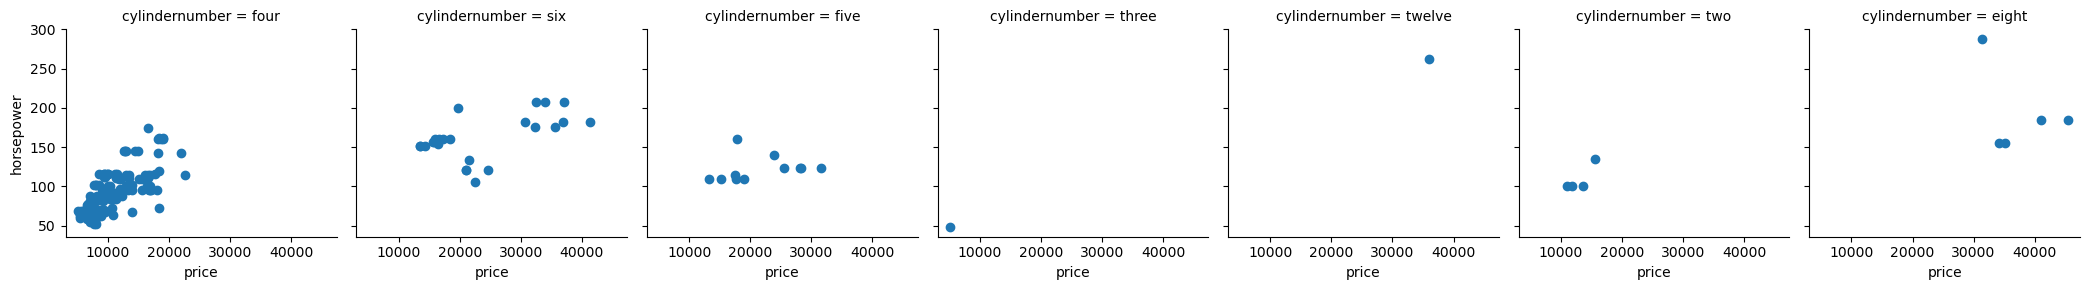

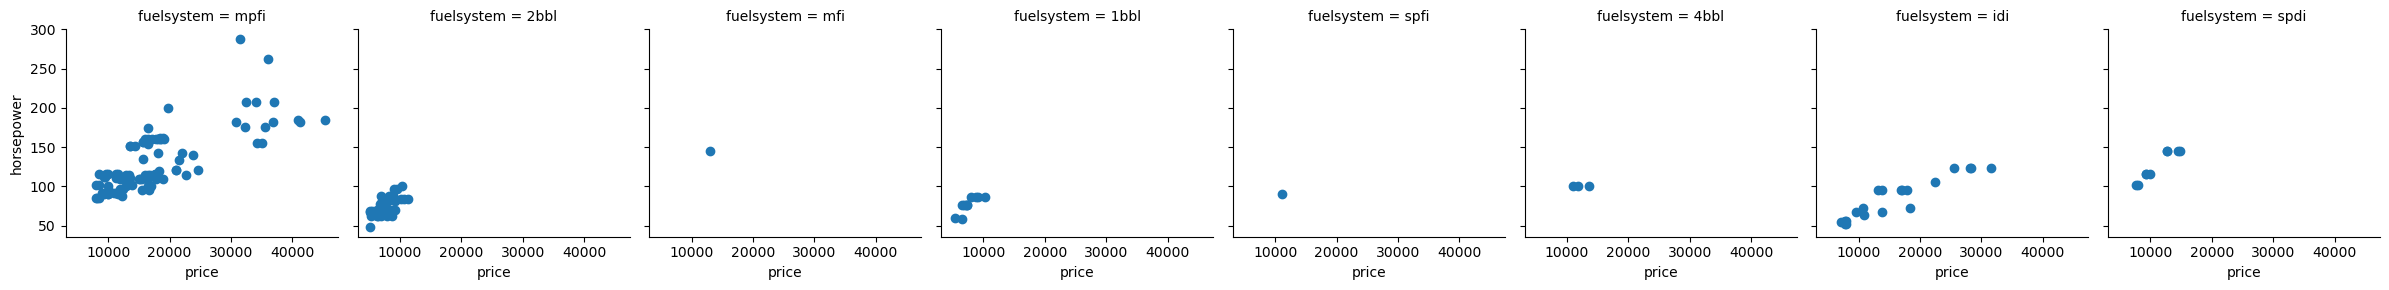

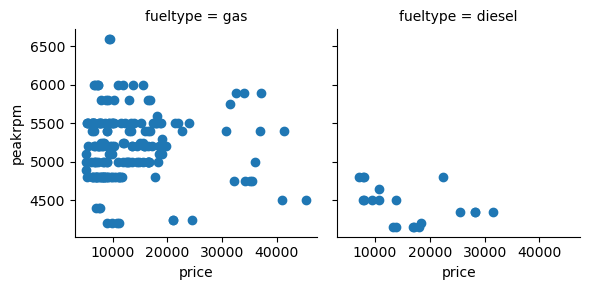

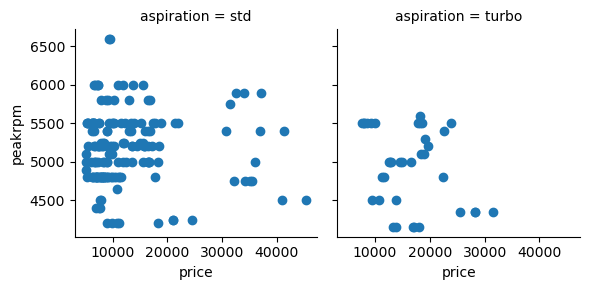

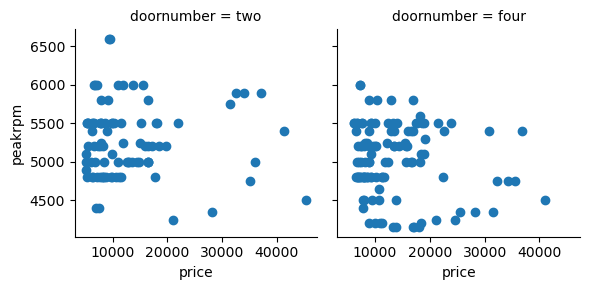

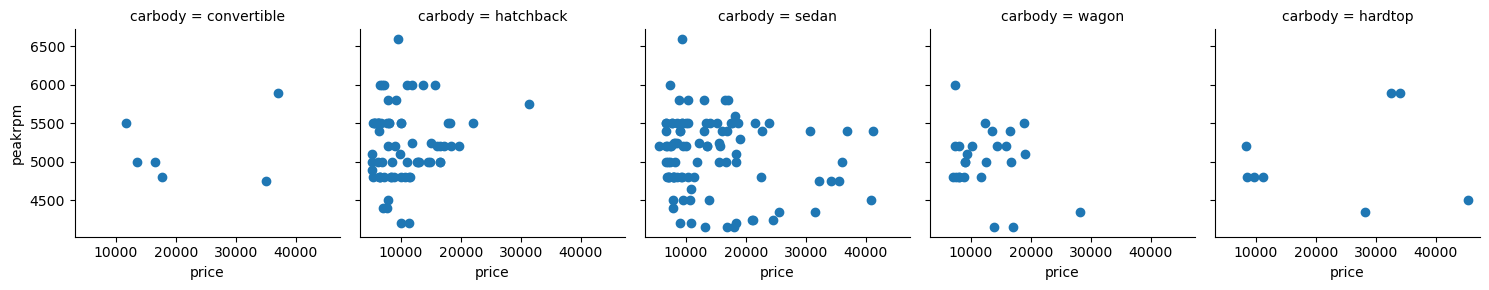

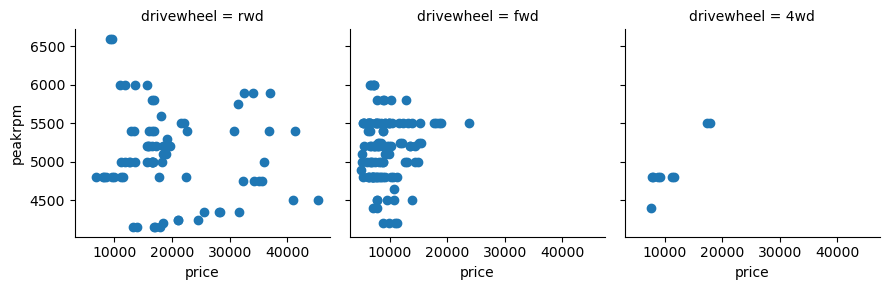

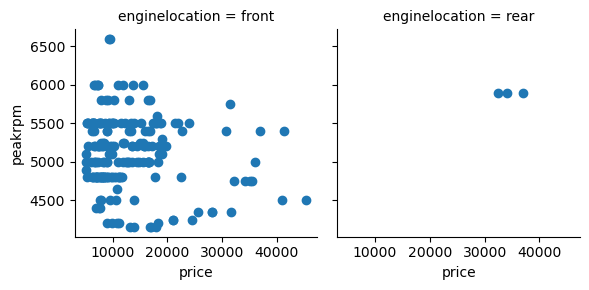

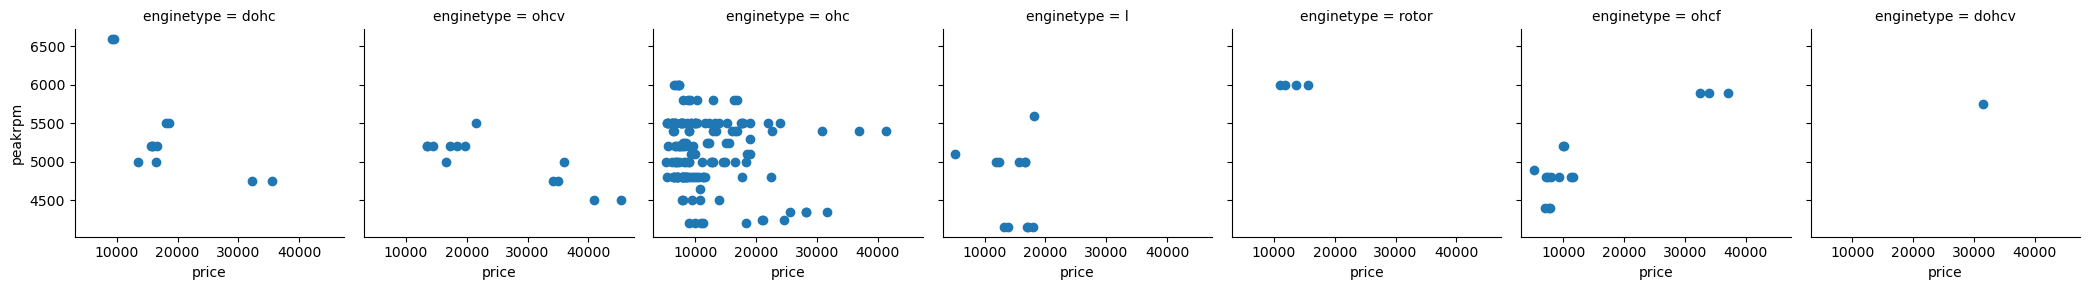

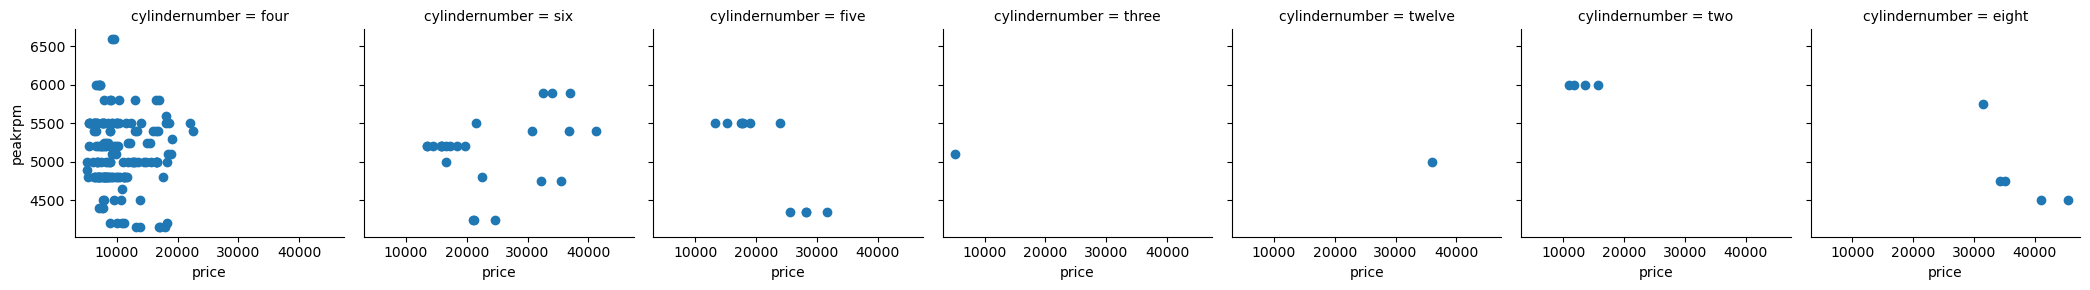

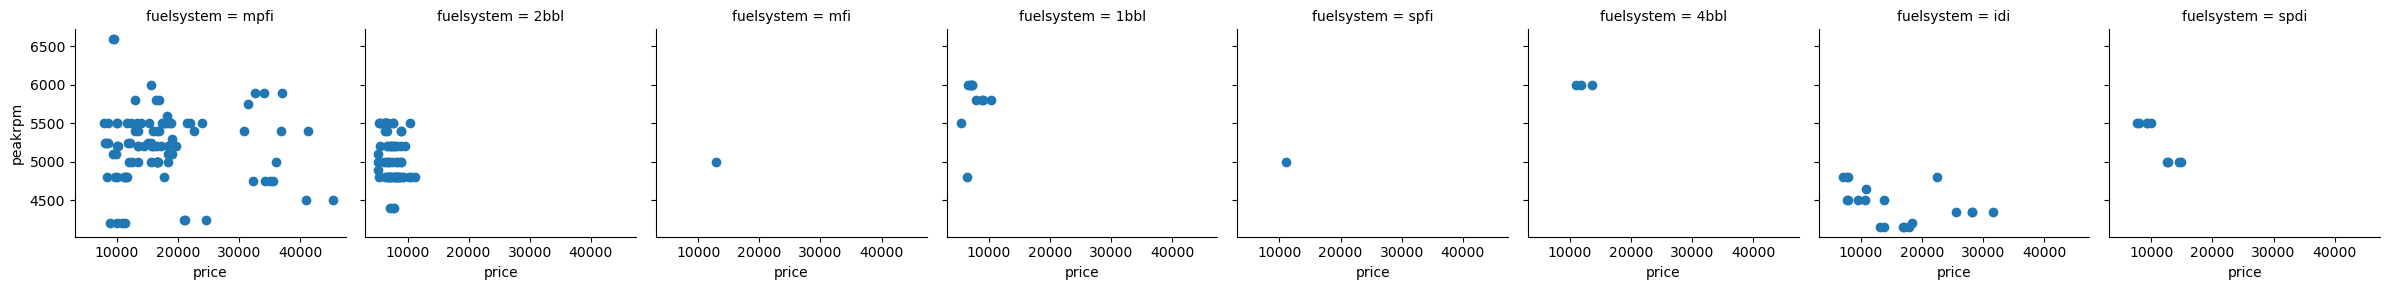

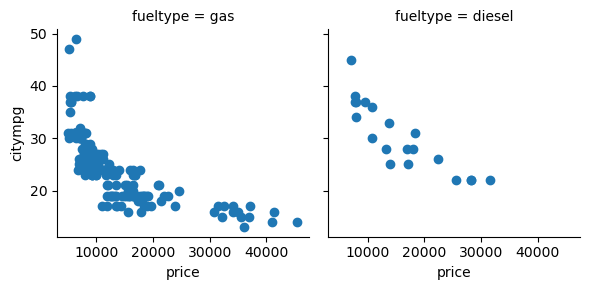

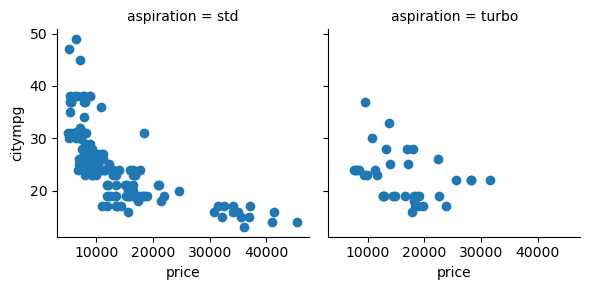

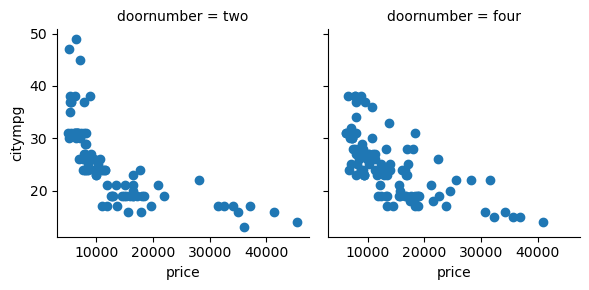

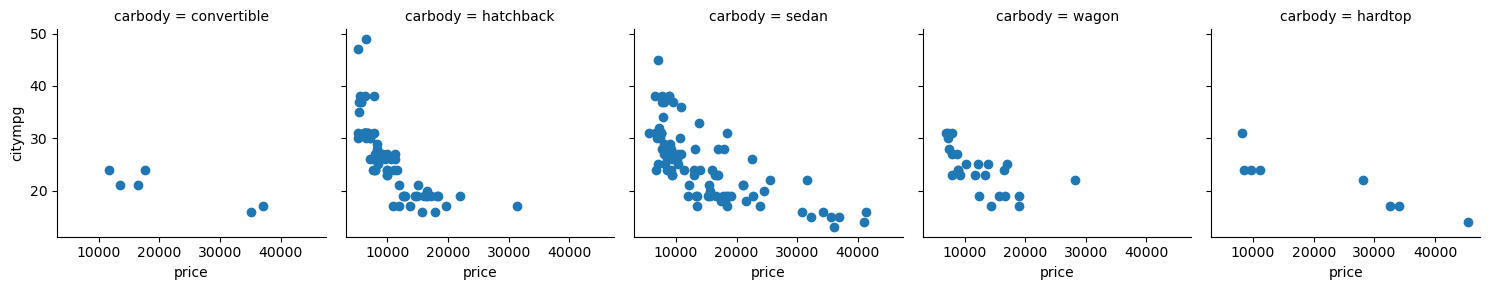

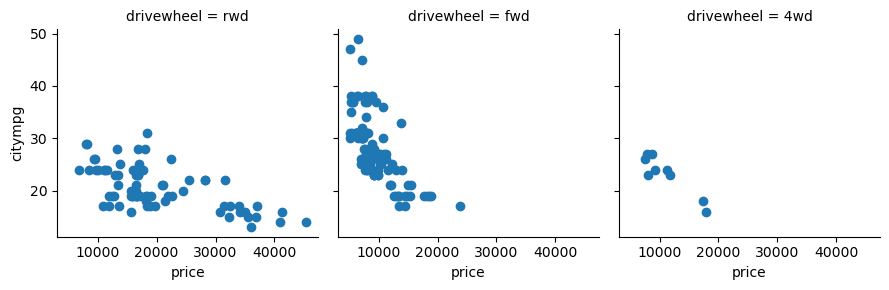

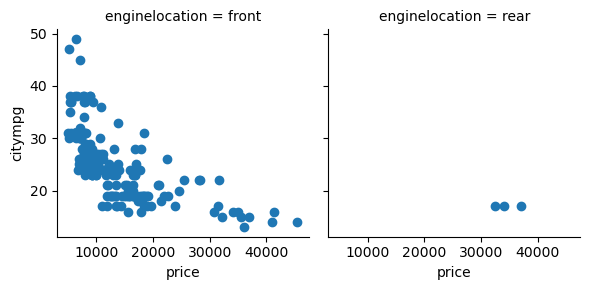

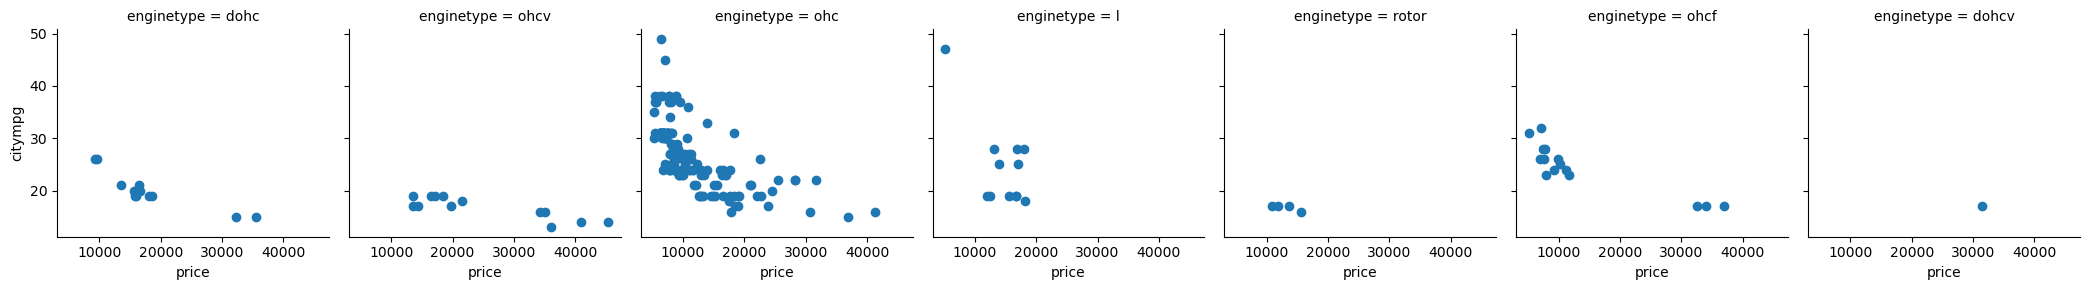

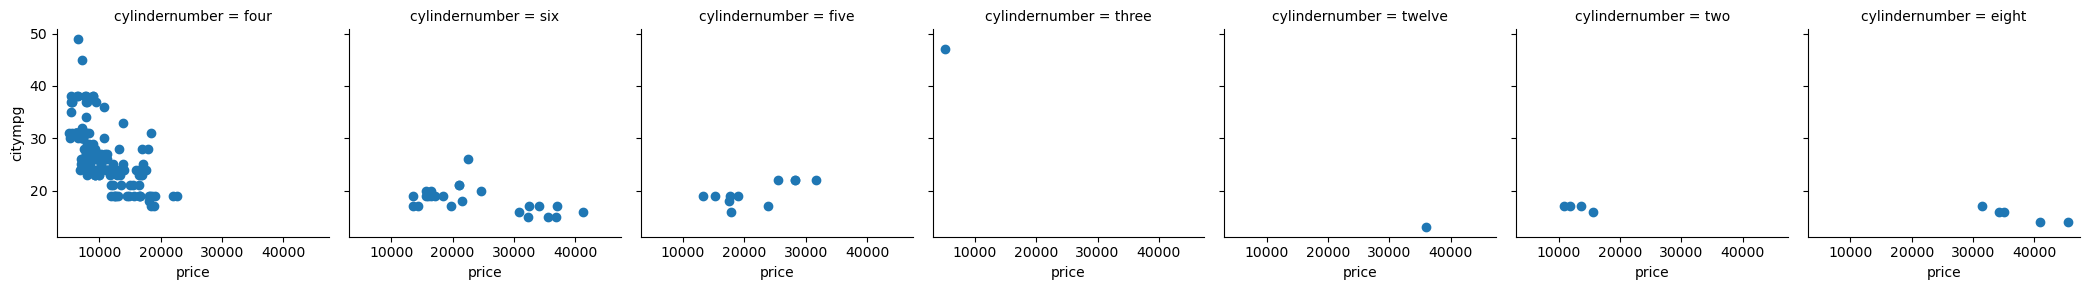

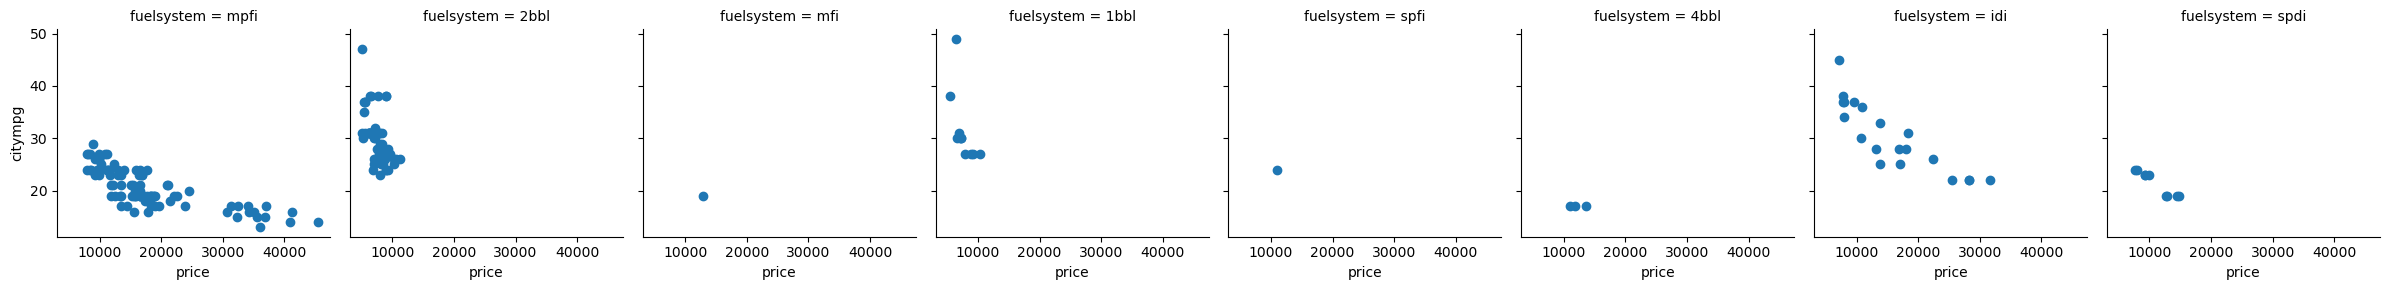

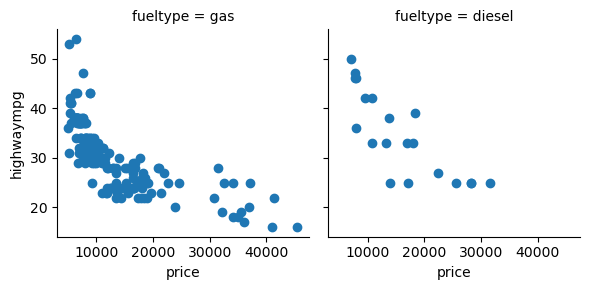

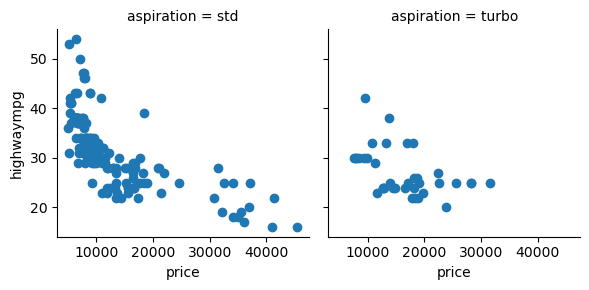

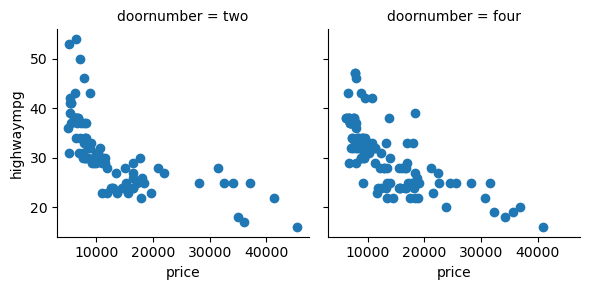

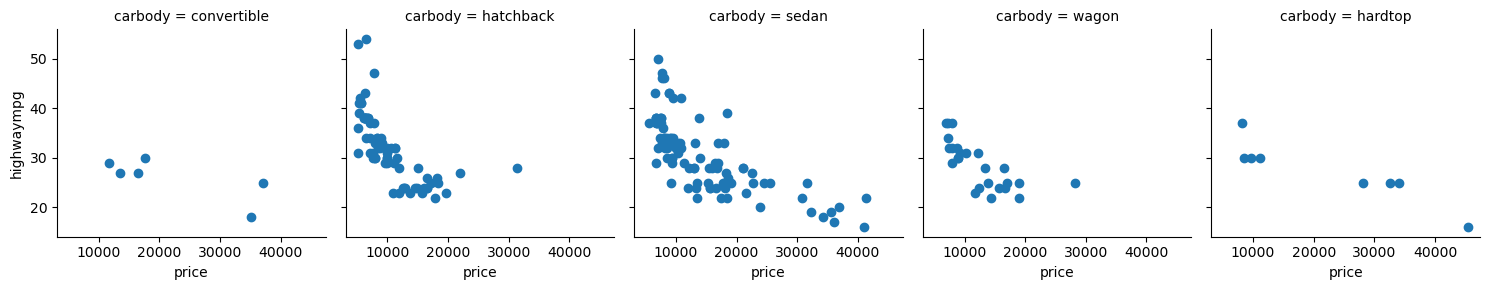

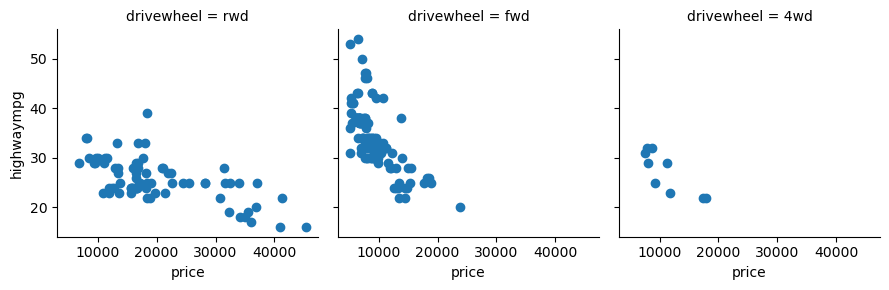

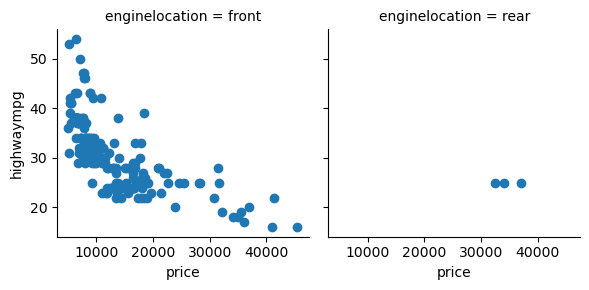

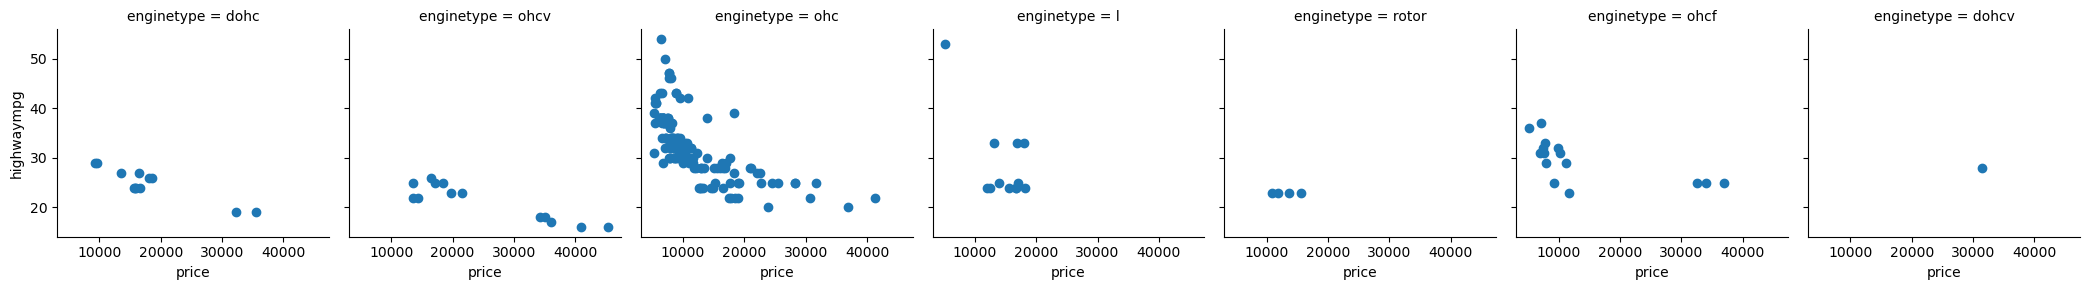

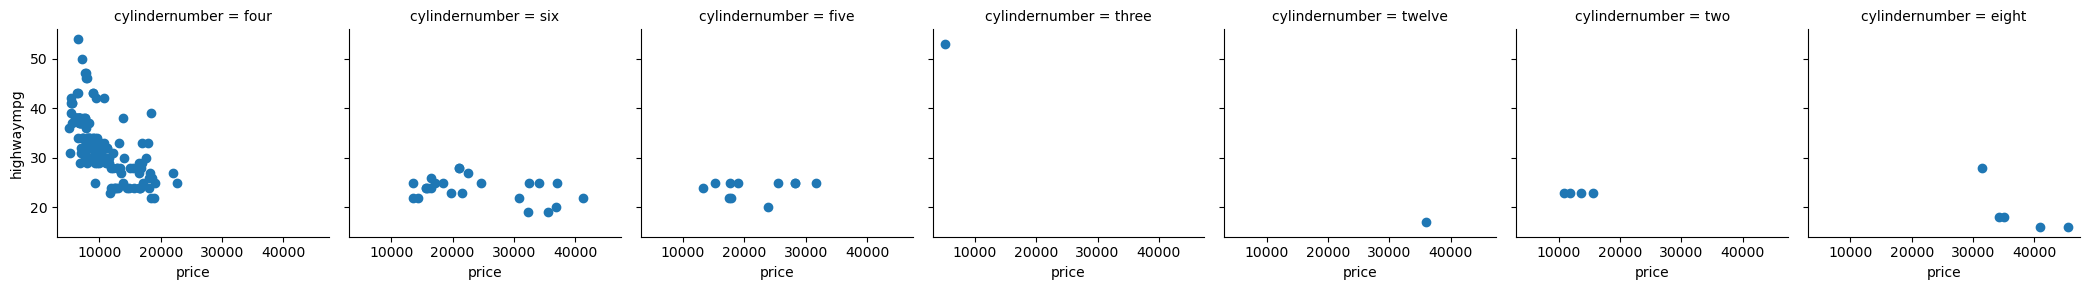

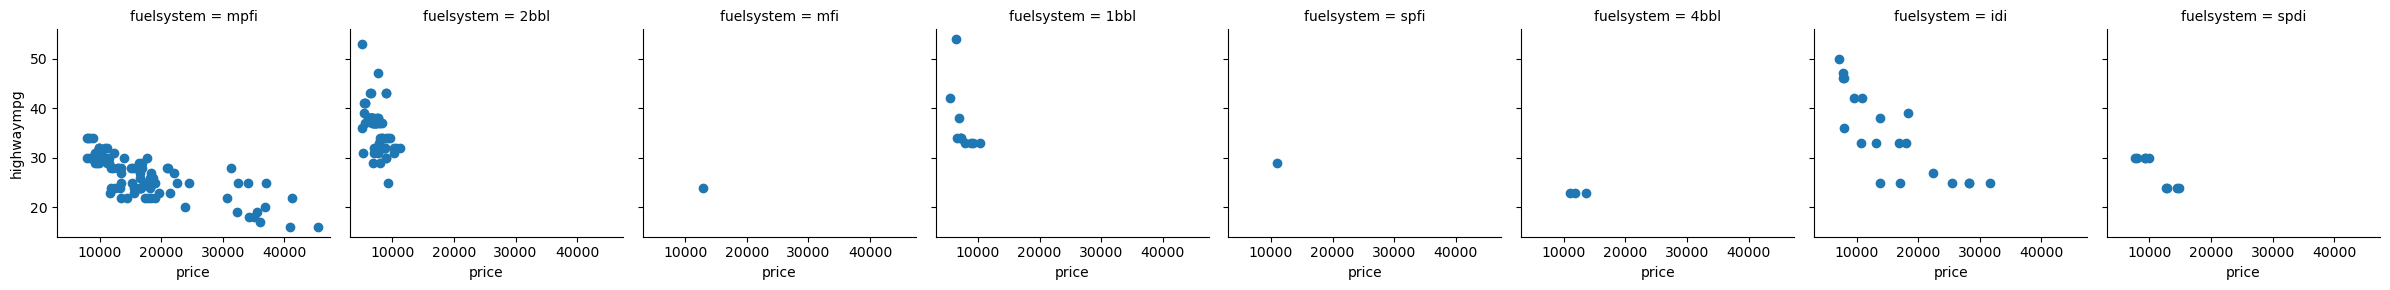

In [19]:
liste_Numériques_columns.remove('price')
for col_num in liste_Numériques_columns:
    for col_cat in liste_col_categorielle :
        f= sns.FacetGrid(data,col=col_cat)
        f.map(plt.scatter,'price',col_num)
        

# ✓Appliquer les techniques de Feature Engineering adaptées

## 1 - Compréhension du domaine et Nettoyage des données
### Nettoyage de la colonne CarName

Pourquoi on modifie seulement CarName ?
##### 1=>Elle contient des erreurs d’écriture
Exemple : toyouta au lieu de toyota, vokswagen au lieu de volkswagen.
- Ces fautes peuvent tromper le modèle.

##### 2=>Elle contient trop d'informations à la fois
Exemple : toyota corona → contient la marque + le modèle.
- On garde juste la marque (brand), car le modèle est trop détaillé.

In [20]:
# Travailler sur une copie
df = data.copy()

In [21]:
# Extraire la marque(brand) de la voiture
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Nous avons extrait la marque (brand) de chaque voiture à partir de la colonne CarName, en conservant uniquement le premier mot de chaque nom, et en le convertissant en minuscules pour assurer l’uniformité.

Ensuite, nous avons corrigé plusieurs erreurs d’orthographe détectées dans les noms de marques. Par exemple :

'maxda' a été remplacé par 'mazda'

'toyouta' par 'toyota'

'vokswagen' et 'vw' par 'volkswagen'

'porcshce' par 'porsche'

Après le nettoyage, nous avons obtenu un total de 22 marques distinctes correctement orthographiées, prêtes à être utilisées pour l’analyse.

In [22]:
# Corriger les erreurs d’écriture dans les noms de marques
df['brand'] = df['brand'].replace({
    'vw': 'volkswagen', 
    'vokswagen': 'volkswagen', 
    'toyouta': 'toyota', 
    'porcshce': 'porsche',
    'maxda': 'mazda',
    'alfa-romero' : 'alfa romeo'
})
# Afficher les marques uniques pour vérification
print(df['brand'].unique())
# Afficher le nombre des marques
print(f"{len(df['brand'].unique())} brand")

['alfa romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
22 brand


### placer la colonne brand en première position dans le DataFrame df

In [23]:
# Réorganiser les colonnes pour mettre 'brand' en première position
cols = df.columns.tolist()  # liste de toutes les colonnes
cols.insert(0, cols.pop(cols.index('brand')))  # déplacer 'brand' en première position
df = df[cols]  # réassigner les colonnes dans le nouvel ordre

In [24]:
df.columns

Index(['brand', 'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Identification des colonnes inutiles
1. car_ID :
   
          À supprimer sans hésitation
- La colonne car_ID sert uniquement d’identifiant unique pour chaque véhicule. Elle ne véhicule aucune information pertinente pour la prédiction du prix, et son maintien pourrait même introduire du bruit ou biaiser les modèles d’apprentissage automatique. Il est donc préférable de la retirer du jeu de données.

2. CarName :
   
         À supprimer
- La colonne CarName contenait à l’origine le nom complet du véhicule, incluant à la fois la marque et le modèle (ex. : « toyota corolla »).
Cependant, la marque a déjà été extraite dans une nouvelle colonne dédiée, ce qui permet de conserver l’information la plus pertinente pour l’analyse du prix.
- La colonne CarName n’apporte donc plus de valeur ajoutée et peut désormais être supprimée sans risque de perte d’information utile.

In [25]:
df = df.drop(columns=['car_ID', 'CarName'])
df.columns

Index(['brand', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Conversion des colonnes textuelles en valeurs numériques : doornumber et cylindernumber

- Les colonnes doornumber (nombre de portes) et cylindernumber (nombre de cylindres) présentent actuellement leurs valeurs sous forme textuelle, par exemple : "two", "four", "six". Ce format n’est pas directement exploitable par les modèles de machine learning, qui attendent des valeurs numériques pour ces variables.

- L’objectif est donc de convertir ces mentions littérales en nombres entiers afin de permettre une interprétation correcte et une utilisation optimale de ces informations lors de l’entraînement des modèles prédictifs.

In [26]:
# la colonne cylindernumber contient les valeurs suivantes :['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

# appliquation :

cylinder_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_map).astype(int)

print("les valeurs de la colonne cylindernumber apres la conversion :")
df["cylindernumber"].unique()

les valeurs de la colonne cylindernumber apres la conversion :


array([ 4,  6,  5,  3, 12,  2,  8])

In [27]:
# les valeurs de la colonne doornumber : ['two', 'four']

# application :

door_map = {'two': 2, 'four': 4}
df['doornumber'] = df['doornumber'].map(door_map).astype(int)

print("les valeurs de la colonne doornumber apres la conversion :")
df["doornumber"].unique()

les valeurs de la colonne doornumber apres la conversion :


array([2, 4])

In [28]:
# verification de type des deux colonnes :
print(df[['doornumber', 'cylindernumber']].dtypes)

doornumber        int32
cylindernumber    int32
dtype: object


### Uniformisation des colonnes textuelles

Garantir l’homogénéité des données textuelles en appliquant des règles de transformation standard à l’ensemble des colonnes de type texte. Cette démarche permet d’éviter les incohérences liées à des différences de casse (majuscules/minuscules) ou à la présence d’espaces superflus, assurant ainsi une interprétation fiable et un traitement optimal des données.

- Actions menées
1. Mise en minuscules : Toutes les valeurs textuelles ont été converties en minuscules afin que des entrées comme " Gas ", " gas " ou " GAS " soient reconnues comme identiques.
2. Suppression des espaces inutiles : Les espaces au début et à la fin des chaînes de caractères ont été supprimés. Cette opération corrige les petites erreurs comme "turbo " ou " std " qui pourraient sinon perturber l’analyse.

In [29]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

##### Résultats :

- Les données textuelles sont désormais uniformisées, ce qui les rend plus faciles à exploiter et prêtes pour des techniques d’encodage telles que le One-Hot Encoding.
- Cette standardisation permet de réduire significativement le bruit dans les visualisations et lors de la modélisation.
- Elle prévient également les doublons logiques pouvant survenir à cause de variations d’écriture.

### Regroupement des types de moteurs similaires (enginetype)
Dans cette étape, le but est de simplifier la variable enginetype en regroupant ensemble les valeurs qui désignent, en réalité, le même type de moteur ou des variantes très proches. Par exemple, certaines valeurs comme ohc, ohcf et ohcv correspondent toutes à des moteurs à arbre à cames en tête (OHC), tandis que dohc et dohcv désignent des moteurs à double arbre à cames en tête (DOHC). Puisqu'elles se ressemblent beaucoup sur le plan technique et ont des effets similaires sur la performance des véhicules, il est logique de les fusionner.

Pourquoi faire ça ?

- Cela simplifie la variable avant de l’encoder (par exemple avec un OneHotEncoder).
- Ça évite d’avoir des catégories trop rares qui pourraient perturber le modèle.
- L’interprétation des résultats devient plus facile.
- Les prédictions du modèle seront plus fiables et moins sensibles à des cas particuliers.

À la fin de ce regroupement, on garde seulement les catégories suivantes :

- "ohc" regroupe ohc, ohcf et ohcv,
- "dohc" regroupe dohc et dohcv,
- "rotor" reste inchangé,
- "l" reste inchangé (cas particulier, moteur en ligne ou ancienne notation).

In [30]:
# Regroupement des types de moteur
df['enginetype'] = df['enginetype'].replace({
    'ohcf': 'ohc', 'ohcv': 'ohc',
    'dohcv': 'dohc'
})
# Maintient 'l' et 'rotor' séparés pour conserver leur spécificité
df['enginetype'].value_counts()

enginetype
ohc      176
dohc      13
l         12
rotor      4
Name: count, dtype: int64

### Suppression des doublons
La présence de lignes identiques, ou très similaires, peut fausser l’analyse statistique ou perturber le comportement des modèles prédictifs. Il est donc important de détecter et traiter ces doublons afin de garantir la fiabilité des résultats.

In [31]:
# Vérifier les lignes doublons
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


### correction des valeurs aberrantes
- Lors de l’analyse exploratoire des données (EDA), nous avons déjà identifié les colonnes présentant des valeurs aberrantes à l’aide de boxplots.
  - cols_outliers = ['wheelbase','carlength','carwidth','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
- Nous nous concentrons à présent sur la correction de ces valeurs extrêmes afin d’améliorer la qualité des données et la fiabilité des analyses ultérieures.



- Deux approches principales peuvent alors être envisagées :

1. Suppression des valeurs aberrantes :
- Lorsque l’on dispose d’un jeu de données suffisamment volumineux, il est envisageable de supprimer purement et simplement les lignes contenant des outliers. Cette méthode permet d’éliminer les points extrêmes susceptibles de fausser l’analyse, sans impacter significativement la représentativité globale de l’échantillon.

2. Correction des valeurs aberrantes :
- En revanche, si le dataset est de taille modeste ou bien équilibré, la suppression de données peut nuire à la qualité de l’analyse et à la robustesse des modèles. Dans ce contexte, il est préférable d’opter pour des techniques de correction, telles que la winsorisation, qui consistent à remplacer les valeurs extrêmes par des seuils plus raisonnables tout en conservant l’ensemble des observations.

Notre jeu de données initial comporte 205 observations. Après analyse, nous avons constaté que la suppression des valeurs aberrantes réduirait ce nombre à seulement 125 observations, ce qui n’est pas suffisant pour construire un modèle robuste et fiable.

C’est pourquoi nous privilégions la seconde approche, à savoir la correction des valeurs aberrantes (par exemple, via la winsorisation), afin de préserver un maximum d’informations tout en limitant l’impact des valeurs extrêmes sur nos analyses et nos modèles.

##### Méthode utilisée : Winsorization par IQR

Les outliers ont été traités en les remplaçant par les bornes calculées à partir de l’IQR (Q1 - 1.5×IQR et Q3 + 1.5×IQR).
Cela permet de réduire l’influence des valeurs extrêmes sans les supprimer ni déformer la distribution comme le ferait un remplacement par la médiane.
→ Méthode simple, efficace, et qui préserve mieux la structure des données.

In [32]:
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Borner les valeurs en dehors des bornes
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in cols_outliers:
    df = treat_outliers(df, col)

##### Affichage de boxplot apres la suppression des valeurs aberrantes

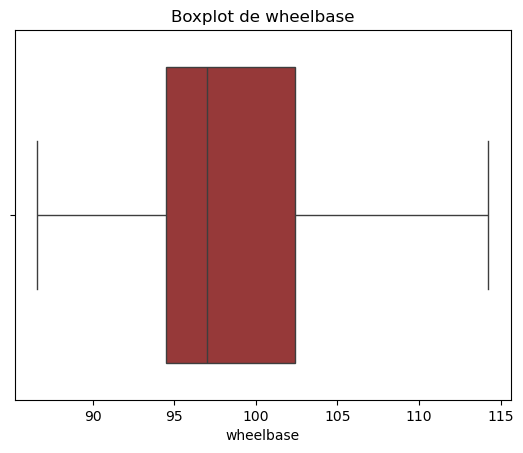

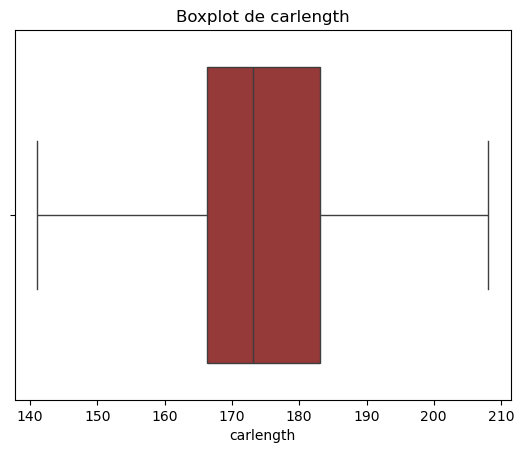

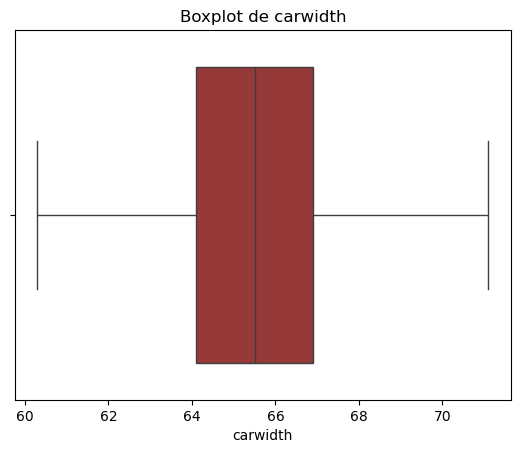

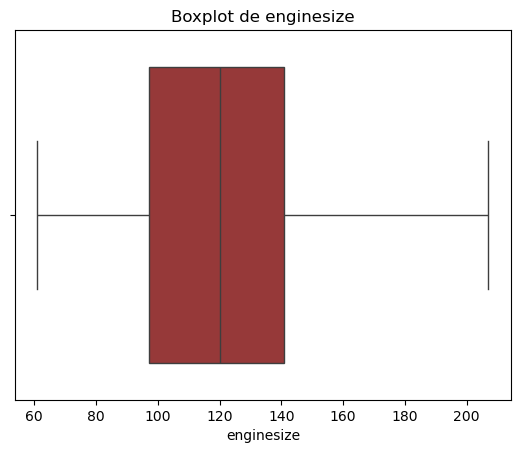

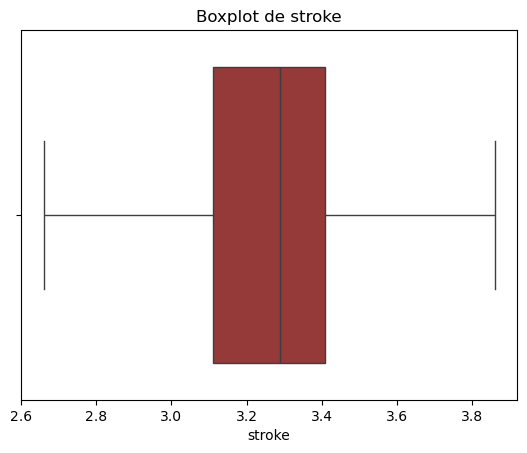

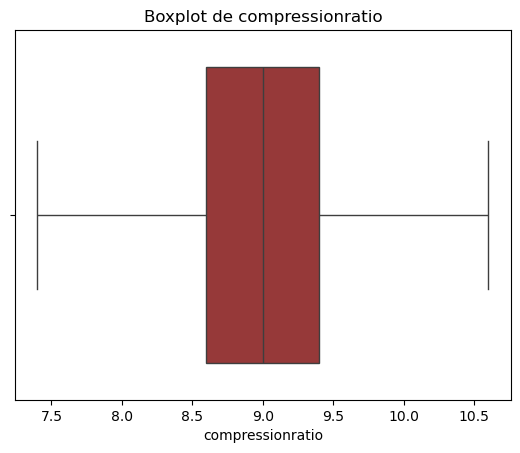

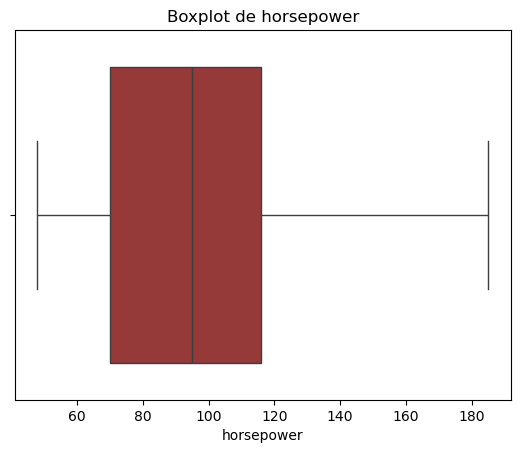

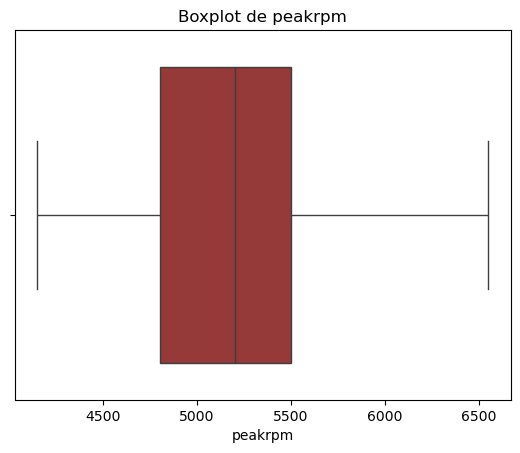

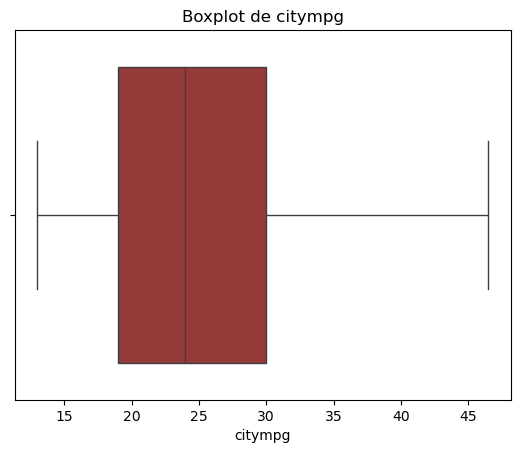

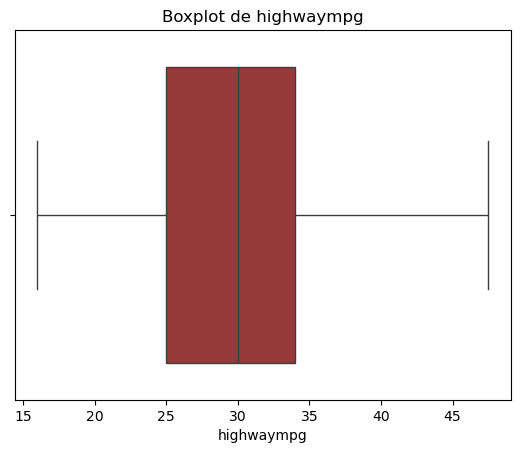

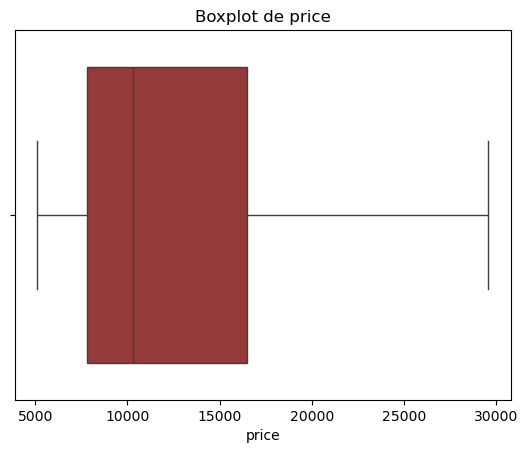

In [200]:
for col in cols_outliers:
    sns.boxplot(x=df[col],color='brown')
    plt.title(f"Boxplot de {col}")
    
    plt.show()

Résultat du traitement des outliers :

Après avoir appliqué la méthode de l’IQR à toutes les variables numériques, aucune valeur aberrante n’a été détectée dans les colonnes. Cela signifie que les valeurs extrêmes ont été corrigées efficacement (bornées) et que l’ensemble des données est maintenant propre, sans anomalies statistiques.
Ce nettoyage garantit que les analyses futures ne seront pas biaisées par des valeurs extrêmes.



## 2 - Création de nouvelles variables (features)

In [34]:
# Création de nouvelles colonnes dérivées
df['engine_per_length'] = df['enginesize'] / df['carlength']
df['luxury_index'] = (df['curbweight'] * df['horsepower']) / df['citympg']
df['weight_to_size'] = df['curbweight'] / (df['carwidth'] * df['carlength'])

# Calcul et affichage des corrélations avec le prix
corrs = df[['price', 'engine_per_length', 'luxury_index', 'weight_to_size']].corr()

print("Corrélation avec le prix (ordre décroissant) :")
print(corrs['price'].sort_values(ascending=False))

Corrélation avec le prix (ordre décroissant) :
price                1.000000
luxury_index         0.869804
weight_to_size       0.817997
engine_per_length    0.800430
Name: price, dtype: float64


In [35]:
# Création de nouvelles colonnes dérivées similaires à celles données
df['horsepower_per_length'] = df['horsepower'] / df['carlength']
df['performance_index'] = (df['horsepower'] * df['enginesize']) / df['citympg']
df['weighted_weight_to_size'] = (df['curbweight'] * df['horsepower']) / (df['carwidth'] * df['carlength'])
df['car_surface'] = df['carwidth'] * df['carlength']

# Colonnes à analyser
cols = ['price', 'horsepower_per_length', 'performance_index', 'weighted_weight_to_size',
         'car_surface']

# Calcul des corrélations
corrs_new = df[cols].corr()

# Affichage des corrélations avec le prix, ordre décroissant
print("Corrélation avec le prix (ordre décroissant) :")
print(corrs_new['price'].sort_values(ascending=False))
df.shape

Corrélation avec le prix (ordre décroissant) :
price                      1.000000
performance_index          0.865636
weighted_weight_to_size    0.857053
car_surface                0.762857
horsepower_per_length      0.754401
Name: price, dtype: float64


(205, 32)

#### Problématique
Même si tous les outliers des colonnes d'origine ont été traités, la création de nouvelles variables dérivées (ratios, indices, produits, etc.) peut introduire de nouvelles valeurs aberrantes. Ces outliers sont souvent dus à :

- des combinaisons extrêmes de variables (ex. : petit dénominateur → ratio très grand),

- ou à la nature même des formules (division, multiplication...).

Ces nouveaux outliers peuvent impacter négativement l'entraînement du modèle, tout comme les outliers d'origine

 #### Solution : Appliquer un traitement des outliers sur les nouvelles colonnes

In [36]:
# deja implementer la fonction treat_outliers
new_cols = ['engine_per_length', 'luxury_index', 'performance_index','weight_to_size', 
            'horsepower_per_length', 'weighted_weight_to_size', 'car_surface']
for col in new_cols:
    df = treat_outliers(df, col)

Verification


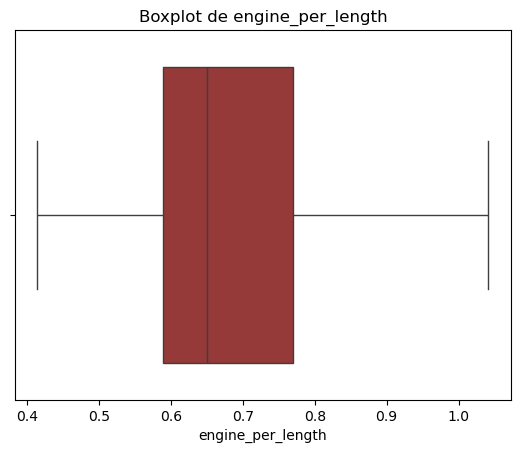

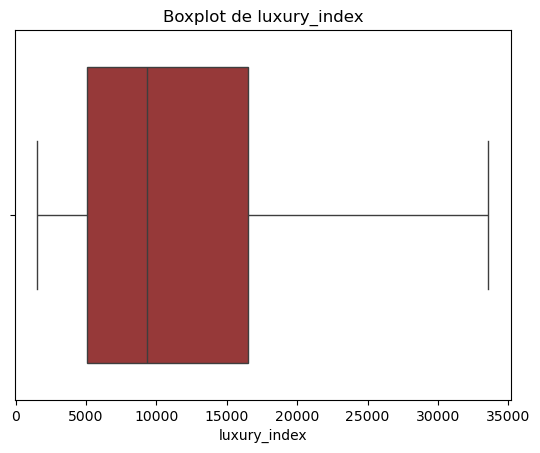

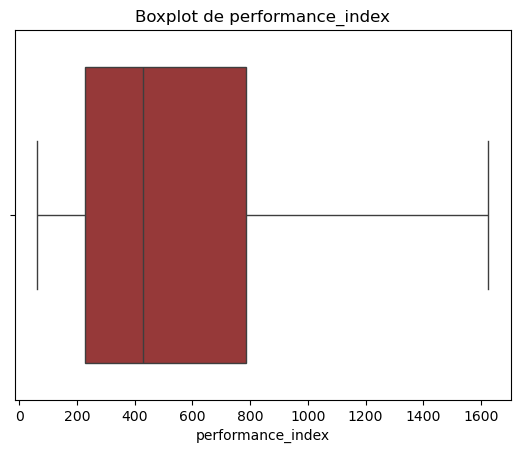

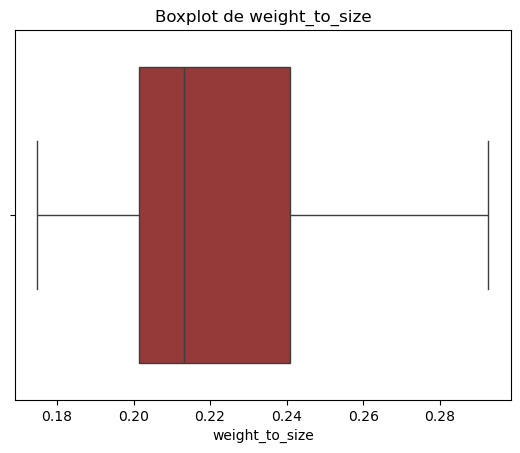

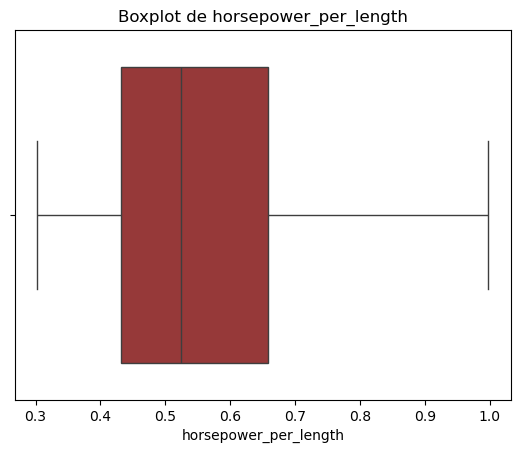

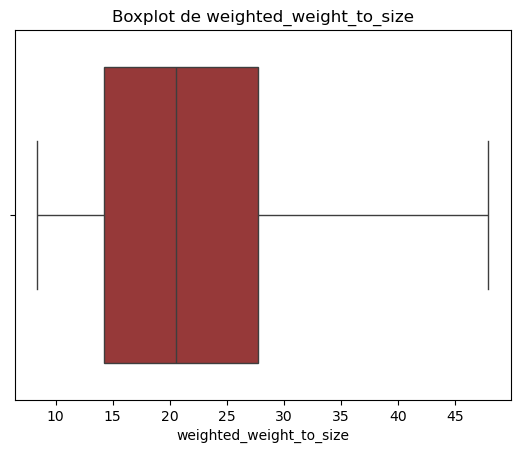

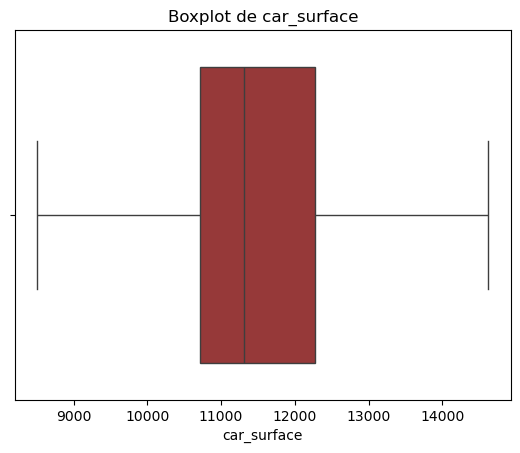

In [37]:
print("Verification")
for col in new_cols:
    sns.boxplot(x=df[col],color='brown')
    plt.title(f"Boxplot de {col}")
    
    plt.show()


## 3 -	Encodage des variables catégorielles

In [41]:
# 1. DIVISION DU DATASET (AVANT l'encodage)
# Remplacez 'price' par le nom de votre variable cible
target_col = 'price'  # À adapter selon votre dataset
# Séparer les features et la target
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

Taille train: (164, 31)
Taille test: (41, 31)


In [43]:
X_train['curbweight'] = X_train['curbweight'].astype('float')

In [45]:
list_var_descrete = X_train.select_dtypes(include=['int']).columns.to_list()
list_var_descrete

['symboling', 'doornumber', 'cylindernumber']

In [46]:
list_var_continue = X_train.select_dtypes(include=['float']).columns.to_list()
len(list_var_continue)

20

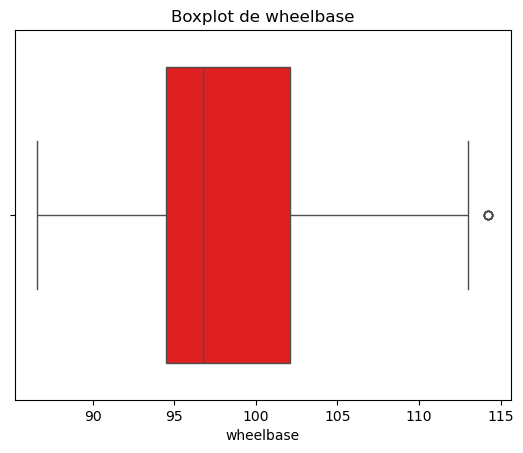

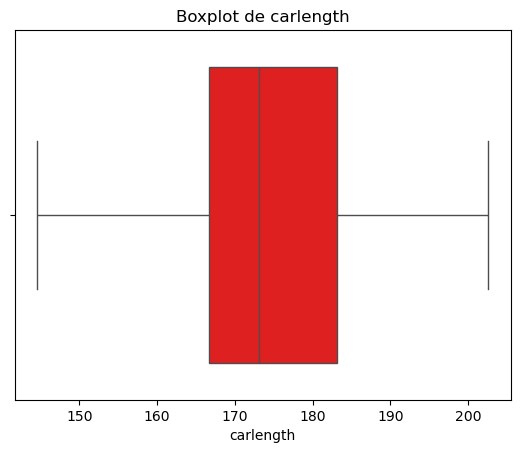

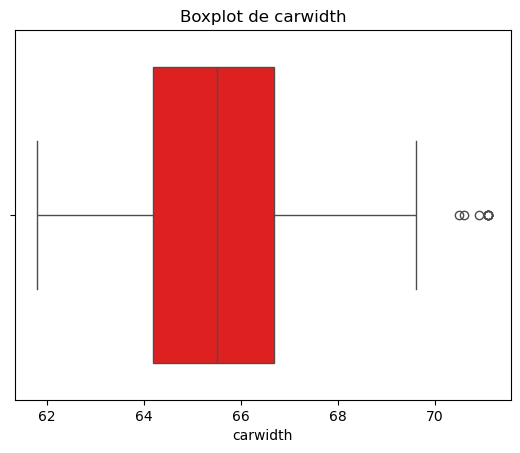

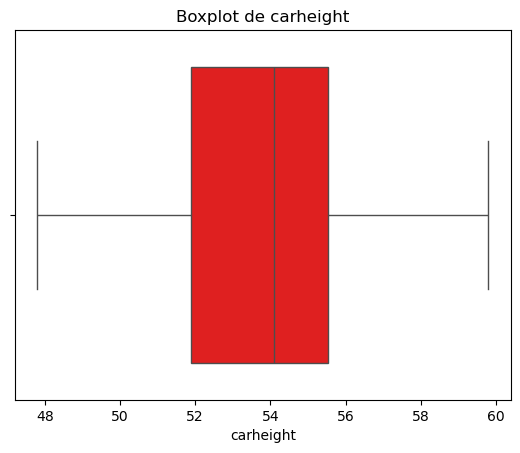

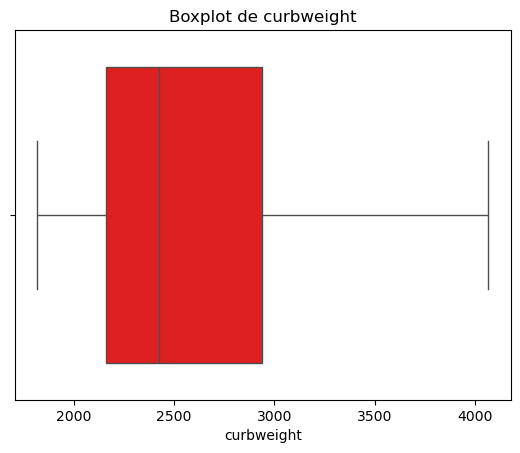

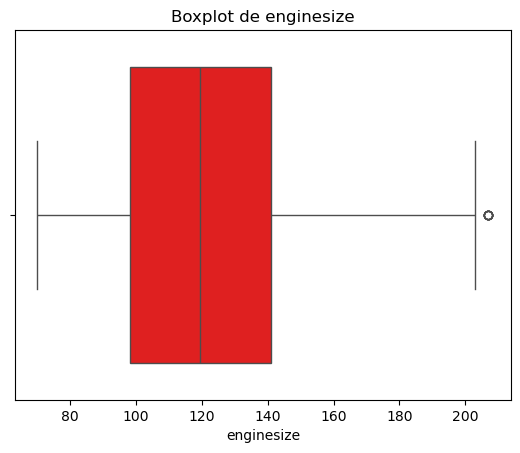

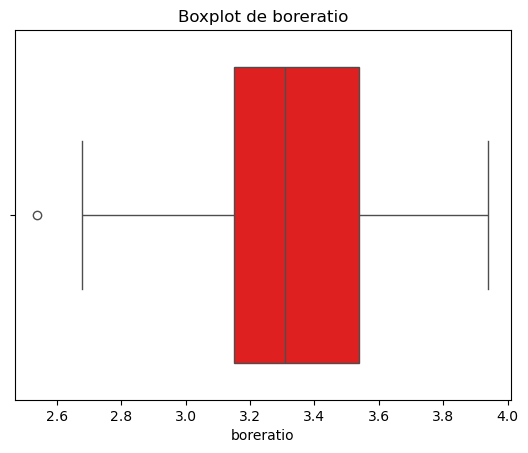

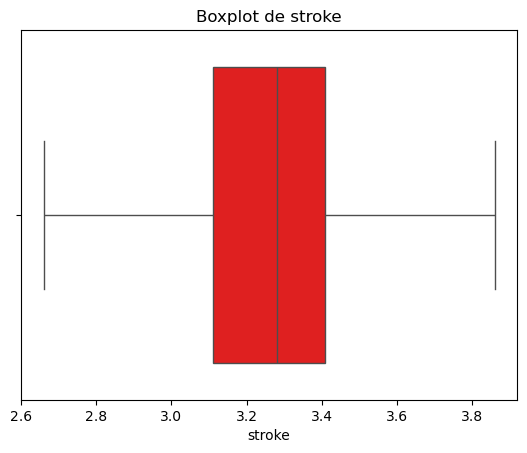

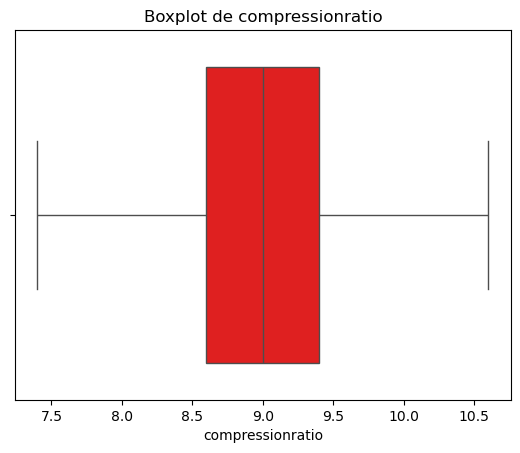

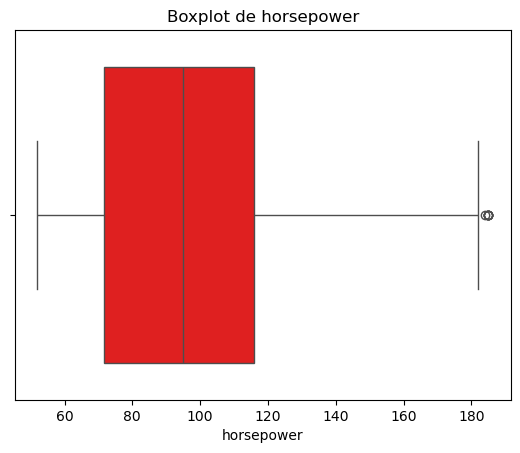

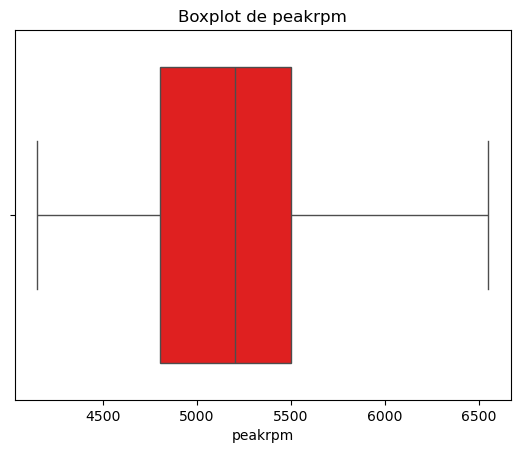

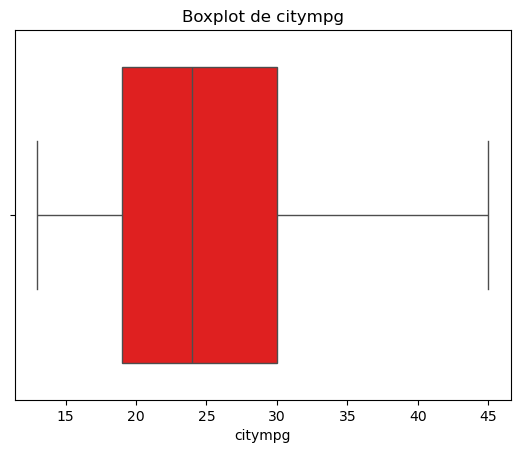

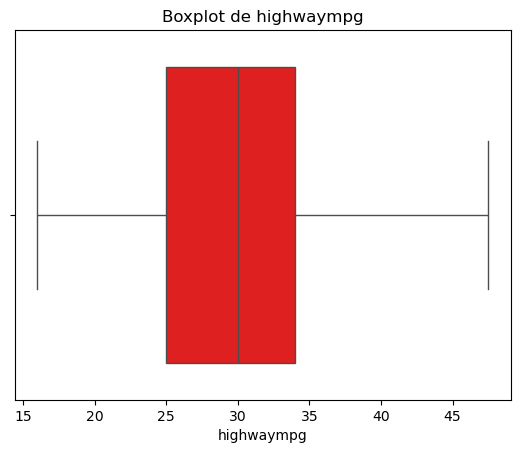

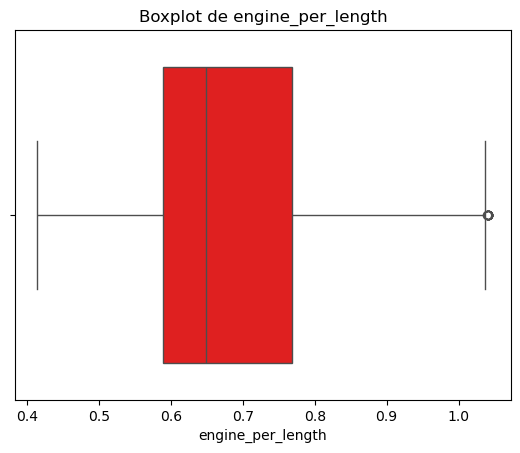

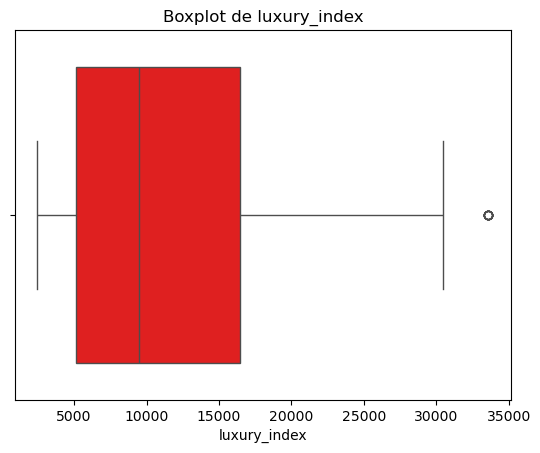

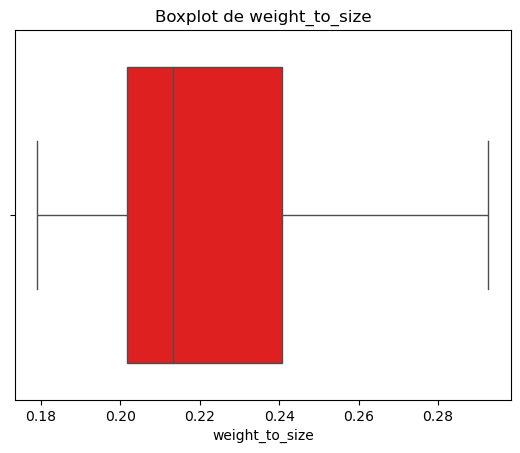

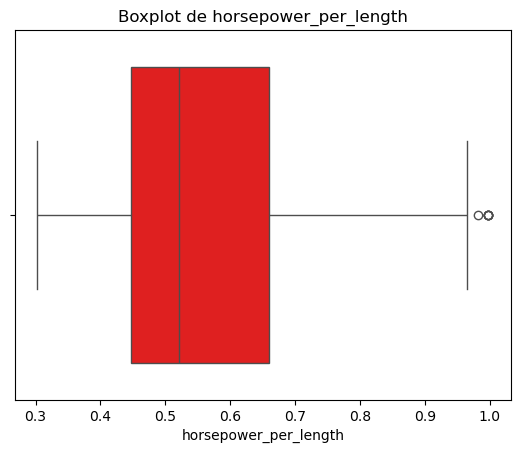

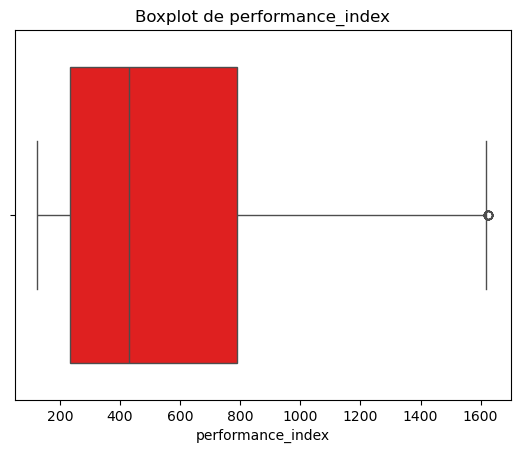

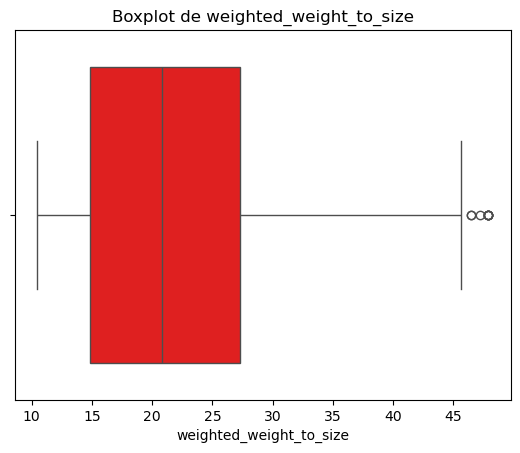

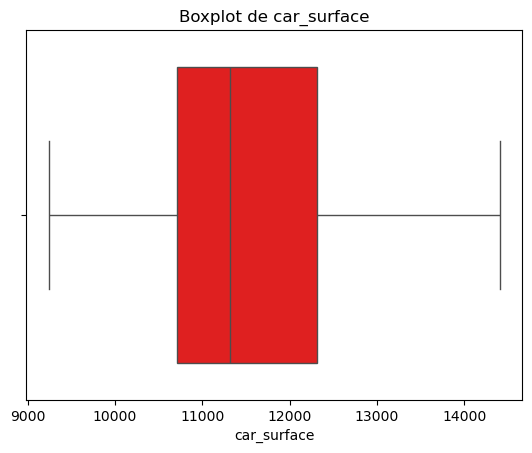

In [47]:

for col in list_var_continue:
    sns.boxplot(x=X_train[col],color='red')
    plt.title(f"Boxplot de {col}")
    
    plt.show()

#### Problématique
Lors de la préparation des données pour entraîner un modèle de Machine Learning, il est courant de rencontrer des valeurs aberrantes (outliers) dans certaines colonnes numériques. Ces valeurs extrêmes peuvent fausser les statistiques globales, perturber la distribution des données et détériorer les performances du modèle (notamment les modèles sensibles à l’échelle et à la distribution, comme la régression linéaire, les KNN, etc.).

Un problème particulier se pose lorsqu’on divise le jeu de données en X_train et X_test, puis qu’on applique le traitement des outliers uniquement sur X_train. Il arrive alors que des valeurs aberrantes persistent dans X_test, ce qui peut biaiser l’évaluation du modèle car ces outliers n’ont pas été vus pendant l’entraînement.

#### Solution
Mettre en place une méthode rigoureuse et cohérente pour :

- traitement des outliers dans les données d'entraînement (X_train) par la methode qui a deja implementer => treat_outliers

In [48]:
for col in list_var_continue:
    X_train = treat_outliers(X_train, col)

In [49]:
#Extraction les variables catégorielles
variable_cat=df.select_dtypes(['object']).columns
variable_cat

Index(['brand', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [50]:
#Compter les valeurs pour chaque varibele
for col in variable_cat:
    unique_count = df[col].nunique()
    print(f"Colonne '{col}' a {unique_count} valeurs uniques")

Colonne 'brand' a 22 valeurs uniques
Colonne 'fueltype' a 2 valeurs uniques
Colonne 'aspiration' a 2 valeurs uniques
Colonne 'carbody' a 5 valeurs uniques
Colonne 'drivewheel' a 3 valeurs uniques
Colonne 'enginelocation' a 2 valeurs uniques
Colonne 'enginetype' a 4 valeurs uniques
Colonne 'fuelsystem' a 8 valeurs uniques


In [51]:
# Colonnes à encoder
nominal_cols = ['carbody','fueltype', 'drivewheel','aspiration', 'enginetype','fuelsystem','enginelocation']

# Supposons que votre variable cible s'appelle 'price' ou 'target'

# 2. IDENTIFIER LES COLONNES NUMÉRIQUES
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Colonnes numériques: {numeric_cols}")
print(f"Colonnes catégorielles: {nominal_cols}")

# 3. CRÉER LE PREPROCESSEUR
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # Garder les colonnes numériques telles quelles
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols)
    ]
)

# 4. FITTER ET TRANSFORMER
# Fitter seulement sur les données d'entraînement
preprocessor.fit(X_train)

# Transformer train et test
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

print(f"Shape après encodage - Train: {X_train_encoded.shape}")
print(f"Shape après encodage - Test: {X_test_encoded.shape}")

# 5. OBTENIR LES NOMS DES COLONNES APRÈS ENCODAGE
# Colonnes numériques
feature_names = numeric_cols.copy()

# Colonnes catégorielles encodées
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(nominal_cols)
feature_names.extend(cat_feature_names)

print(f"Nombre total de features après encodage: {len(feature_names)}")

# 6. CONVERTIR EN DATAFRAME (optionnel)
X_train_df = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_encoded, columns=feature_names, index=X_test.index)

# 7. VÉRIFIER LA COHÉRENCE
print(f"\nVérifications:")
print(f"Pas de valeurs manquantes dans train: {not X_train_df.isnull().any().any()}")
print(f"Pas de valeurs manquantes dans test: {not X_test_df.isnull().any().any()}")



Colonnes numériques: ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'engine_per_length', 'luxury_index', 'weight_to_size', 'horsepower_per_length', 'performance_index', 'weighted_weight_to_size', 'car_surface']
Colonnes catégorielles: ['carbody', 'fueltype', 'drivewheel', 'aspiration', 'enginetype', 'fuelsystem', 'enginelocation']
Shape après encodage - Train: (164, 49)
Shape après encodage - Test: (41, 49)
Nombre total de features après encodage: 49

Vérifications:
Pas de valeurs manquantes dans train: True
Pas de valeurs manquantes dans test: True


In [52]:
print("\nPremières lignes du dataset d'entraînement encodé:")
X_train_df.head()


Premières lignes du dataset d'entraînement encodé:


symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
66         0.0         4.0      104.9      175.0      66.1       54.4   
111        0.0         4.0      107.9      186.7      68.4       56.7   
153        0.0         4.0       95.7      169.7      63.6       59.1   
96         1.0         4.0       94.5      165.3      63.8       54.5   
38         0.0         2.0       96.5      167.5      65.2       53.3   

     curbweight  cylindernumber  enginesize  boreratio  ...  fuelsystem_1bbl  \
66       2700.0             4.0       134.0       3.43  ...              0.0   
111      3075.0             4.0       120.0       3.46  ...              0.0   
153      2280.0             4.0        92.0       3.05  ...              0.0   
96       1971.0             4.0        97.0       3.15  ...              0.0   
38       2289.0             4.0       110.0       3.15  ...              1.0   

     fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
66               0.0              0.0             1.0             0.0   
111              0.0              0.0             0.0             0.0   
153              1.0              0.0             0.0             0.0   
96               1.0              0.0             0.0             0.0   
38               0.0              0.0             0.0             0.0   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  enginelocation_front  \
66               0.0              0.0              0.0                   1.0   
111              1.0              0.0              0.0                   1.0   
153              0.0              0.0              0.0                   1.0   
96               0.0              0.0              0.0                   1.0   
38               0.0              0.0              0.0                   1.0   

     enginelocation_rear  
66                   0.0  
111                  0.0  
153                  0.0  
96                   0.0  
38                   0.0  

[5 rows x 49 columns]

In [53]:
# 8. ENCODAGE TARGET POUR LA COLONNE 'brand'
print("\n--- ENCODAGE TARGET POUR 'brand' ---")

# Colonnes avec beaucoup de valeurs catégorielles
to_ignore = ['brand']  
target_encoder = TargetEncoder(cols=to_ignore)

# Entraînement et transformation de l'ensemble d'entraînement
X_train_target_encoded = target_encoder.fit_transform(X_train, y_train)
# Transformation de l'ensemble de test avec le même encodeur
X_test_target_encoded = target_encoder.transform(X_test)

# Extraire uniquement la colonne 'brand_encoded'
brand_train_encoded = X_train_target_encoded['brand'].values
brand_test_encoded = X_test_target_encoded['brand'].values

print(f"Valeurs uniques 'brand' avant encodage (train): {X_train['brand'].nunique()}")
print(f"Moyennes encodées pour 'brand' - min: {brand_train_encoded.min():.2f}, max: {brand_train_encoded.max():.2f}")

# 9. AJOUTER 'brand_encoded' AUX DATAFRAMES FINAUX
X_train_df['brand_encoded'] = brand_train_encoded
X_test_df['brand_encoded'] = brand_test_encoded

print(f"\nShape finale après ajout de 'brand_encoded' - Train: {X_train_df.shape}")
print(f"Shape finale après ajout de 'brand_encoded' - Test: {X_test_df.shape}")

print(f"\nRÉSULTAT FINAL:")
print(f"X_train_df: {X_train_df.shape} - Inclut OneHot + brand_encoded")
print(f"X_test_df: {X_test_df.shape} - Inclut OneHot + brand_encoded")


--- ENCODAGE TARGET POUR 'brand' ---
Valeurs uniques 'brand' avant encodage (train): 22
Moyennes encodées pour 'brand' - min: 11238.24, max: 15630.36

Shape finale après ajout de 'brand_encoded' - Train: (164, 50)
Shape finale après ajout de 'brand_encoded' - Test: (41, 50)

RÉSULTAT FINAL:
X_train_df: (164, 50) - Inclut OneHot + brand_encoded
X_test_df: (41, 50) - Inclut OneHot + brand_encoded


# ✓Transformation des variables (log, standardisation, normalisation)

### 1. Transformation logarithmique (log transformation)

- Pourquoi appliquer une transformation logarithmique ?
La transformation logarithmique est une technique couramment utilisée en data science pour traiter les variables numériques qui présentent une forte asymétrie ou des valeurs extrêmes. Elle consiste à remplacer chaque valeur d’une variable par son logarithme (naturel ou en base 10), ce qui permet de :

Réduire la dispersion des données : Les variables très étalées voient leurs écarts compressés, rendant la distribution plus homogène.
    
Atténuer l’influence des valeurs extrêmes : Les outliers ont moins d’impact une fois la transformation appliquée.

Rapprocher la distribution de la normalité : De nombreux algorithmes (régression linéaire, modèles statistiques…) fonctionnent mieux lorsque les variables suivent une loi normale. La transformation log peut aider à obtenir cette propriété.
    
Mieux modéliser certaines relations : Si la relation entre deux variables est exponentielle ou très asymétrique, la prise de logarithme peut rendre cette relation plus linéaire et donc plus facilement exploitable par les modèles.
- À quel moment l’utiliser ?
On applique la transformation logarithmique lorsque :

La variable ne prend que des valeurs strictement positives (le logarithme n’est pas défini pour 0 ou les valeurs négatives).
Sa distribution est fortement asymétrique à droite (skewness > 1), ce qui signifie qu’elle comporte quelques valeurs très élevées, rares mais susceptibles de fausser l’analyse.
Variables concernées dans notre cas
Après analyse, trois variables de notre jeu de données répondent à ces critères :

  - luxury_index
  - performance_index
  - brand_encoded

In [54]:
cols_log = ['luxury_index', 'performance_index', 'brand_encoded']
for col in cols_log:
    X_train_df[col] = np.log(X_train_df[col])
    X_test_df[col] = np.log(X_test_df[col])

La distribution des variables apres la Transformation logarithmique :


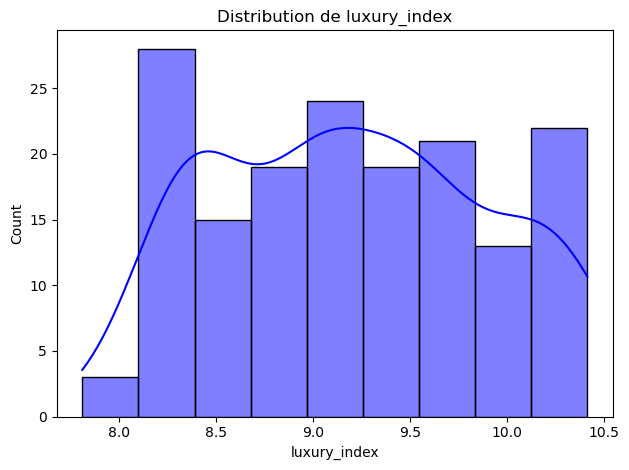

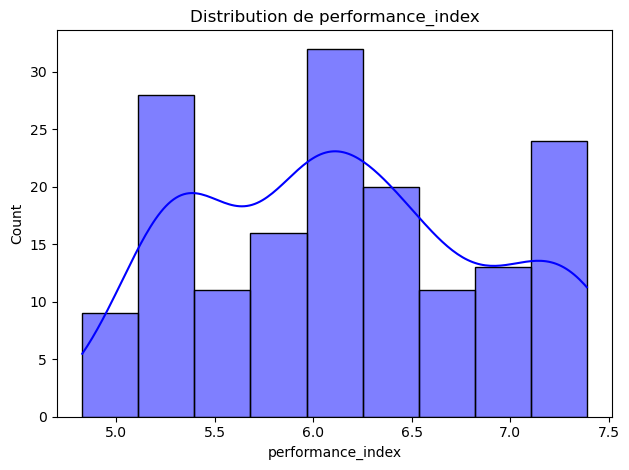

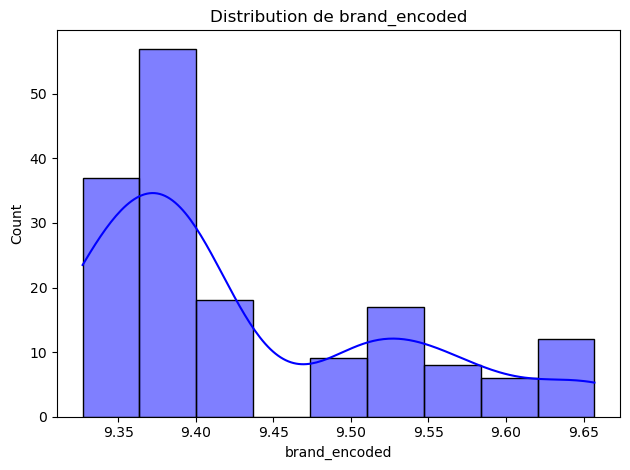

In [92]:
print("La distribution des variables apres la Transformation logarithmique :")
for col in cols_log:
    sns.histplot(X_train_df[col],kde=True,color='blue')
    plt.title(f"Distribution de {col}")
    plt.tight_layout()
    plt.show()

### 2.Standardisation (z-score scaling)

Pourquoi appliquer la standardisation ?

La standardisation, également appelée z-score scaling, consiste à transformer les variables numériques pour qu’elles aient une moyenne de 0 et un écart-type de 1. Cette technique est particulièrement utile lorsque :

Les variables présentent une large plage de valeurs : Certaines colonnes du jeu de données peuvent contenir des valeurs très dispersées, ce qui risque de donner un poids excessif à certaines variables lors de la modélisation.
La distribution n’est pas forcément normale : Contrairement à d’autres méthodes, la standardisation ne suppose pas que les données suivent une loi normale, ce qui la rend polyvalente.
L’objectif est d’éviter que les variables aux échelles différentes ne biaisent l’apprentissage des modèles, en particulier ceux qui sont sensibles à la variance des données (régression linéaire, SVM, k-means…).

Quand l’utiliser ?
On privilégie la standardisation lorsque :

Les variables à traiter présentent des plages de valeurs très différentes.
Les modèles utilisés sont sensibles à la mise à l’échelle des données.
La distribution de la variable n’est pas nécessairement normale.
Variables concernées dans notre cas
Après analyse, trois variables nécessitent une standardisation :

car_surface

curbweight

peakrpm

In [55]:
cols_standard = ['car_surface', 'curbweight', 'peakrpm']
scaler_std = StandardScaler()
X_train_df[cols_standard] = scaler_std.fit_transform(X_train_df[cols_standard])
X_test_df[cols_standard] = scaler_std.transform(X_test_df[cols_standard])

La distribution des variables apres la standarisation :


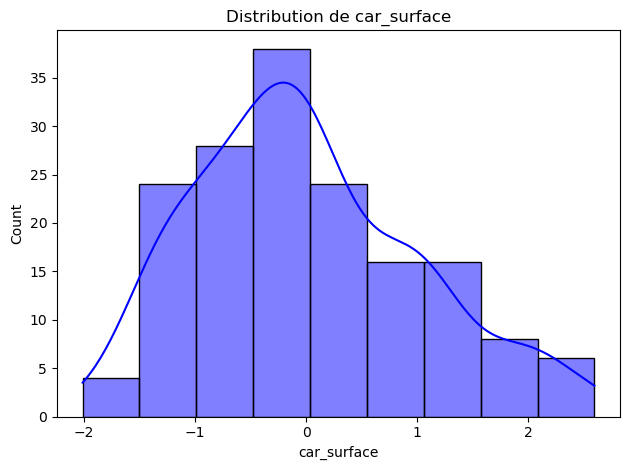

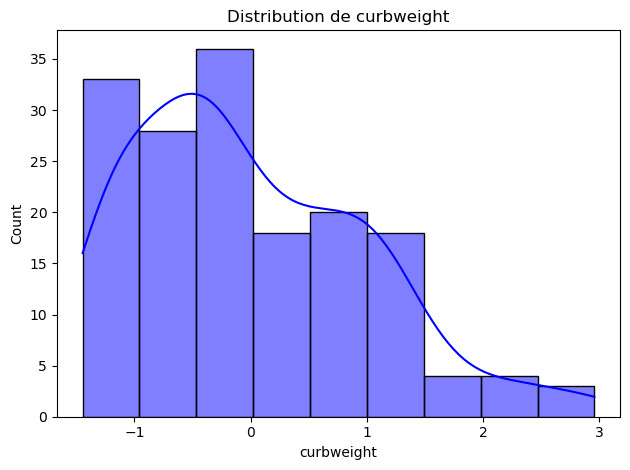

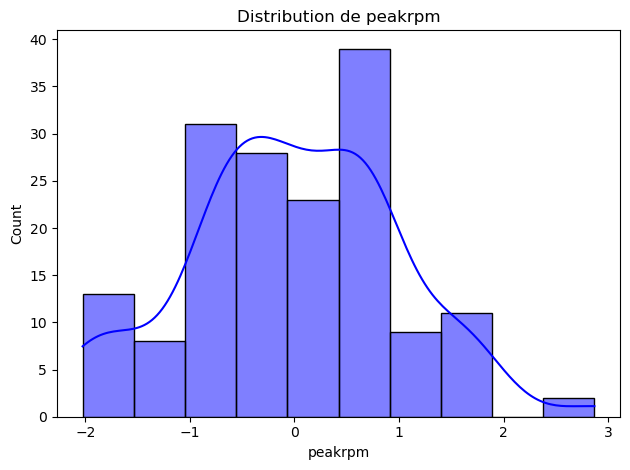

In [91]:
print("La distribution des variables apres la standarisation :")
for col in cols_standard:
    sns.histplot(X_train_df[col],kde=True,color='blue')
    plt.title(f"Distribution de {col}")
    plt.tight_layout()
    plt.show()

### 3.Normalisation (Min-Max Scaling)

- Pourquoi appliquer la normalisation ?
La normalisation, ou Min-Max Scaling, est une technique courante en data science qui consiste à transformer les valeurs d’une variable pour qu’elles soient comprises entre 0 et 1. Cette méthode présente plusieurs avantages, notamment :

  - Uniformiser l’échelle des variables : Lorsque les variables sont sur des plages différentes, certains modèles peuvent être influencés par celles ayant les plus grandes valeurs. La normalisation permet de mettre toutes les variables sur le même pied d’égalité.

  - Améliorer la convergence des algorithmes : Certains algorithmes d’apprentissage, en particulier ceux basés sur les distances (comme les k-plus proches voisins ou les réseaux de neurones), fonctionnent mieux lorsque les données sont normalisées.

  - Préserver la distribution d’origine : Contrairement à la standardisation, la normalisation ne modifie pas la forme de la distribution, mais contraint simplement les valeurs dans une plage donnée.

Quand l’utiliser ?
On privilégie la normalisation lorsque :

Les variables doivent toutes être comprises entre 0 et 1 (par exemple, pour des modèles sensibles à l’échelle des données).
Les valeurs initiales sont déjà dans une plage restreinte, ou il est important de conserver la distribution d’origine tout en uniformisant les échelles.
Variables concernées dans notre cas
Plusieurs variables du jeu de données sont concernées par la normalisation :

engine_per_length
weighted_weight_to_size
wheelbase
carlength
carwidth
carheight
enginesize
boreratio
compressionratio
stroke
citympg
highwaympg
horsepower
horsepower_per_length
weight_to_size

In [56]:
cols_minmax = ['engine_per_length', 'weighted_weight_to_size', 'wheelbase', 'carlength',
               'carwidth', 'carheight', 'enginesize', 'boreratio', 'compressionratio',
               'stroke', 'citympg', 'highwaympg', 'horsepower', 'horsepower_per_length',
               'weight_to_size']

scaler_norm = MinMaxScaler()
X_train_df[cols_minmax] = scaler_norm.fit_transform(X_train_df[cols_minmax])
X_test_df[cols_minmax] = scaler_norm.transform(X_test_df[cols_minmax])

La distribution des variables apres la Normalisation :


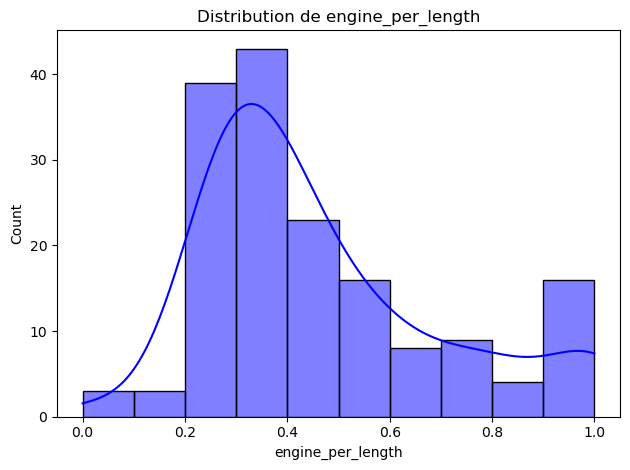

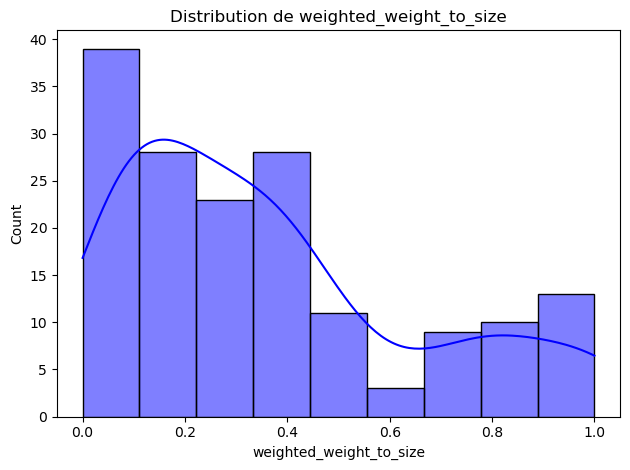

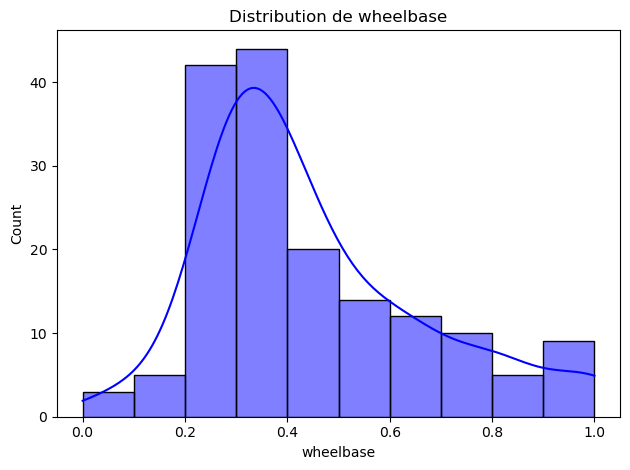

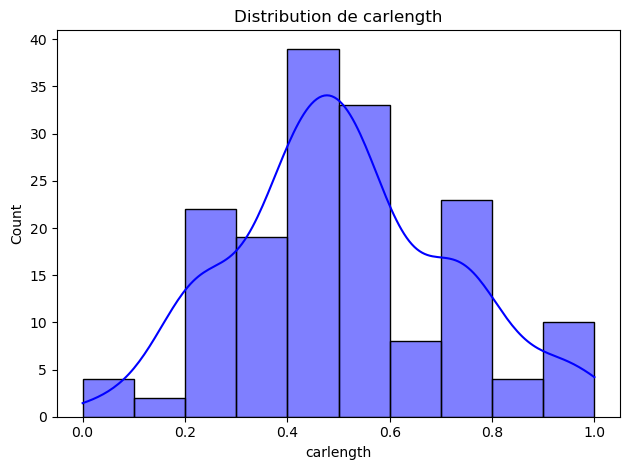

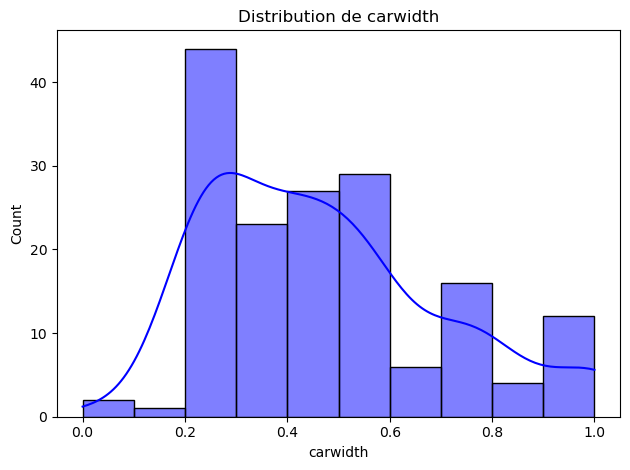

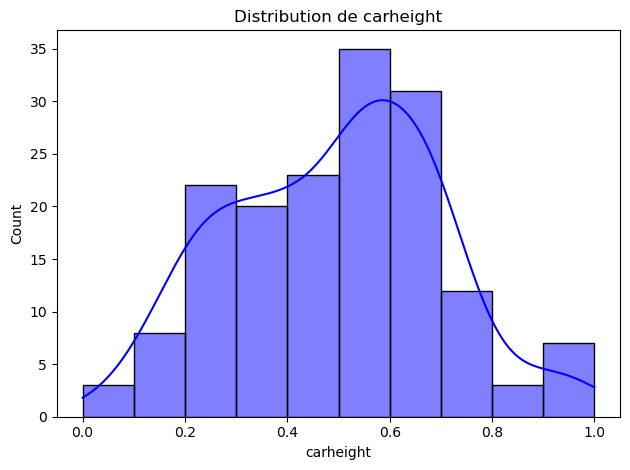

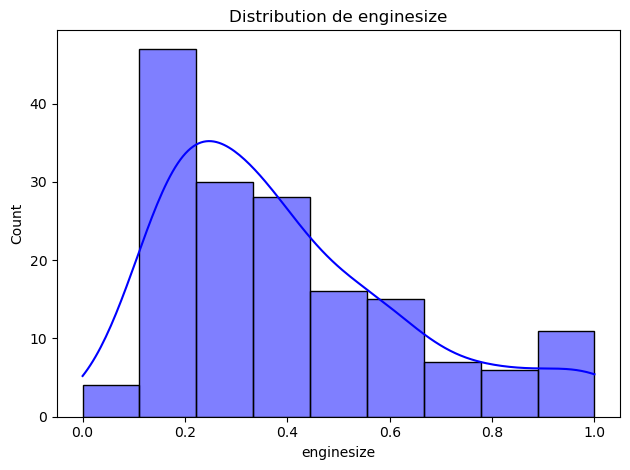

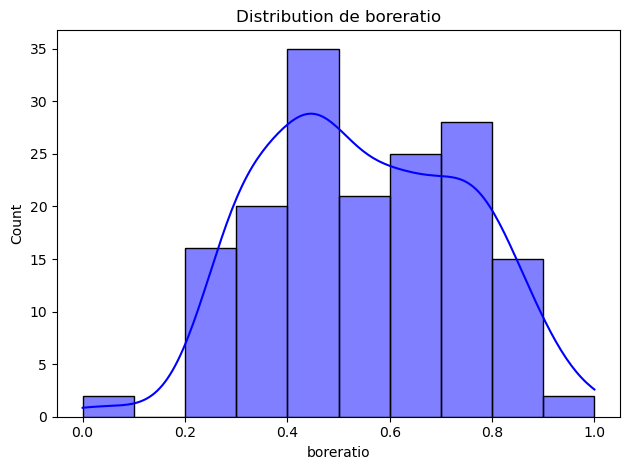

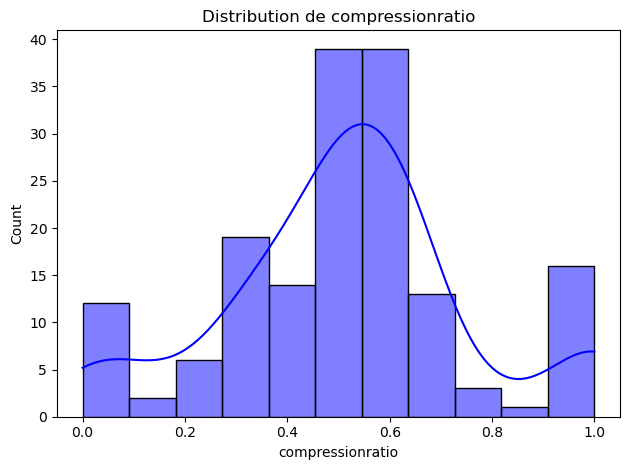

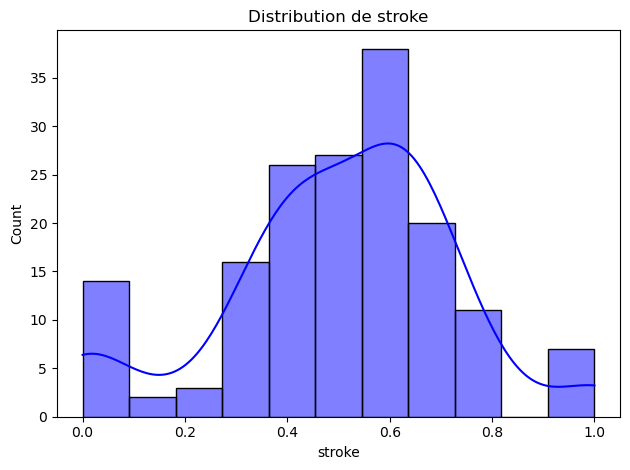

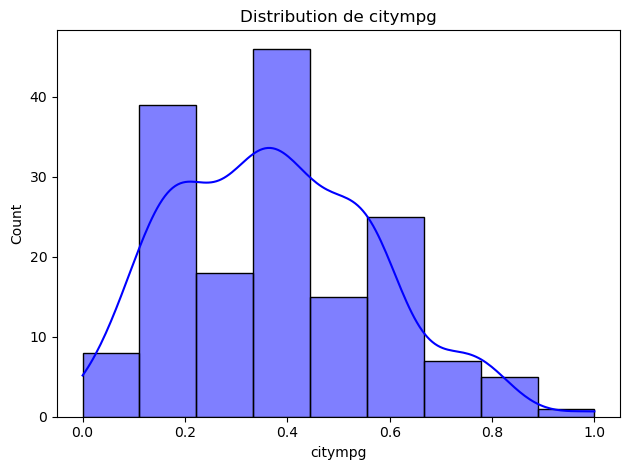

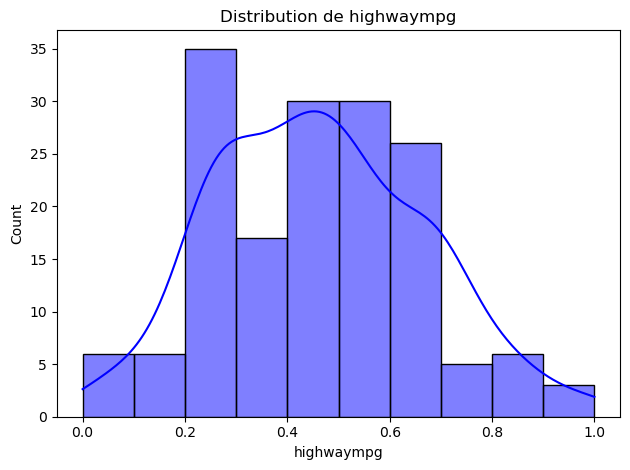

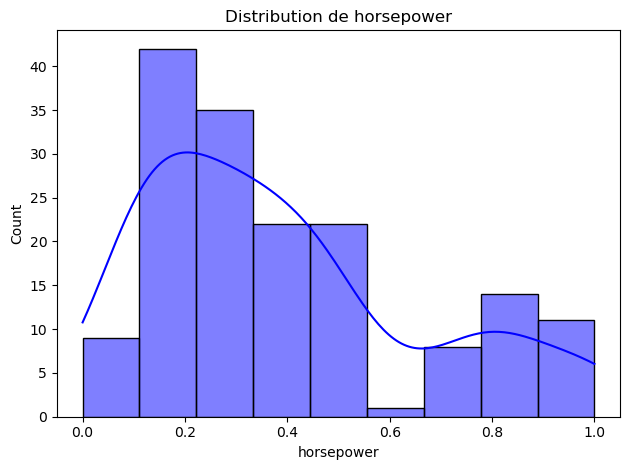

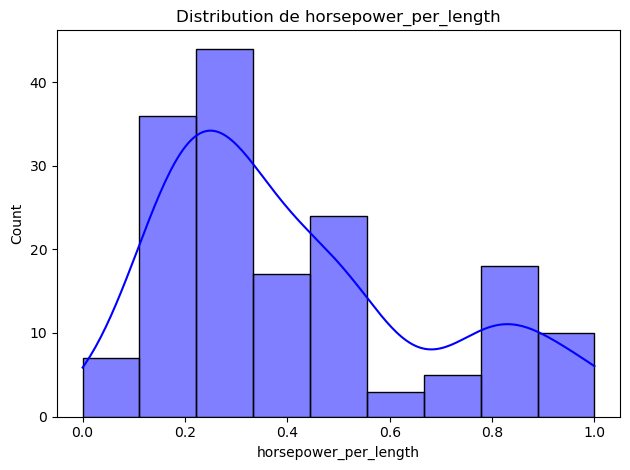

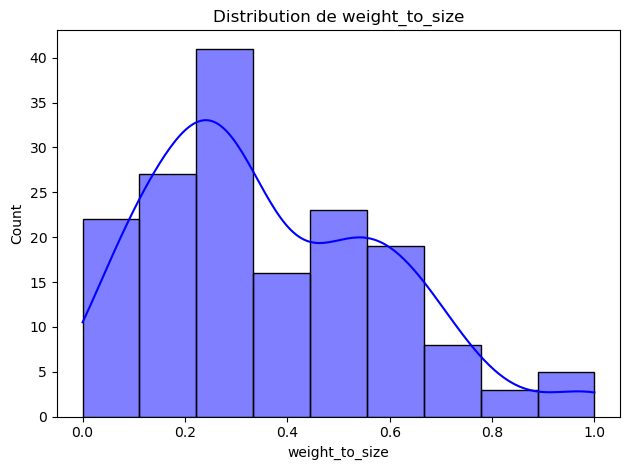

In [93]:
print("La distribution des variables apres la Normalisation :")
for col in cols_minmax:
    sns.histplot(X_train_df[col],kde=True,color='blue')
    plt.title(f"Distribution de {col}")
    plt.tight_layout()
    plt.show()

### 4.Aucune transformation nécessaire (déjà encodé ou binaire)


Certaines variables du jeu de données sont déjà sous une forme adaptée à la modélisation, car elles ont été préalablement encodées (One-Hot Encoding) ou sont naturellement binaires. Ces variables se présentent soit sous la forme de colonnes indicatrices (valeurs 0 ou 1) issues d’un encodage de type one-hot, soit sous forme de variables booléennes (par exemple, vrai/faux ou 0/1).

Pourquoi ne pas les transformer ?

- Déjà prêtes pour les modèles : Les variables binaires ou one-hot encodées sont directement exploitables par la plupart des algorithmes de machine learning, qui interprètent correctement leur signification sans qu’une transformation supplémentaire ne soit nécessaire.
- Pas de problème d’échelle : Ces variables sont déjà normalisées dans l’intervalle [0, 1] et n’introduisent pas de déséquilibre entre les différentes caractéristiques du jeu de données.
- Préservation de l’information : Toute transformation supplémentaire sur ces variables pourrait altérer leur sens ou leur interprétation.
Exemples de variables concernées :

carbody_sedan

fueltype_gas

drivewheel_fwd...

### 5.Variables à considérer comme catégorielles ordinales (faible cardinalité)

- Certaines variables du jeu de données possèdent un nombre limité de modalités (faible cardinalité) et présentent un ordre logique entre les différentes valeurs. On parle alors de variables catégorielles ordinales. Ce type de variables est particulièrement intéressant, car il combine à la fois un aspect qualitatif (catégories distinctes) et un aspect quantitatif (ordre entre les catégories).

- Pourquoi les traiter comme ordinales ?
Respecter l’ordre naturel : Contrairement aux variables purement catégorielles, les variables ordinales possèdent une hiérarchie ou une progression logique (ex. : faible, moyen, élevé).


Faciliter l’interprétation par les modèles : Conserver l’ordre permet aux modèles d’apprentissage automatique de mieux capter les relations entre les modalités et la variable cible.

Variables concernées dans notre cas :

symboling : Indique le niveau de risque lié à l’assurance du véhicule, avec un ordre du moins risqué au plus risqué.

doornumber : Représente le nombre de portes du véhicule (par exemple : 2, 3, 4, 5), ce qui constitue une progression naturelle.

cylindernumber : Correspond au nombre de cylindres du moteur, avec une hiérarchie évidente (plus il y en a, plus le moteur est puissant).

# ✓Sélection de variables pertinentes (ACP)

L’Analyse en Composantes Principales (ACP), ou Principal Component Analysis (PCA) en anglais, est une méthode statistique de réduction de dimensionnalité. Son principal objectif est de simplifier des jeux de données comportant de nombreuses variables numériques, tout en conservant un maximum d’information.

Concrètement, l’ACP permet de :

- Résumer l’information issue de plusieurs variables corrélées : lorsqu’on travaille avec de nombreuses variables qui se ressemblent ou se recoupent, l’ACP aide à synthétiser l’ensemble sans perdre la richesse des données.

- Créer de nouvelles variables non corrélées : appelées composantes principales, ces nouvelles variables représentent des combinaisons linéaires des variables d’origine, mais sont indépendantes les unes des autres.

- Réduire le nombre de variables : en ne conservant que les composantes principales les plus informatives, on simplifie les analyses et les modèles, tout en gardant l’essentiel de la variation et de la structure du jeu de données.

L’ACP est donc un outil essentiel pour analyser, visualiser et modéliser des données multidimensionnelles de façon plus efficace et plus lisible.

#### Sélectionner les variables numériques continues

La première étape de l’Analyse en Composantes Principales (ACP) consiste à identifier et sélectionner uniquement les variables numériques continues du jeu de données. En effet, l’ACP repose sur le calcul de distances et de variances entre les observations ; ces notions n’ont de sens que pour des variables quantitatives continues. Les variables catégorielles ou discrètes ne sont donc pas adaptées à cette méthode, car elles risqueraient de fausser l’analyse et les résultats obtenus.

Bien choisir ses variables à cette étape garantit la pertinence de l’ACP et la qualité de l’information extraite lors de la réduction de dimensionnalité.

#### on sélectionne uniquement les colonnes continue et descrete, donc pas les colonnes one-hot encodées ou catégorielles.

In [57]:
without_encoded = list_var_continue + list_var_descrete + ['brand_encoded']
#Sélectionner uniquement les variables numériques continues sans les colonnes encodées
X_train_num = X_train_df.select_dtypes(include=['float', 'int']).filter(items=without_encoded)
X_test_num = X_test_df.select_dtypes(include=['float', 'int']).filter(items=without_encoded)

- Ce courbe est permet de déterminer intelligemment le nombre optimal de composantes principales (n_components) à utiliser dans le PCA, en se basant sur la variance expliquée cumulée.

- Ce courbe représentant la variance expliquée cumulée en fonction du nombre de composantes principales. Chaque point sur la courbe montre la part totale de l'information (variance) conservée en prenant les n premières composantes.

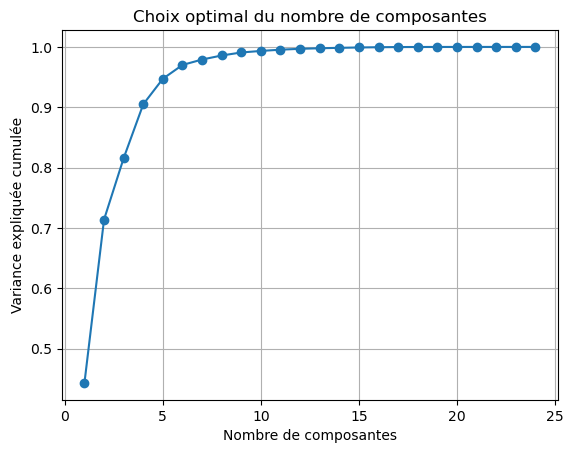

In [104]:
pca = PCA().fit(X_train_num)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix optimal du nombre de composantes')
plt.grid()
plt.show()

Ce code montre comment créer un pipeline combinant la standardisation des données numériques avec StandardScaler et la réduction de dimension via PCA, en conservant les 10 composantes principales. Le pipeline est d'abord ajusté (fit_transform) sur les données d'entraînement pour calculer les paramètres de mise à l’échelle et les axes du PCA, puis appliqué aux données de test avec transform pour garantir un traitement cohérent sans fuite d’information. Enfin, les résultats transformés sont convertis en DataFrames avec des noms de colonnes (PC1 à PC10) pour faciliter leur exploitation dans des modèles de machine learning.

In [187]:
# 1. D'abord, créer un pipeline avec StandardScaler et PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Créer le pipeline
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))  # ou le nombre de composantes que vous souhaitez
])

# 3. Appliquer le pipeline sur les données d'entraînement
X_train_pca = pca_pipeline.fit_transform(X_train_num)

# 4. Appliquer la même transformation sur les données de test
X_test_pca = pca_pipeline.transform(X_test_num)  # Notez qu'on utilise transform() et non fit_transform()

# 3. Créer des DataFrames avec noms des composantes principales
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])


In [203]:
X_train_pca_df.head(2)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.941234  2.864334  2.432147  1.286403 -0.822564  0.381473  0.888710   
1  2.293444  2.346753 -1.649151 -2.198686 -0.376294 -0.050077 -1.063006   

        PC8       PC9      PC10  
0 -0.018881 -0.253684  0.087617  
1 -0.274902 -0.477599 -0.223344

# ✓Choix et entraînement de trois modèles de Machine Learning et évaluation de leurs performances.

Dans le cadre de ce projet, nous nous intéressons à un problème de régression supervisée, dont l’objectif est de prédire une variable quantitative continue — très souvent le prix d’un bien ou la performance d’un produit — à partir d’un ensemble de caractéristiques décrivant chaque observation. Ces caractéristiques peuvent être d’ordre physique, technique ou même catégoriel.
Avant la phase de modélisation, le jeu de données a bénéficié d’un important travail de prétraitement : gestion des valeurs aberrantes, encodage des variables catégorielles, réduction de la dimensionnalité par Analyse en Composantes Principales (ACP), ainsi que diverses transformations statistiques pour assurer une distribution plus homogène des variables.

L’enjeu principal est de construire des modèles de Machine Learning capables de prédire avec fiabilité la variable cible, en exploitant au mieux l’information contenue dans l’ensemble des variables explicatives. Pour cela, plusieurs algorithmes de régression sont mis en concurrence, parmi lesquels la régression linéaire, le Random Forest Regressor et le Gradient Boosting Regressor. L’objectif est d’identifier le modèle offrant les meilleures performances, en s’appuyant sur des indicateurs tels que la racine de l’erreur quadratique moyenne (RMSE) et le coefficient de détermination (R²).

## 1. Régression Linéaire
La régression linéaire est l’un des modèles statistiques les plus simples et les plus utilisés pour établir une relation entre une variable cible (par exemple, le prix d’un bien) et un ensemble de variables explicatives. Elle repose sur l’hypothèse que cette relation est linéaire et additive, ce qui signifie que chaque variable contribue de façon constante à la valeur finale.

Ce modèle a l’avantage d’être très rapide à mettre en œuvre et surtout facile à interpréter : il permet de comprendre, pour chaque variable, son impact sur le résultat. Il convient particulièrement bien lorsque les données sont bien préparées et que les liens entre variables sont proches de la linéarité.

Cependant, la régression linéaire présente aussi certaines limites : elle est sensible aux valeurs aberrantes, suppose une relation linéaire parfois trop simpliste, et gère mal les situations où les variables sont fortement corrélées entre elles (colinéarité).

In [188]:
from sklearn.metrics import mean_squared_error, r2_score
# 1. Initialisation du modèle
linreg = LinearRegression()

# 2. Entraînement sur les données PCA d'entraînement
linreg.fit(X_train_pca_df, y_train)

# 3. Prédictions sur les données PCA de test
y_pred_lin = linreg.predict(X_test_pca_df)

# 4. Évaluation des performances
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

# 5. Affichage
print("Régression linéaire :")
print(f"RMSE : {rmse_lin:.2f} \nR² : {r2_lin:.3f}")

Régression linéaire :
RMSE : 2675.27 
R² : 0.865


## 2. Random Forest Regressor
Le modèle Random Forest est quant à lui basé sur un ensemble d’arbres de décision, chacun construit de manière indépendante à partir d’un échantillon aléatoire des données et des variables. L’idée est de combiner les prédictions de plusieurs arbres pour obtenir un résultat plus stable et plus robuste.

Grâce à ce principe d’agrégation (bagging), le Random Forest s’adapte très bien à des jeux de données complexes, bruités ou non linéaires, tout en restant peu sensible aux valeurs aberrantes. Son principal atout est qu’il nécessite peu de prétraitement et s’avère très performant dans de nombreux contextes.

En revanche, il peut se révéler moins facile à interpréter qu’un modèle linéaire, et sa consommation de ressources (temps de calcul et mémoire) peut être significative pour de très grands ensembles de données.

In [189]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_pca_df, y_train)
y_pred_rf = rf.predict(X_test_pca_df)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest : ")
print(f"RMSE : {rmse_rf:.2f}\nR² : {r2_rf:.3f}")

Random Forest : 
RMSE : 1895.12
R² : 0.932


## 3. Gradient Boosting Regressor (GBR)
Le Gradient Boosting Regressor repose sur un principe d’ensemble, où plusieurs modèles faibles (généralement de petits arbres de décision) sont construits de façon séquentielle. À chaque étape, le nouvel arbre vise à corriger les erreurs commises par les arbres précédents, ce qui permet d’optimiser progressivement la prédiction.

Cette approche est particulièrement puissante pour capter des relations complexes et non linéaires dans les données, offrant d’excellentes performances après un ajustement minutieux des paramètres. Le Gradient Boosting est souvent le choix privilégié pour maximiser la précision des prédictions sur des jeux de données exigeants.

Toutefois, il demande plus de temps d’entraînement que le Random Forest et nécessite un réglage attentif de ses paramètres pour éviter le surapprentissage.

In [190]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=3, random_state=42)
gbr.fit(X_train_pca_df, y_train)
y_pred_gbr = gbr.predict(X_test_pca_df)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting : ")
print(f"RMSE : {rmse_lin:.2f}\nR² : {r2_gbr:.3f}")

Gradient Boosting : 
RMSE : 1959.86
R² : 0.927


# ✓Conclure, comparer et proposer des améliorations

## Comparison
Trois modèles de régression ont été testés après la réduction de dimension via PCA : régression linéaire, Random Forest, et Gradient Boosting. Les résultats montrent que les modèles d’ensemble (Random Forest et Gradient Boosting) surpassent nettement la régression linéaire en termes de performance.

1- Régression linéaire donne un RMSE de 2675.27 et un R² de 0.865, ce qui indique une bonne base mais des limites dans la capture des non-linéarités.

2- Random Forest obtient les meilleurs résultats globaux, avec un RMSE de 1895.12 et un R² de 0.932, traduisant une très bonne précision et capacité à modéliser des relations complexes.

3 Gradient Boosting suit de près avec un RMSE de 1959.86 et un R² de 0.927, offrant également une excellente performance.

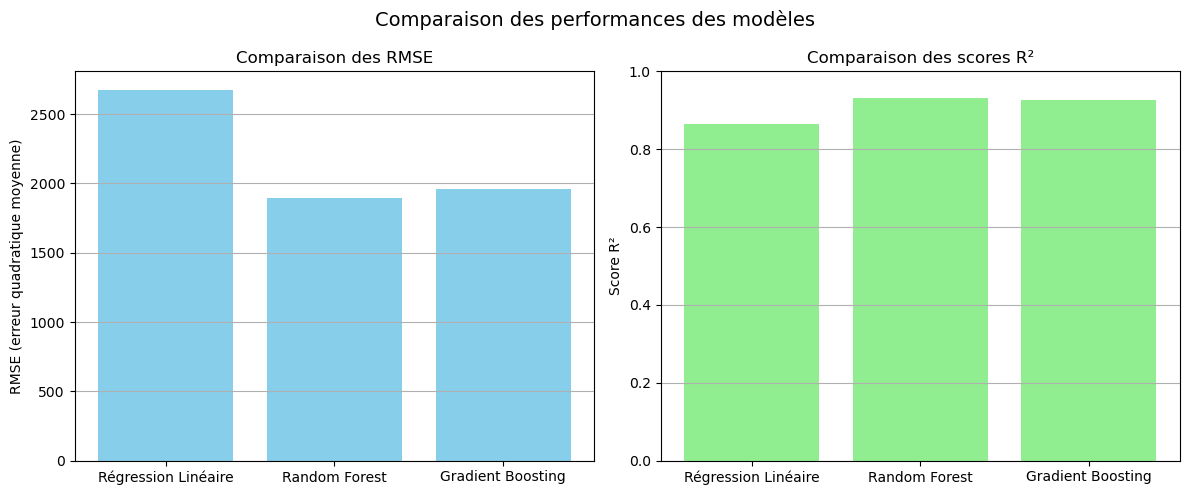

In [168]:
# Résultats des modèles
model_names = ['Régression Linéaire', 'Random Forest', 'Gradient Boosting']
rmse_scores = [2675.27, 1895.12, 1959.86]
r2_scores = [0.865, 0.932, 0.927]

# Création des sous-graphiques
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graphique RMSE
axs[0].bar(model_names, rmse_scores, color='skyblue')
axs[0].set_title('Comparaison des RMSE')
axs[0].set_ylabel('RMSE (erreur quadratique moyenne)')
axs[0].grid(axis='y')

# Graphique R²
axs[1].bar(model_names, r2_scores, color='lightgreen')
axs[1].set_title('Comparaison des scores R²')
axs[1].set_ylabel('Score R²')
axs[1].set_ylim(0, 1)  # R² est entre 0 et 1
axs[1].grid(axis='y')

plt.suptitle('Comparaison des performances des modèles', fontsize=14)
plt.tight_layout()
plt.show()


### Test de modele Random Forest Regressor par autre cas :

In [181]:
# 1. Sélection de deux voitures à tester (la 1re et la 3e ligne de X_test_num)
car1 = X_test_num.iloc[[0]]  # Utiliser double crochets pour garder le format DataFrame
car2 = X_test_num.iloc[[2]]

# 2. Récupérer les prix réels correspondants depuis y_test
prix_reel_car1 = y_test.iloc[0]
prix_reel_car2 = y_test.iloc[2]

# 3. Appliquer le pipeline de preprocessing (StandardScaler + PCA) déjà entraîné
car1_pca = pca_pipeline.transform(car1)
car2_pca = pca_pipeline.transform(car2)

# 4. Utiliser le modèle Random Forest pour prédire le prix de chaque voiture
pred_rf_car1 = rf.predict(car1_pca)
pred_rf_car2 = rf.predict(car2_pca)

# 5. Afficher les résultats
print("Prédiction du prix de deux voitures par le modèle Random Forest :")
print("\n")

# Affichage pour car1
print(f"Prix prédit de car1 : {pred_rf_car1[0]:.2f} €")
print(f"Prix réel de car1  : {prix_reel_car1} €")
print("\n")

# Affichage pour car2
print(f"Prix prédit de car2 : {pred_rf_car2[0]:.2f} €")
print(f"Prix réel de car2  : {prix_reel_car2} €")


Prédiction du prix de deux voitures par le modèle Random Forest :


Prix prédit de car1 : 26733.52 €
Prix réel de car1  : 29575.5 €


Prix prédit de car2 : 8997.62 €
Prix réel de car2  : 9549.0 €


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Comparaison des prix réels et prédits pour les 10 premières voitures

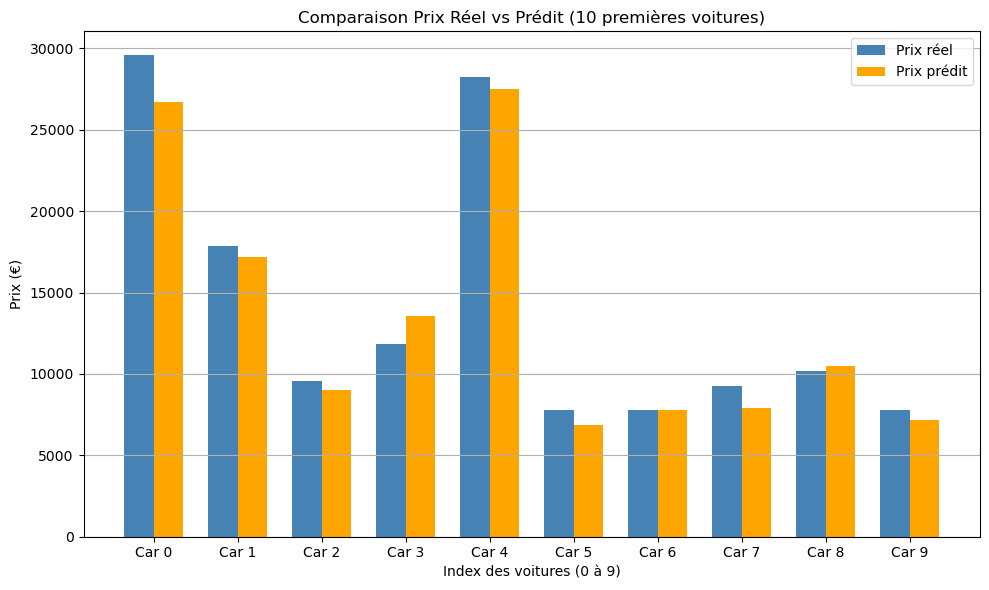

In [184]:

# Sélection des 10 premières valeurs
n = 10
indices = np.arange(n)
prix_reels = y_test.iloc[:n].values
prix_predits = y_pred_rf[:n]

bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(indices, prix_reels, bar_width, label='Prix réel', color='steelblue')
plt.bar(indices + bar_width, prix_predits, bar_width, label='Prix prédit', color='orange')
plt.xlabel('Index des voitures (0 à 9)')
plt.ylabel('Prix (€)')
plt.title('Comparaison Prix Réel vs Prédit (10 premières voitures)')
plt.xticks(indices + bar_width / 2, [f'Car {i}' for i in range(n)])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
